In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

1. Data Understanding and Preprocessing:

In [2]:
# Load the dataset
df=pd.read_csv(r'C:\Users\Bhakti\Downloads\data.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
#Display the shape of the dataframe
df.shape

(6819, 96)

In [5]:
#Display the Datatype
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
#Display summary staticstics for numerical columns
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [8]:
# Check for missing values
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
#Check for duplicate rows
df.duplicated().sum()

0

In [10]:
# check columns
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [11]:
#To check corelation
df.corr()

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

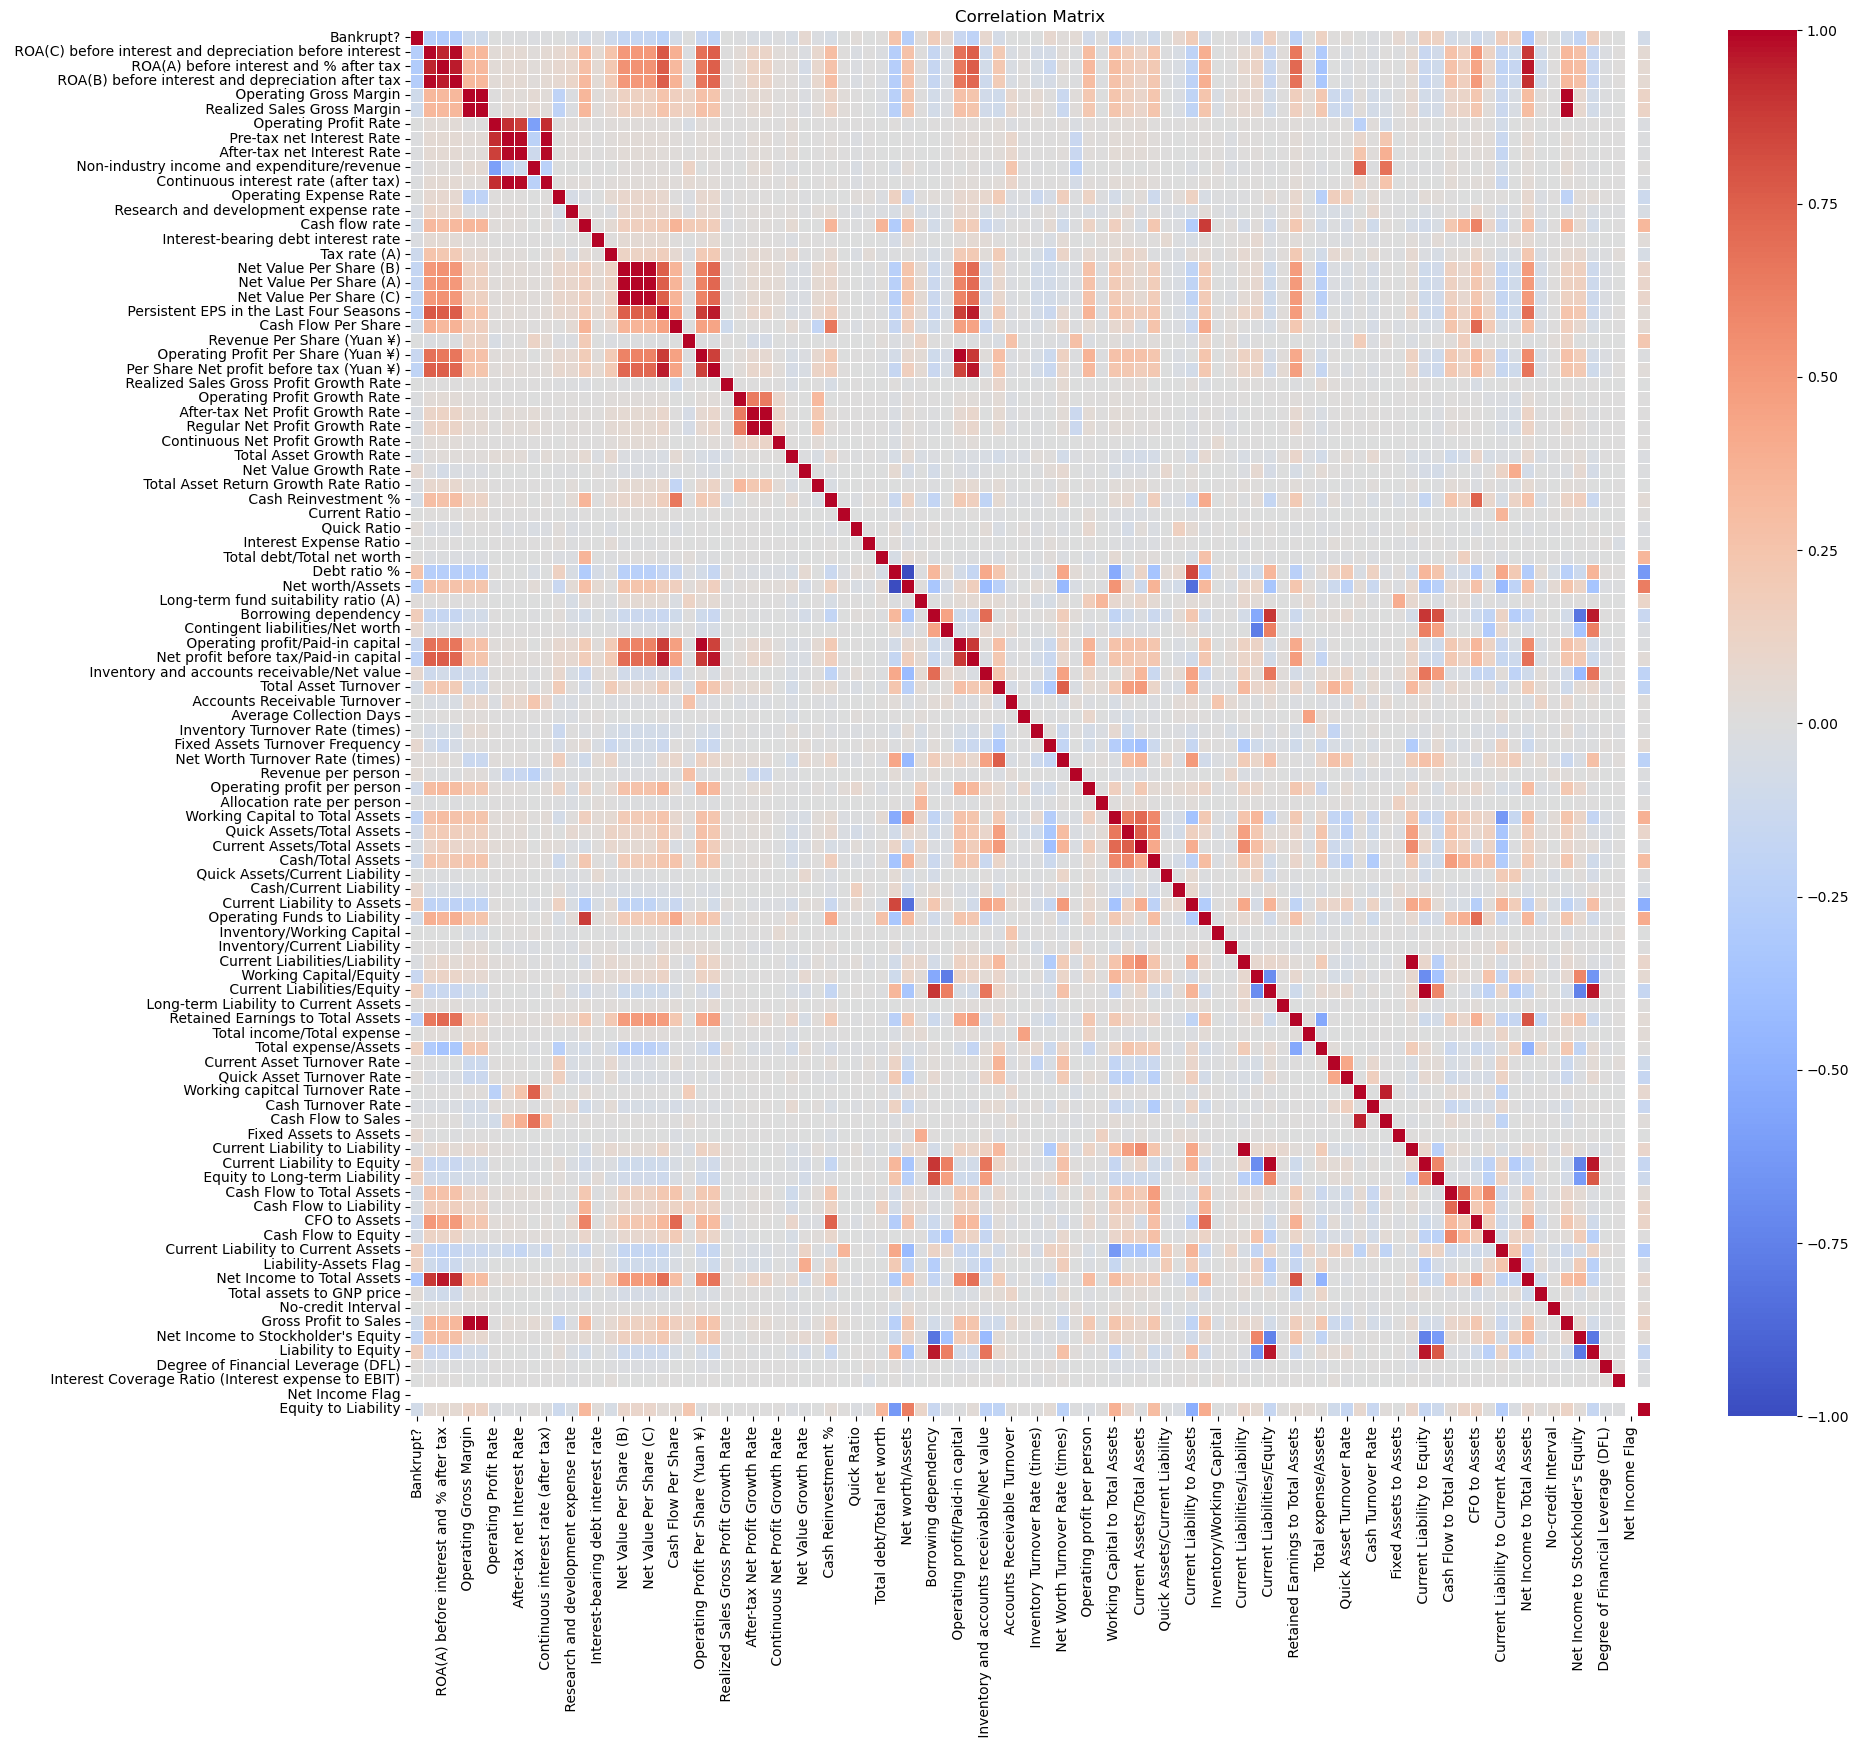

In [12]:
#HeatMap
correlation_matrix=df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
#to drop categorical columns in dataset
new_df=df.drop(['Bankrupt?',' Net Income Flag',' Liability-Assets Flag'],axis=1)

In [14]:
new_df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...  \
0                               0.780985  ...   
1                               0.781506  ...   
2                               0.780284  ...   
3                               0.781241  ...   
4                               0.781550  ...   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.118250                     0.716845   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.739555   
4                              0.047725                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                     

In [15]:
columns=new_df.columns

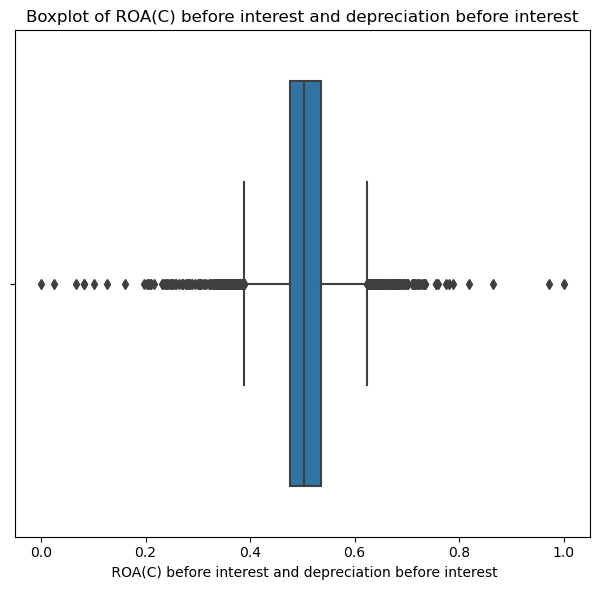

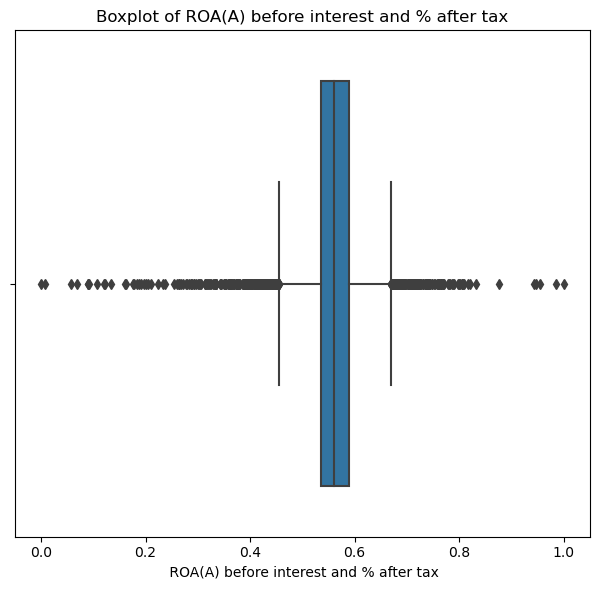

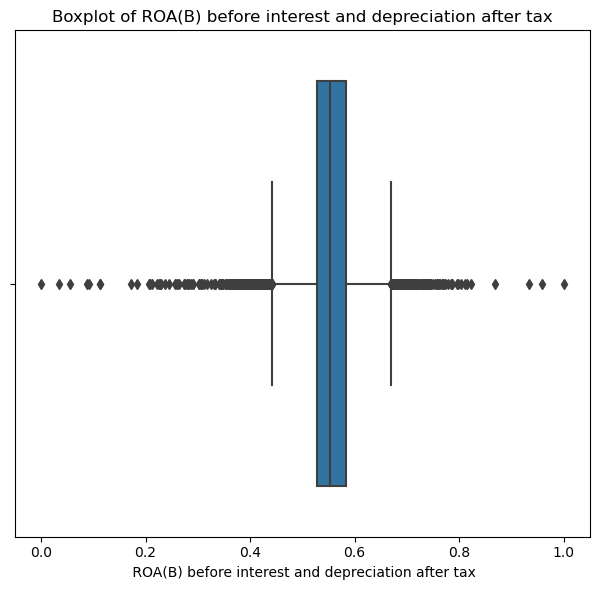

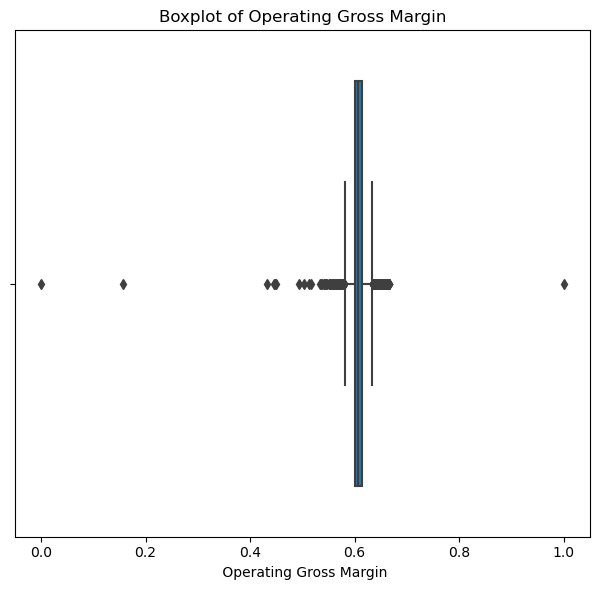

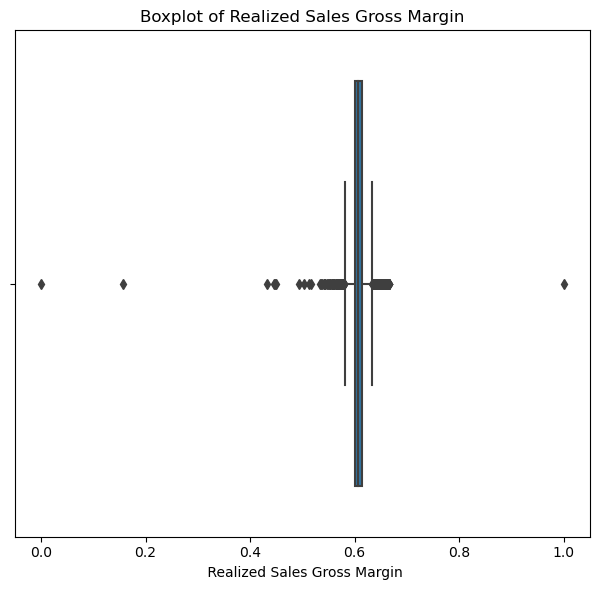

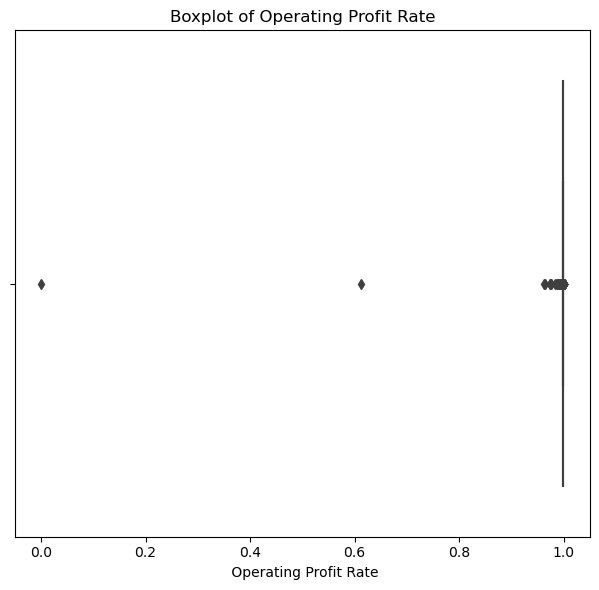

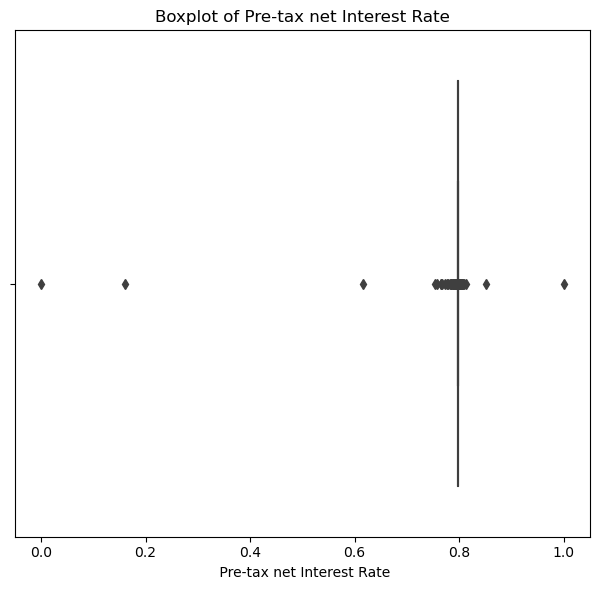

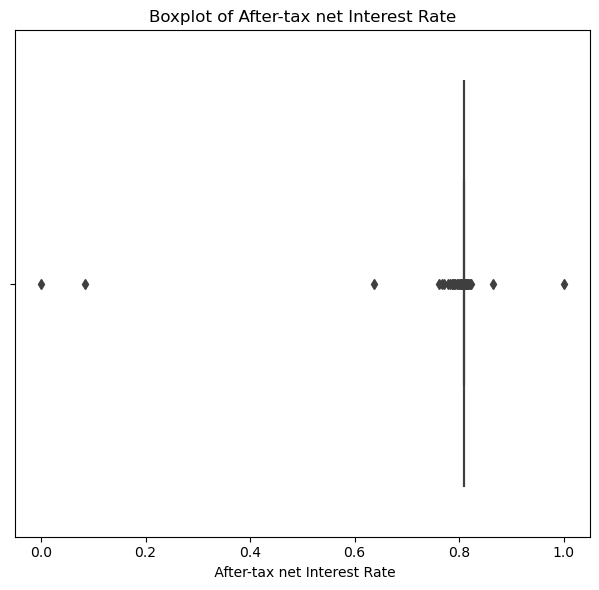

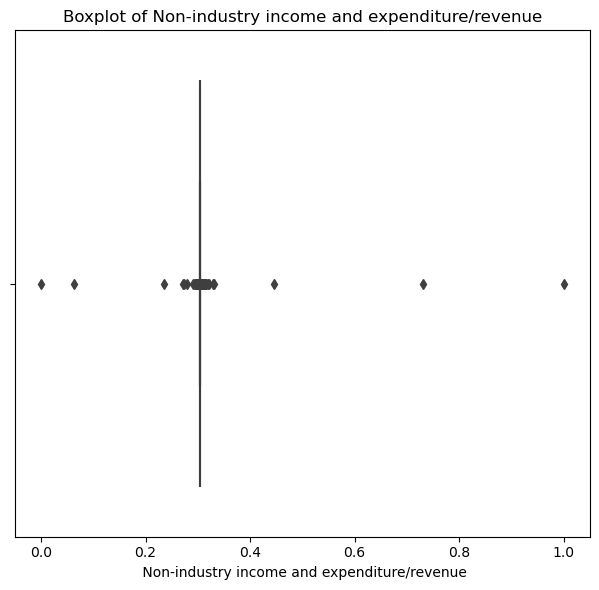

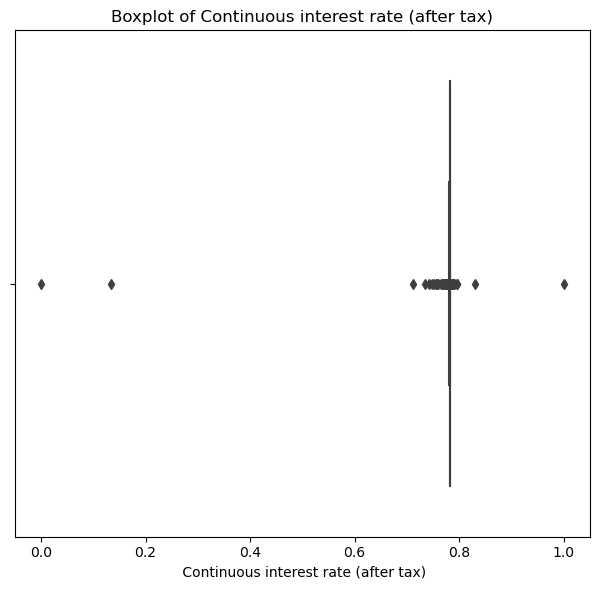

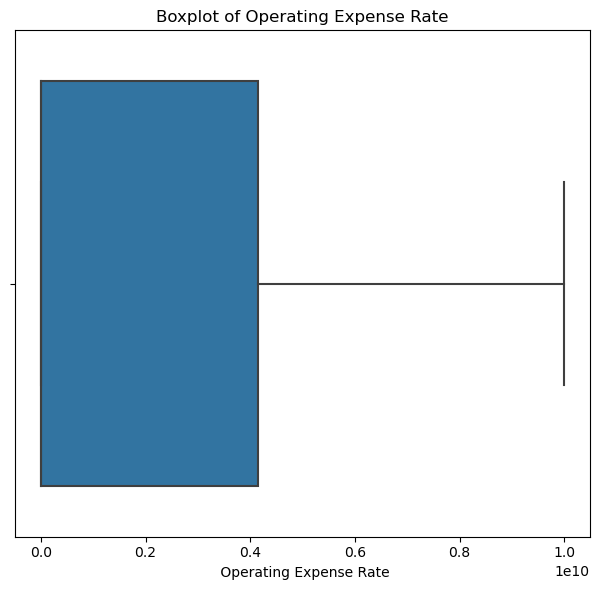

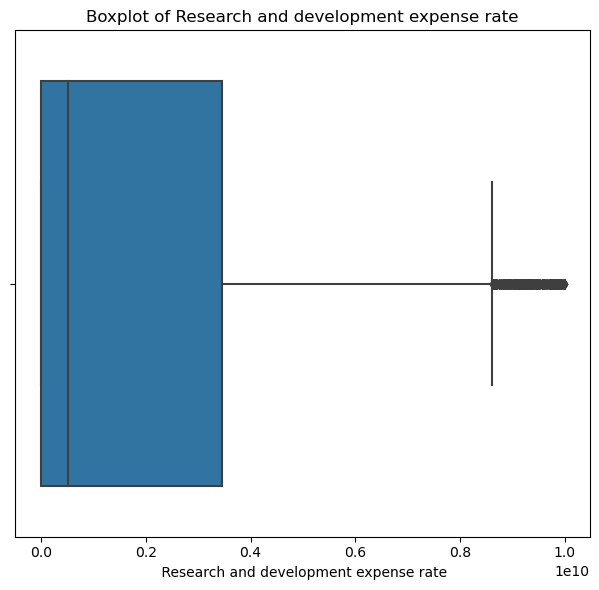

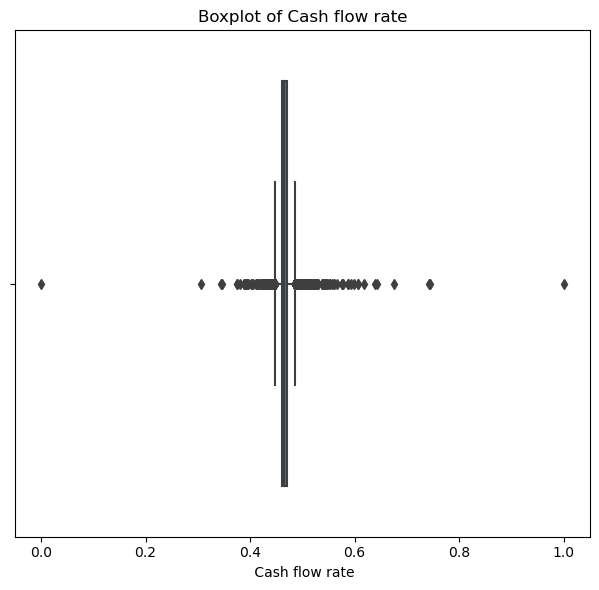

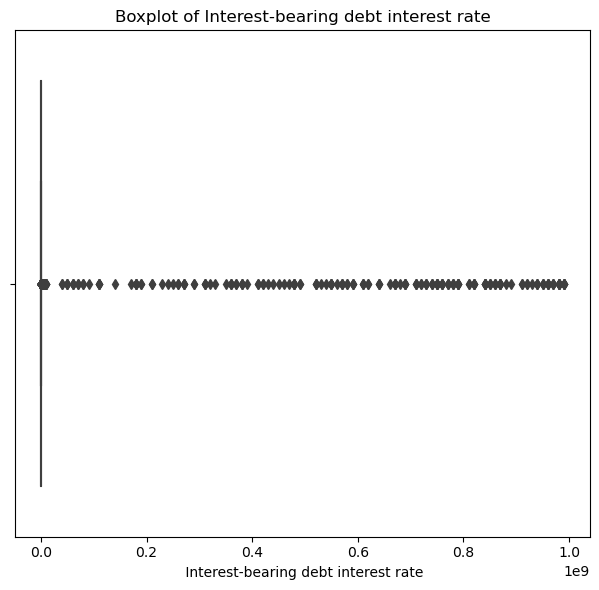

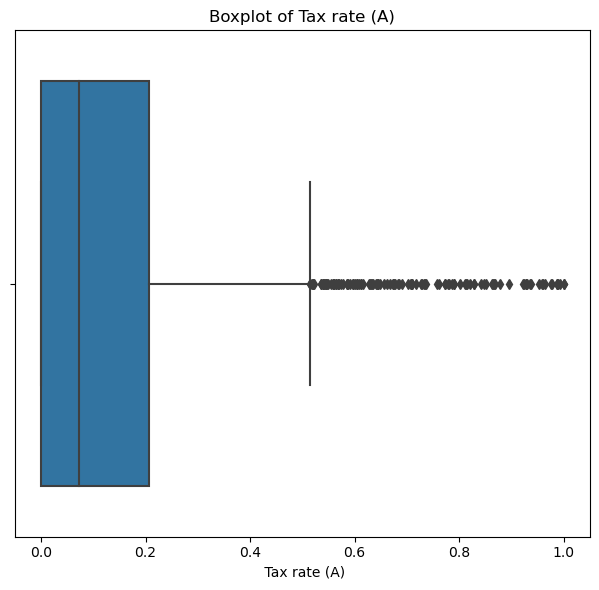

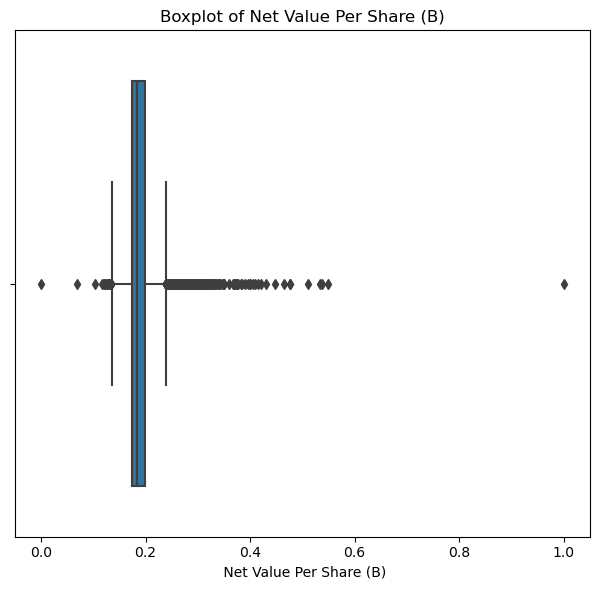

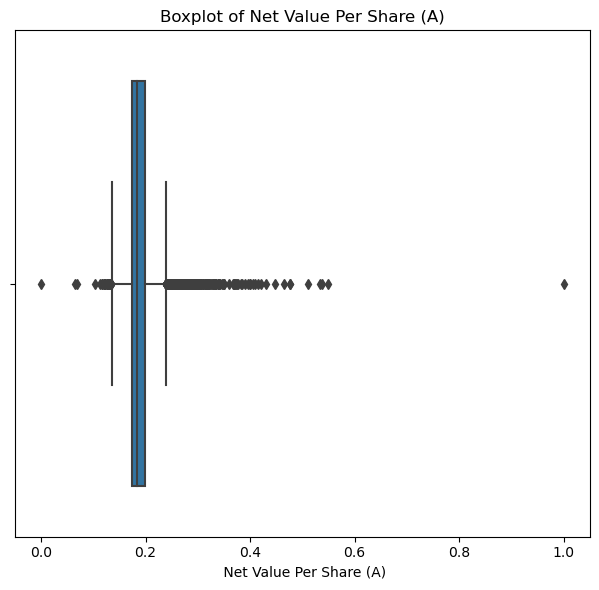

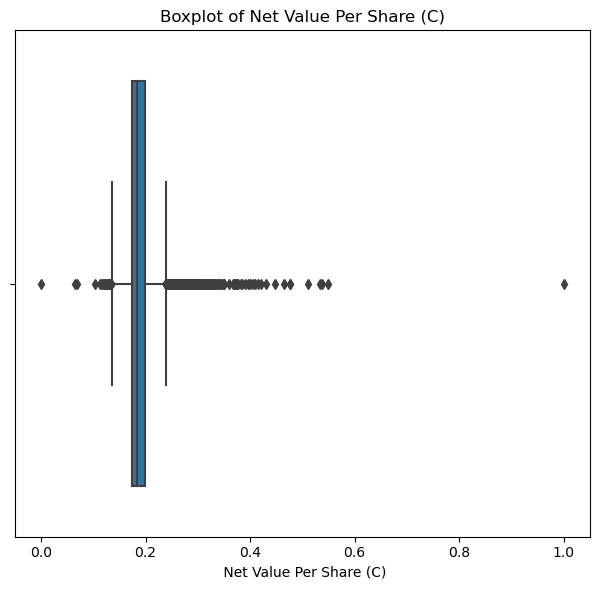

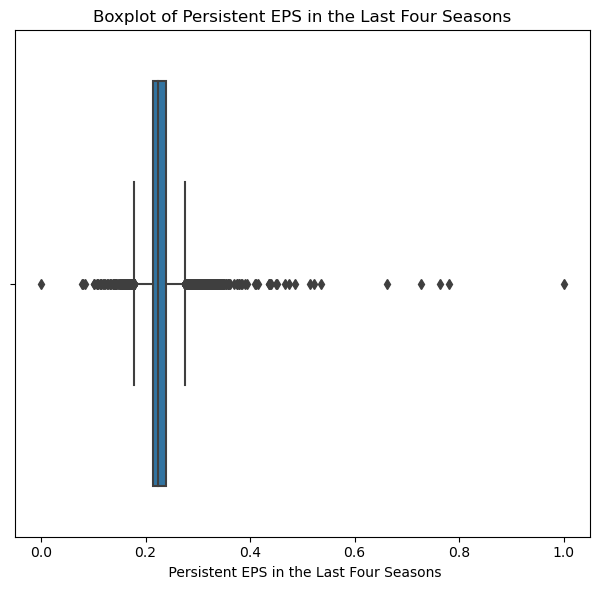

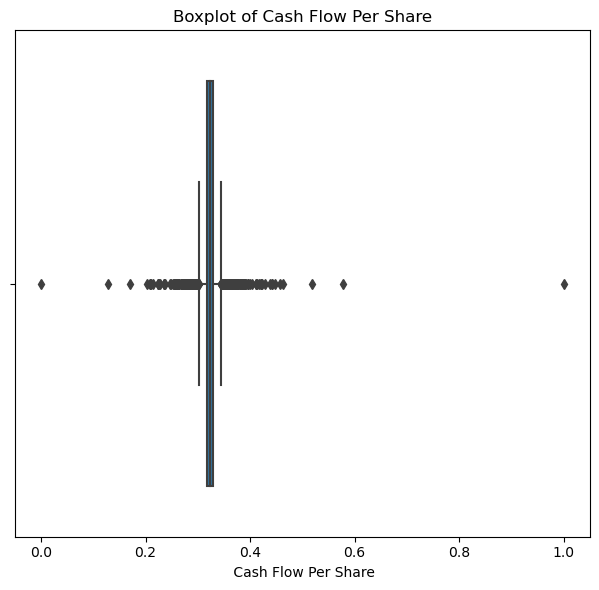

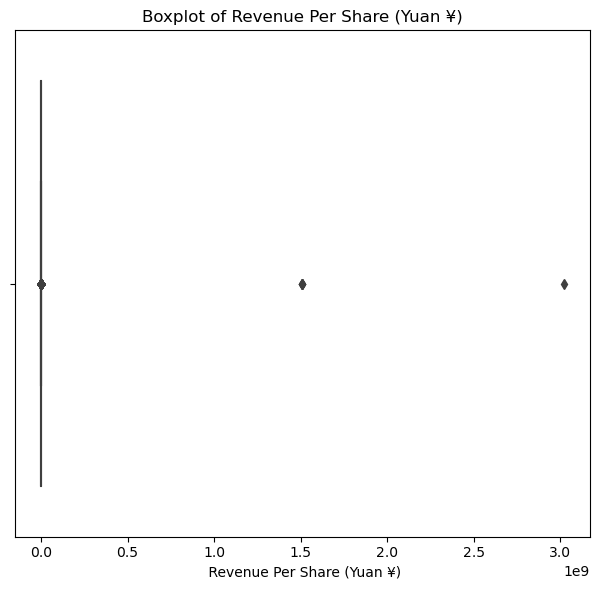

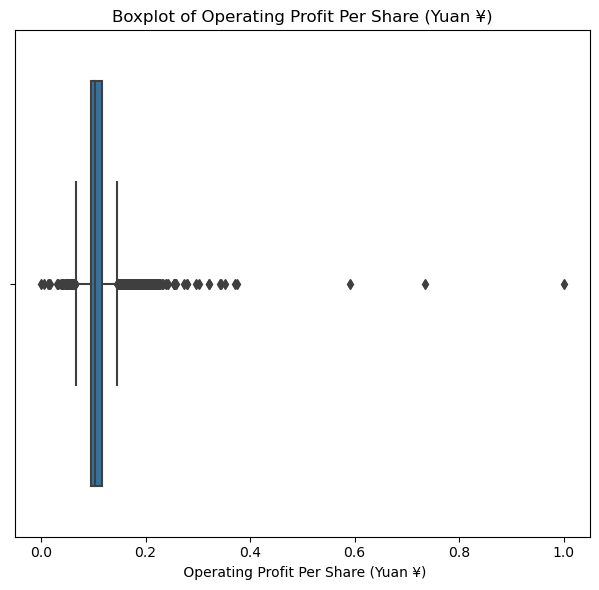

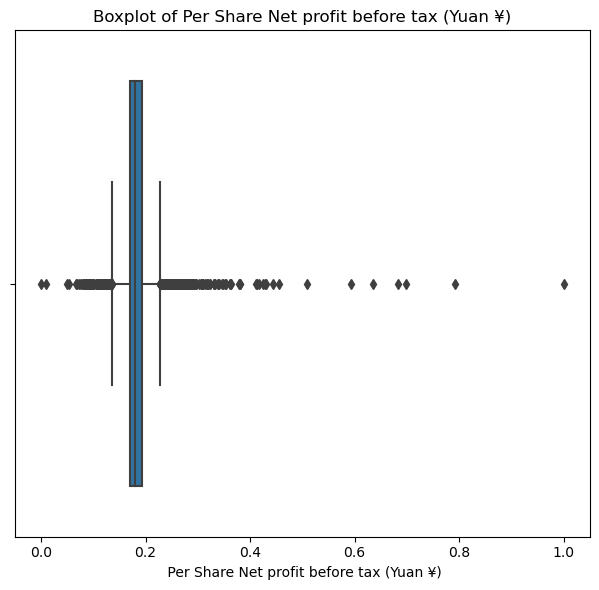

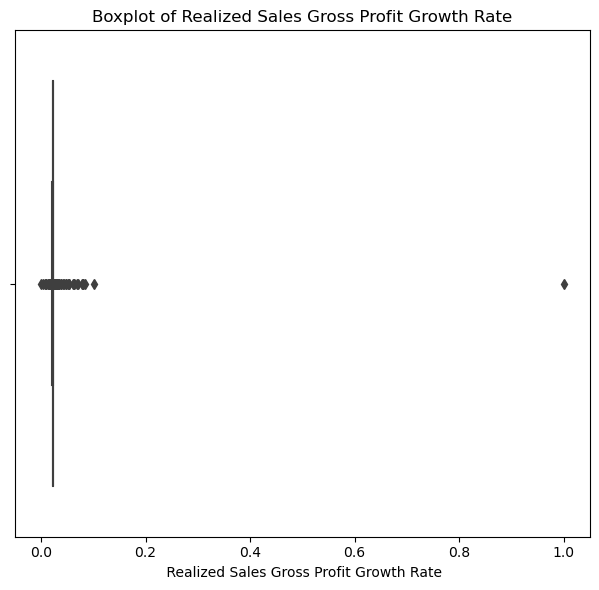

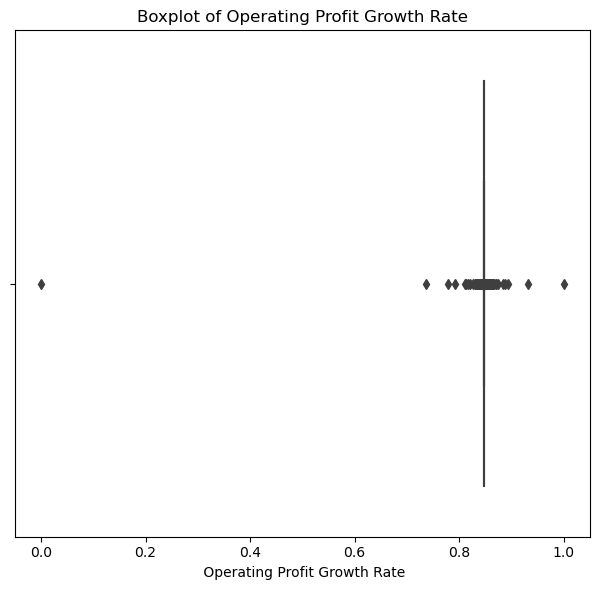

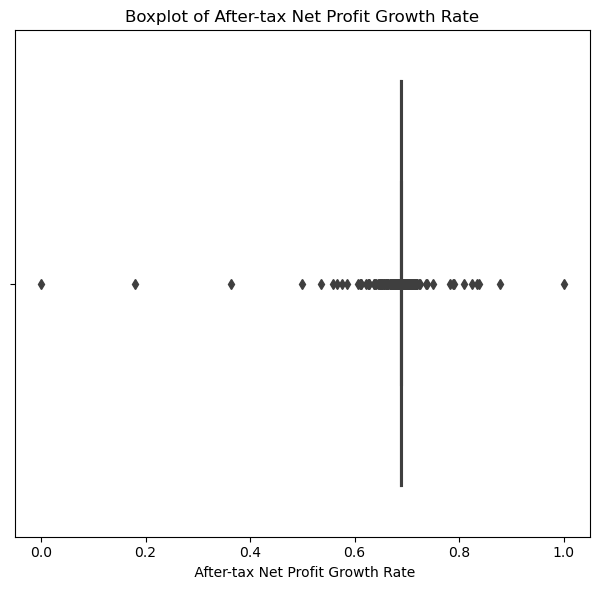

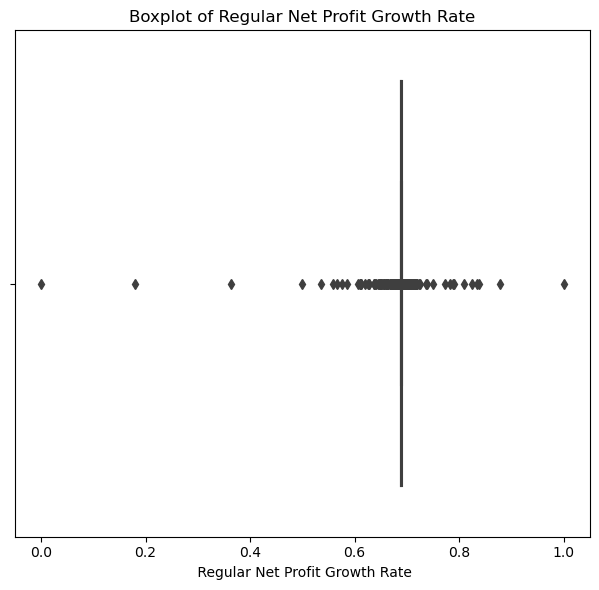

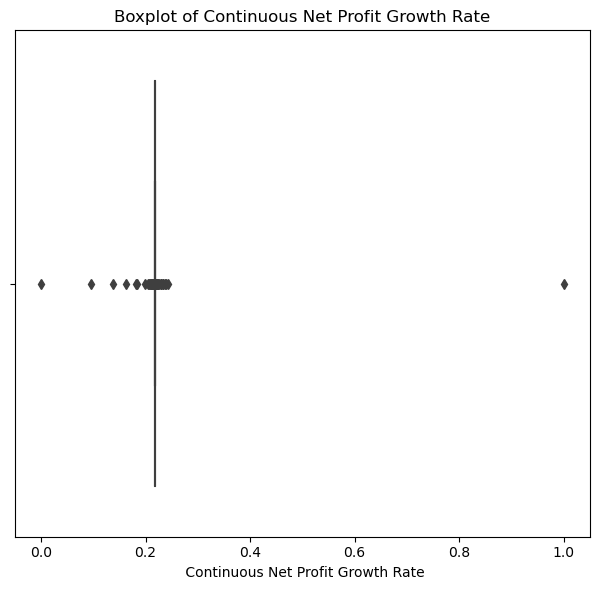

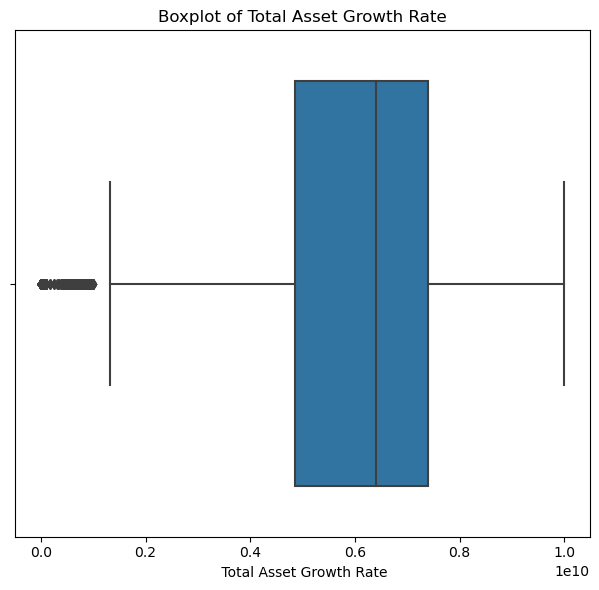

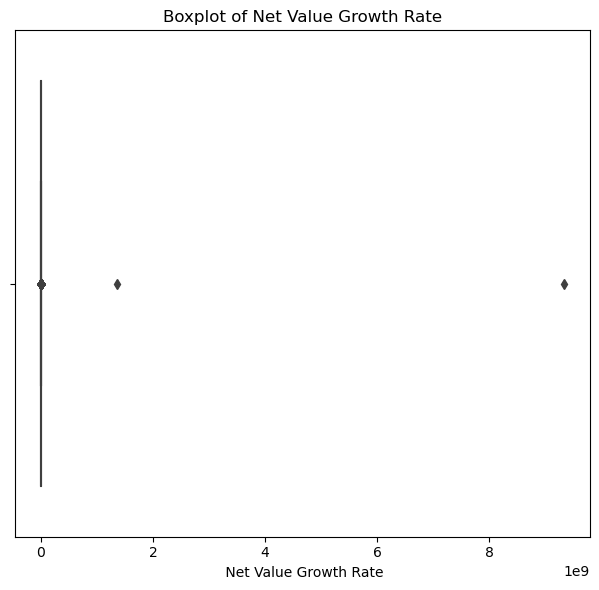

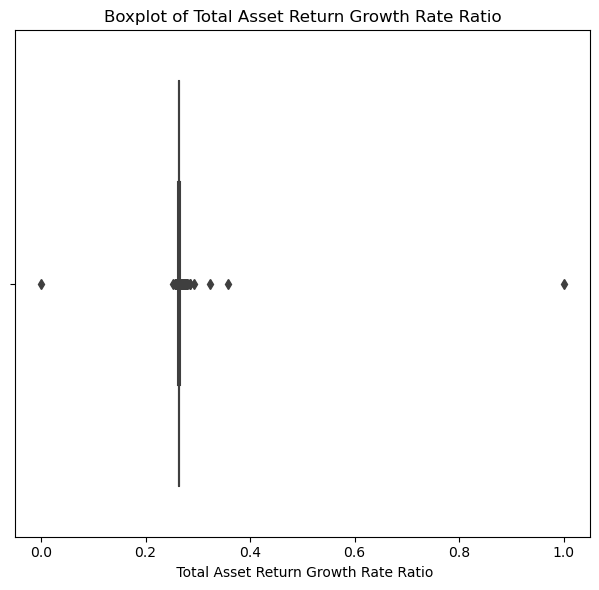

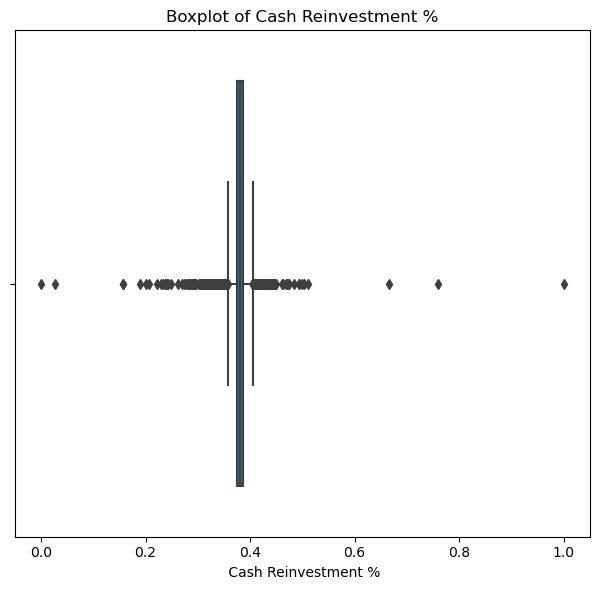

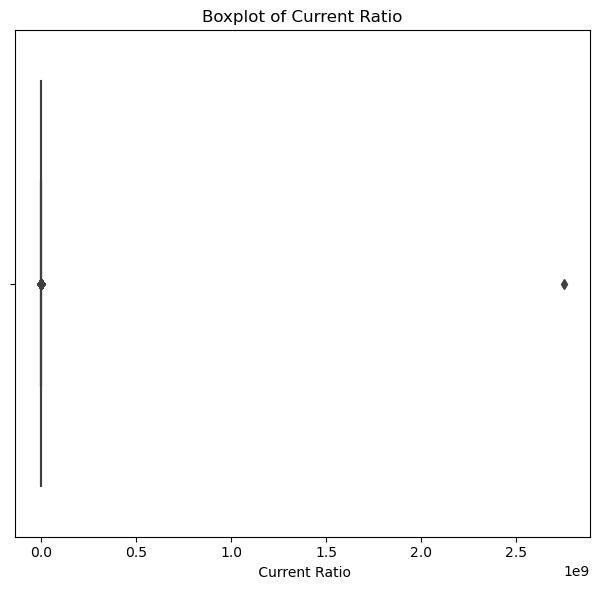

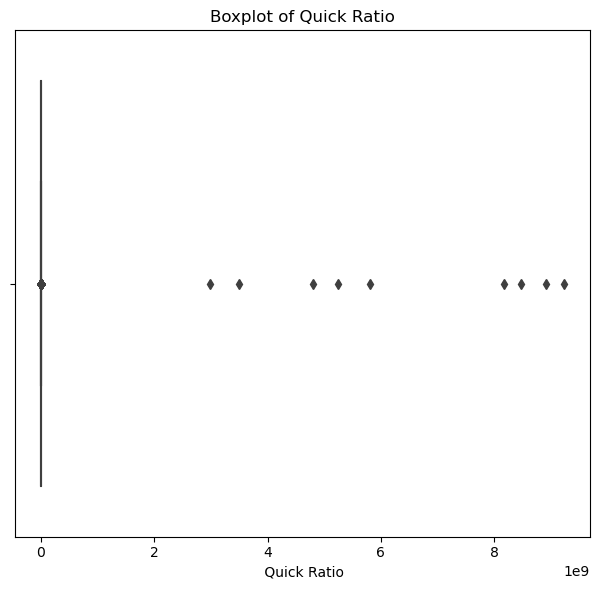

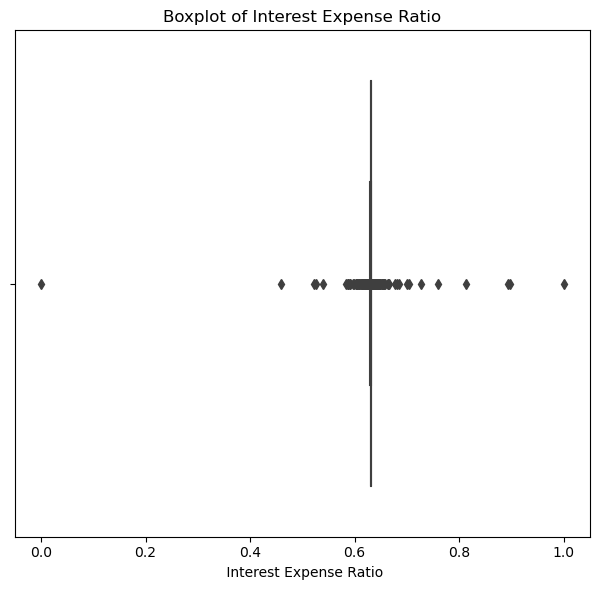

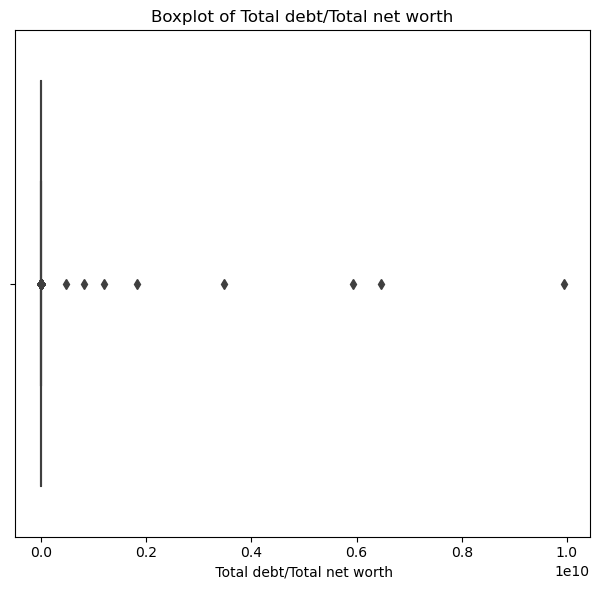

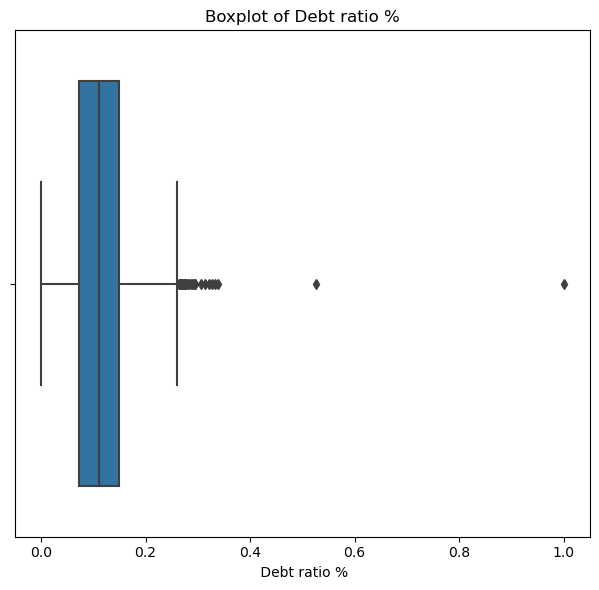

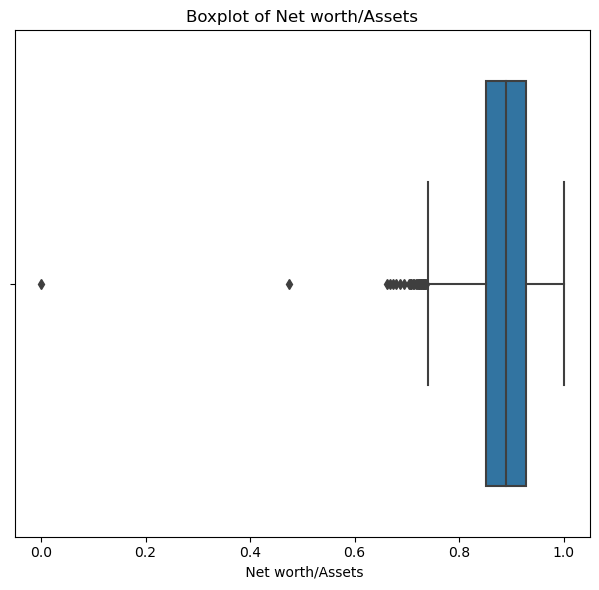

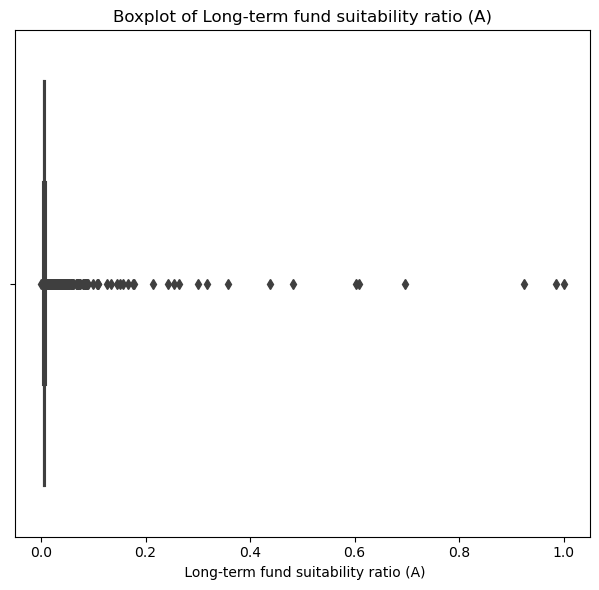

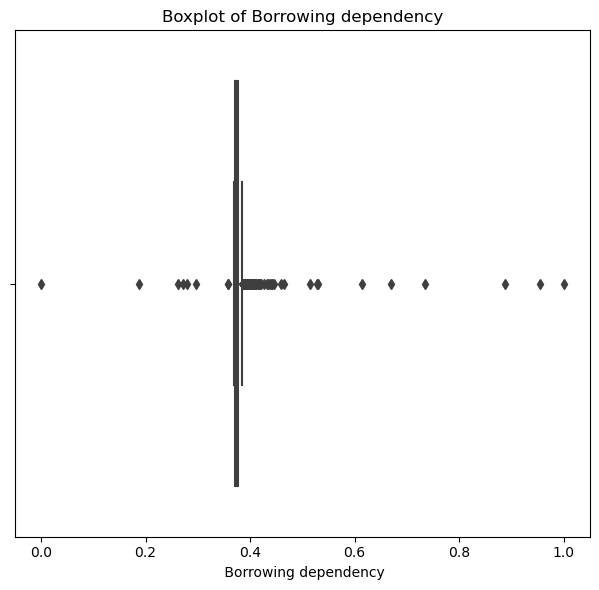

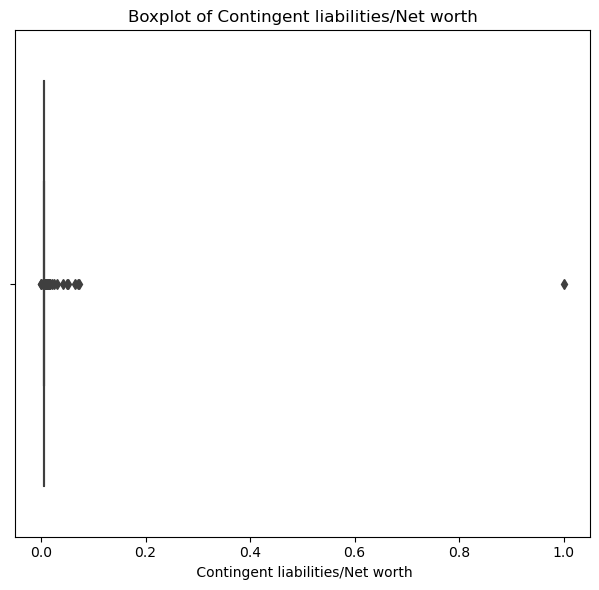

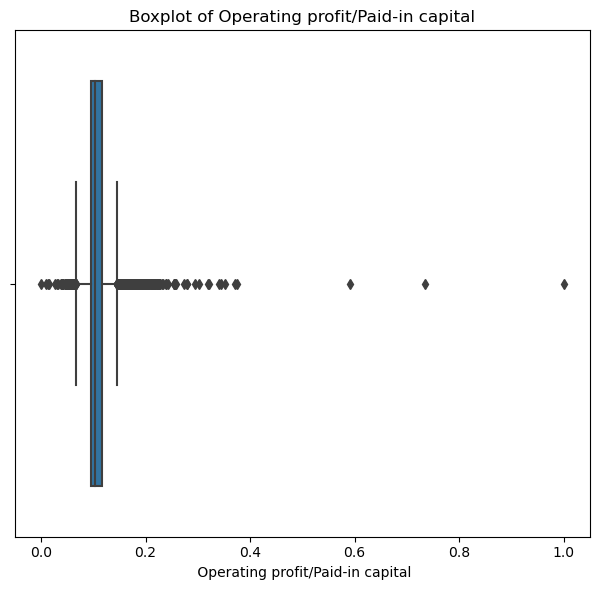

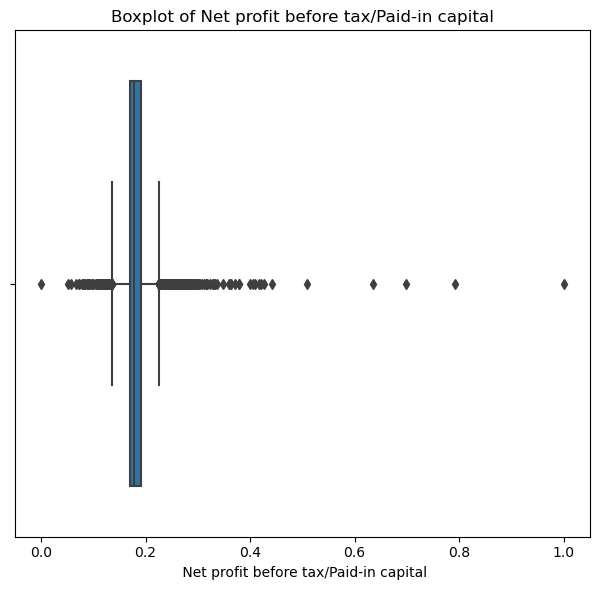

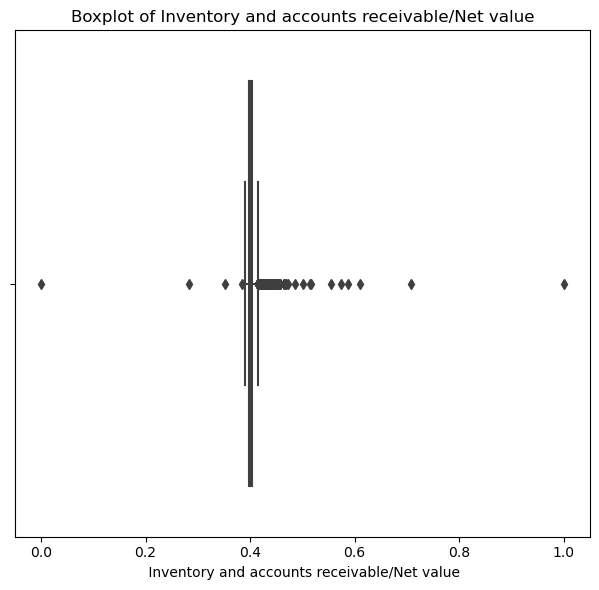

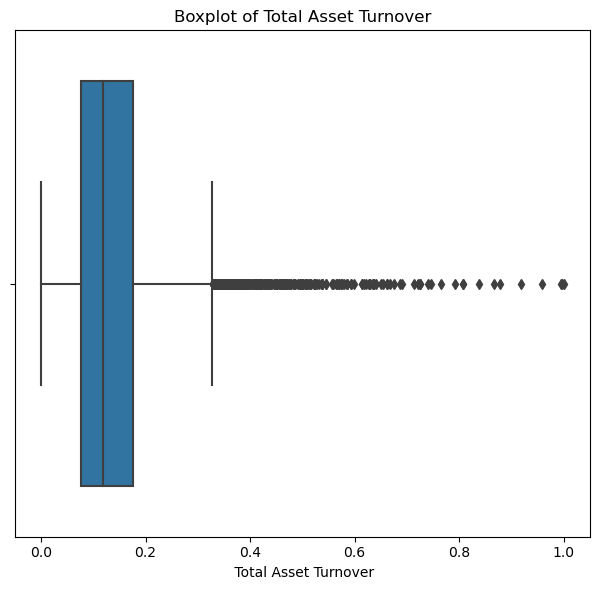

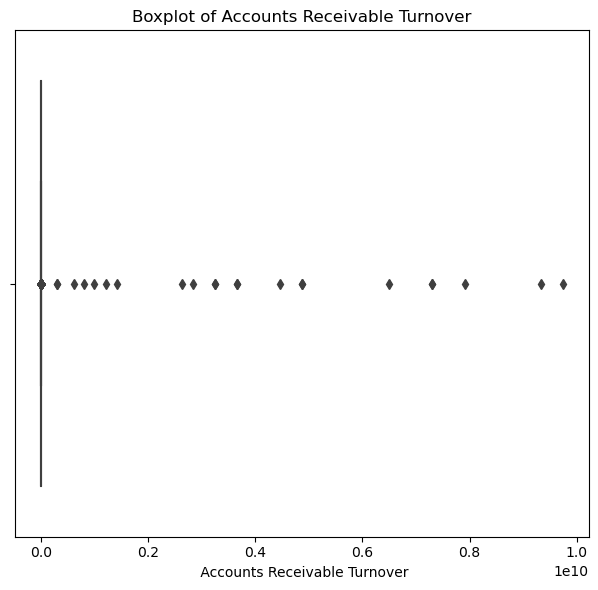

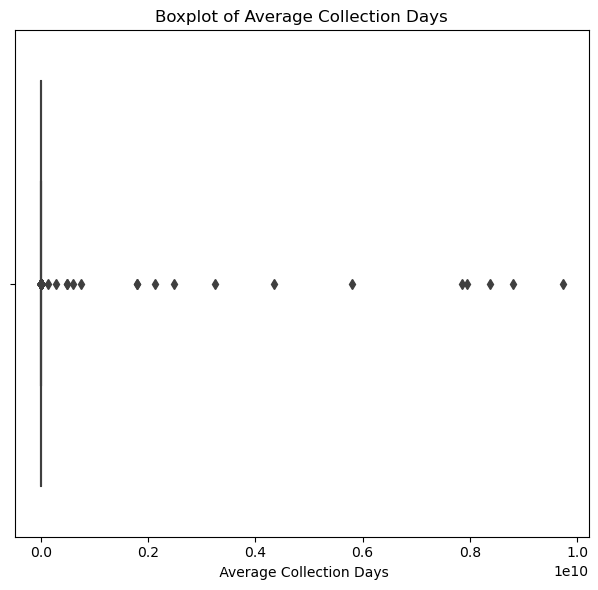

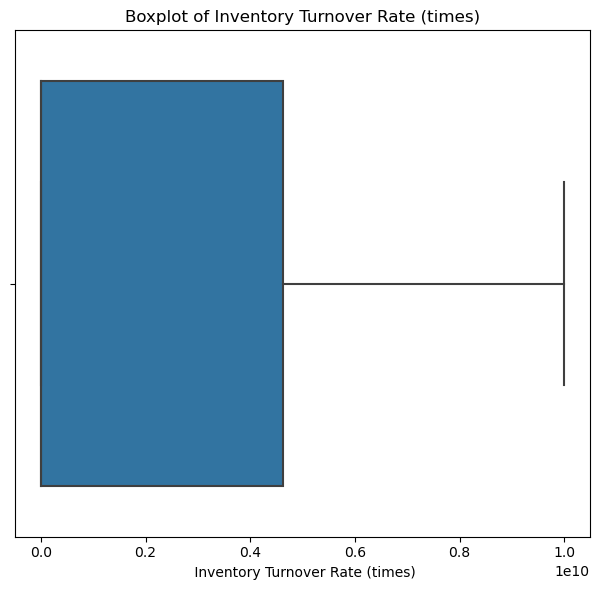

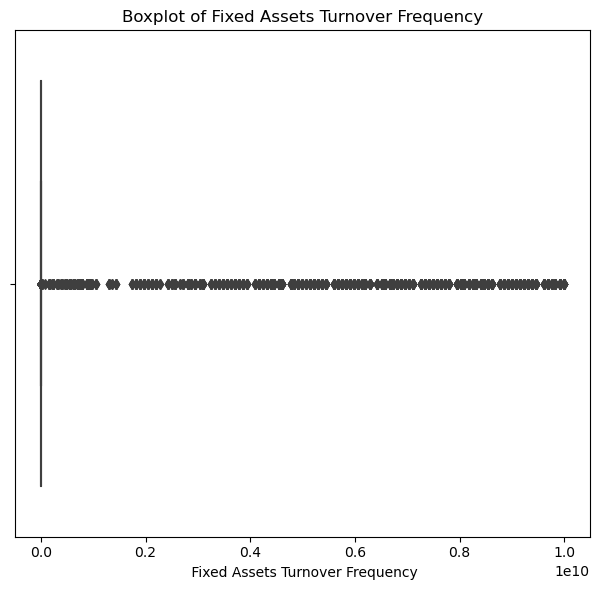

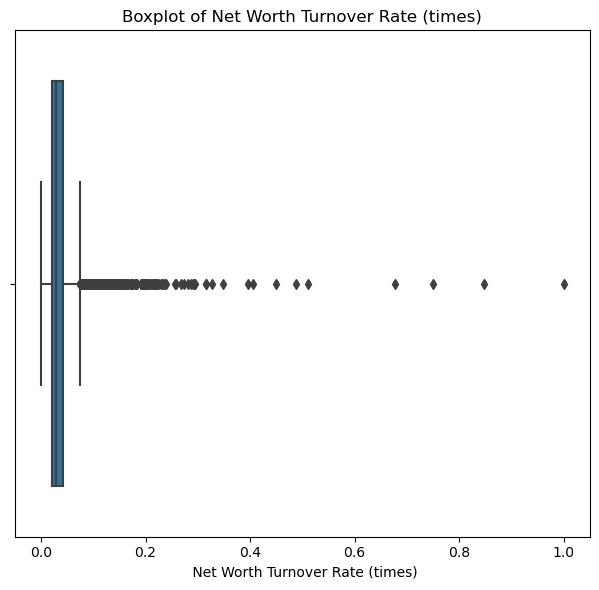

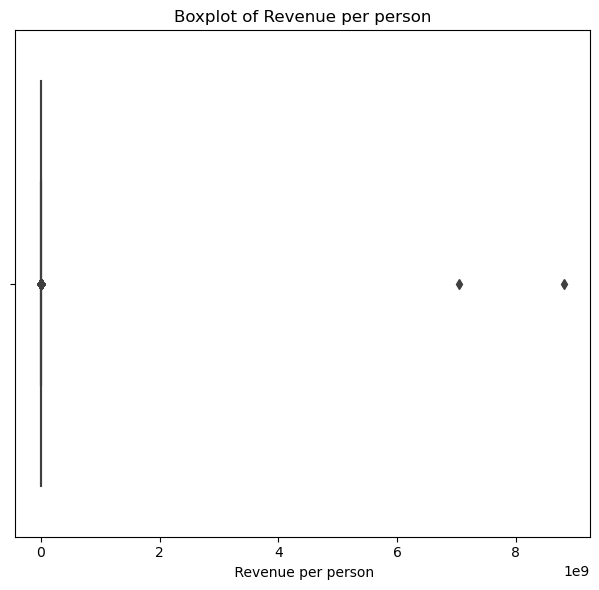

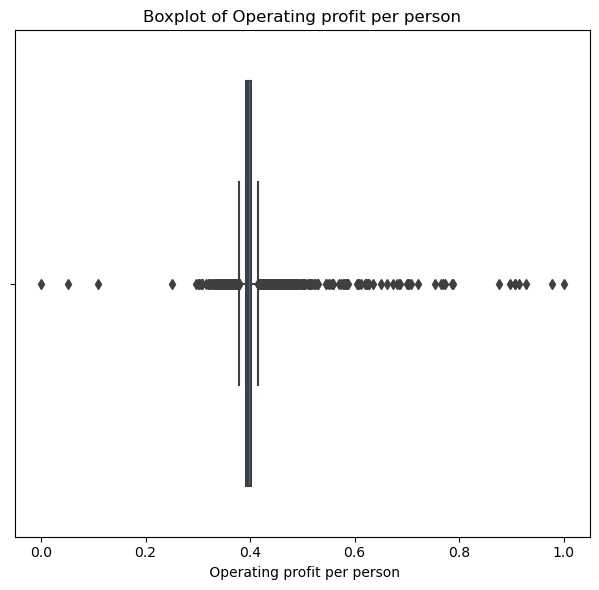

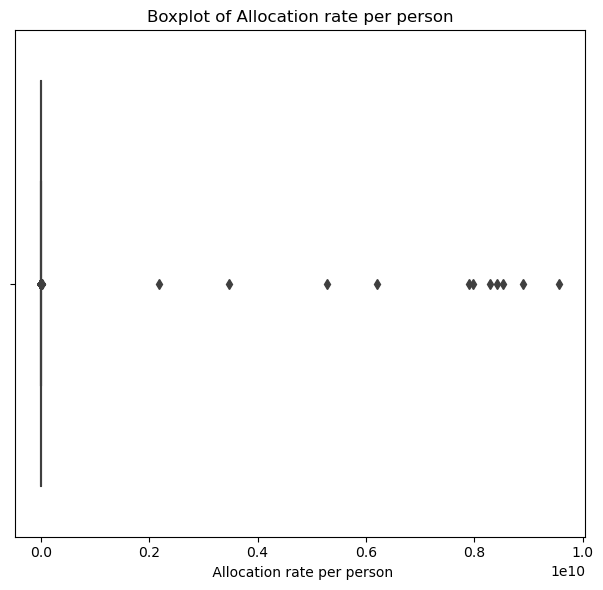

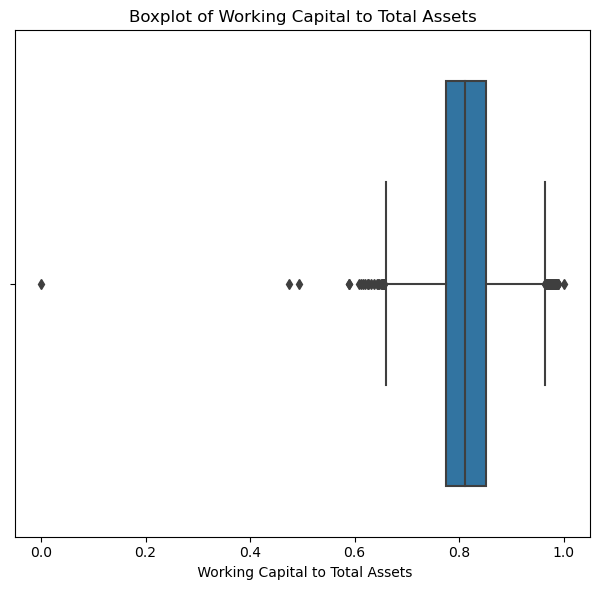

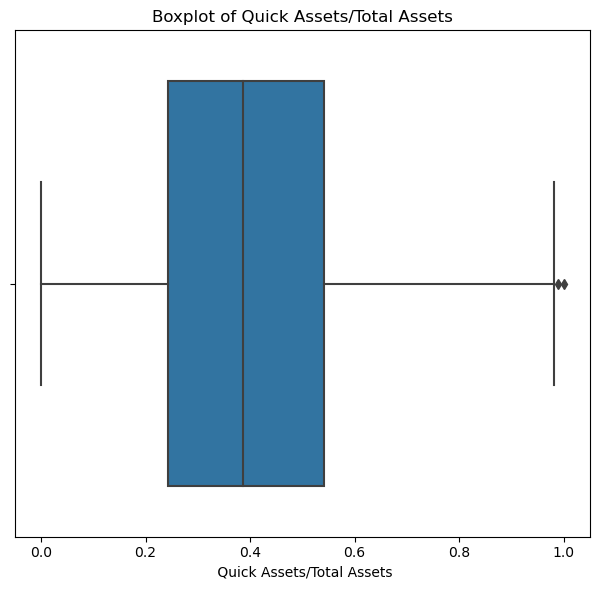

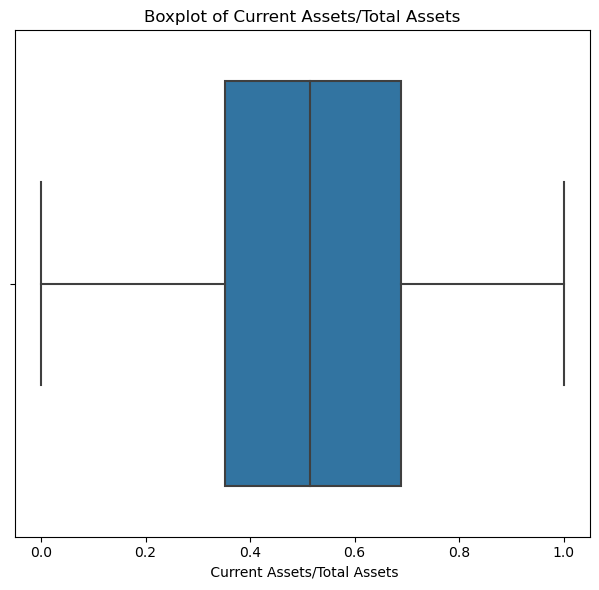

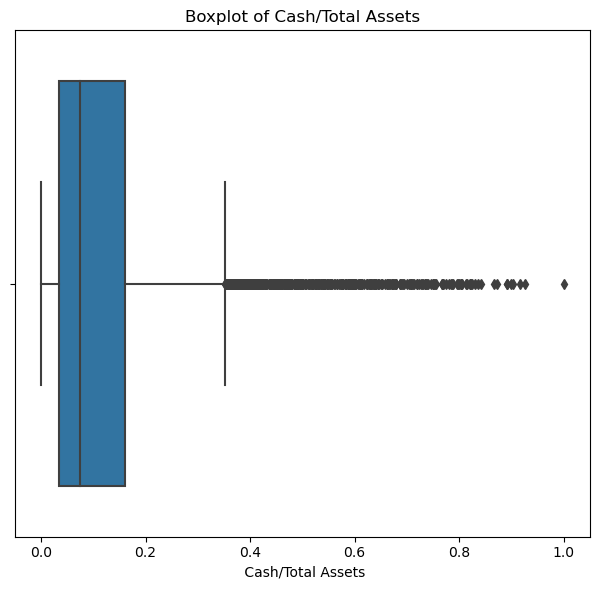

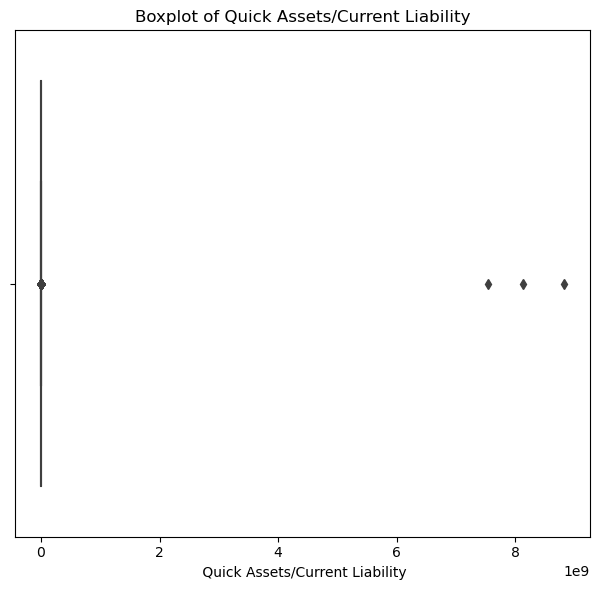

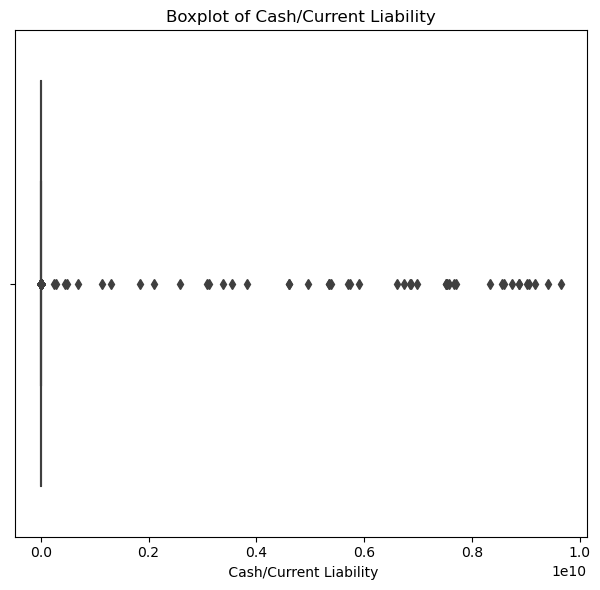

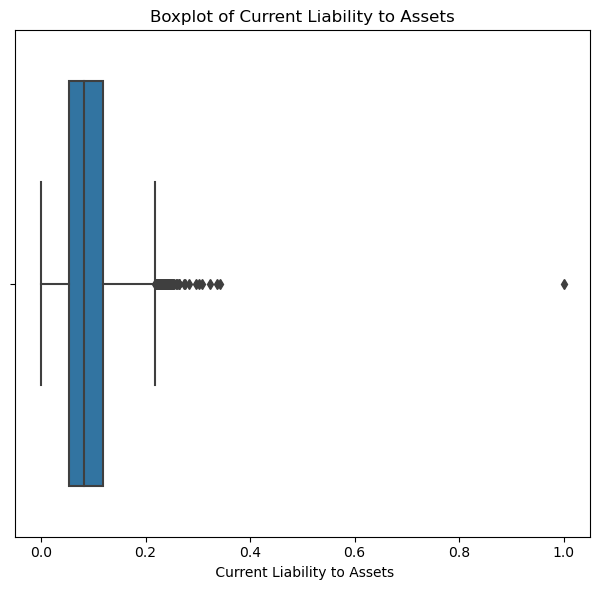

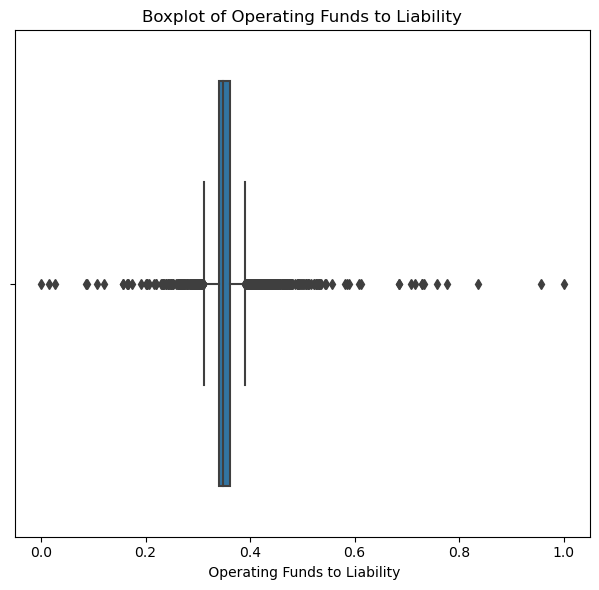

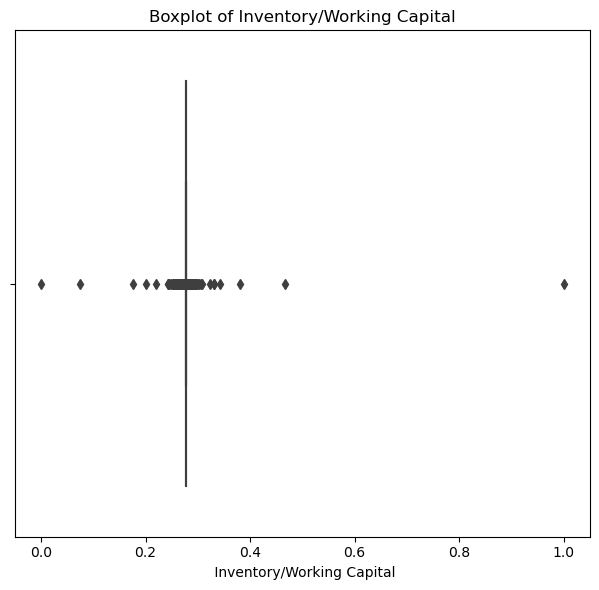

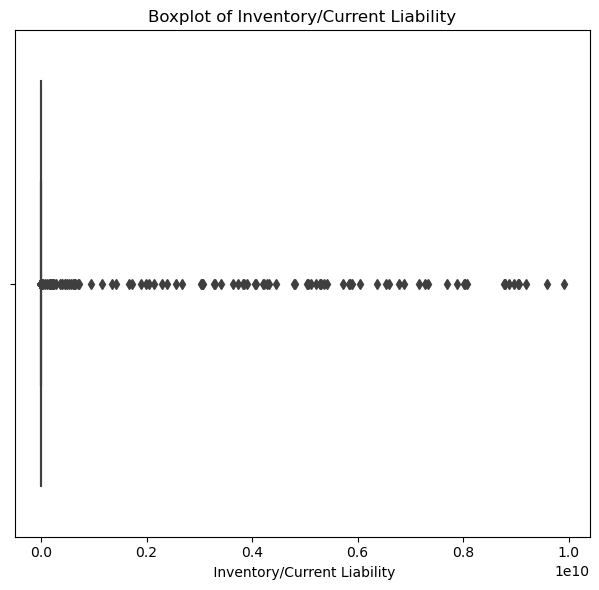

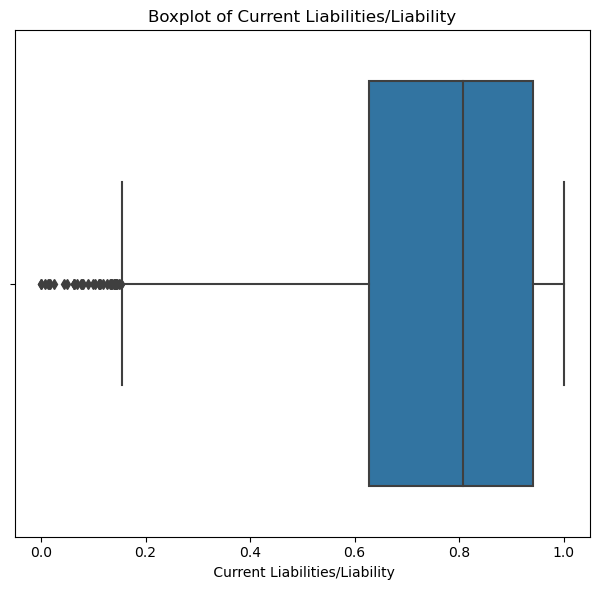

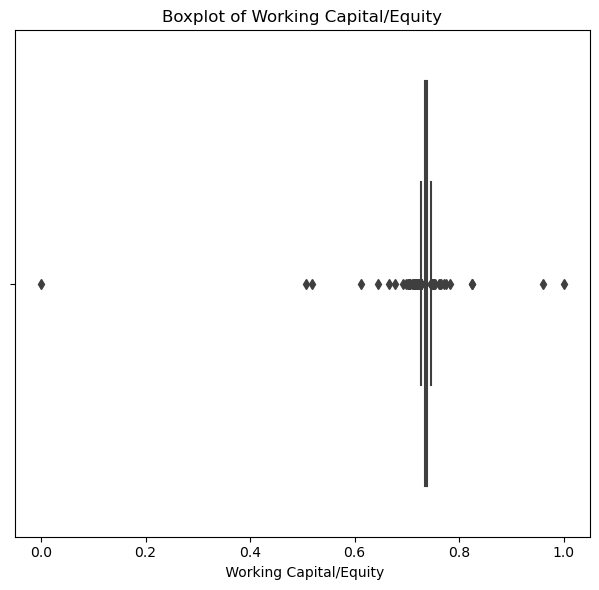

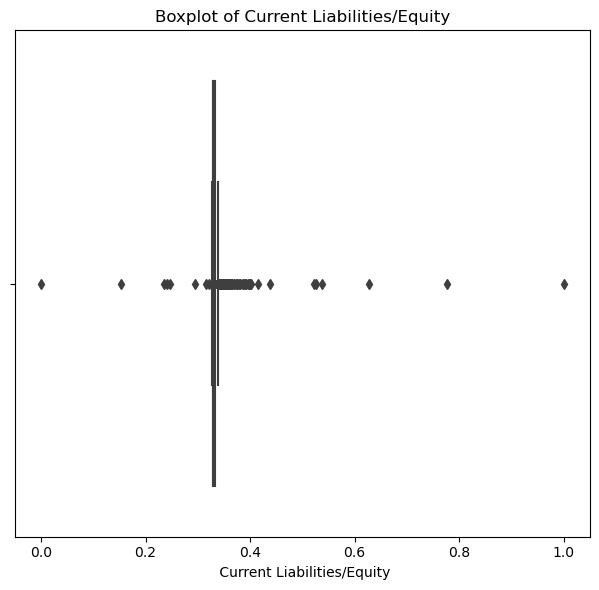

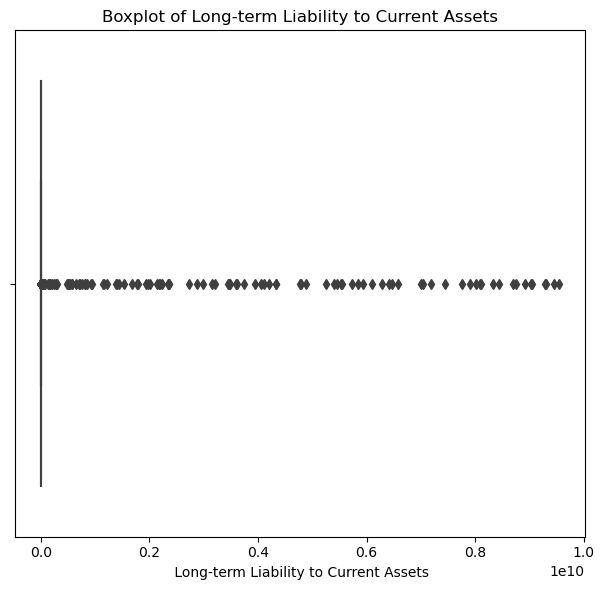

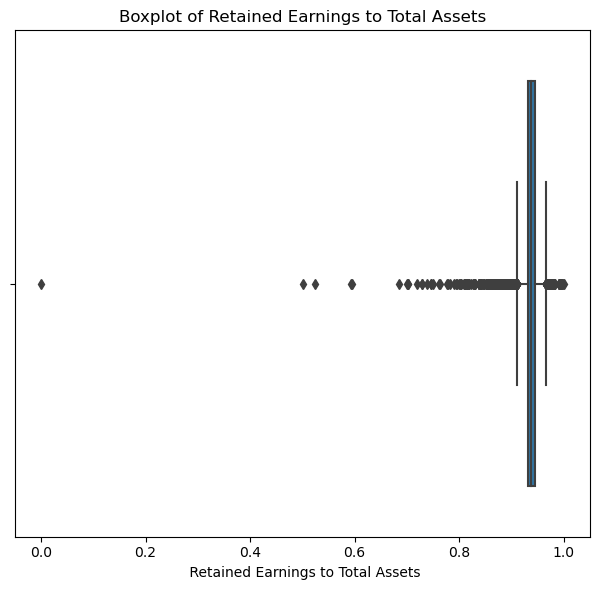

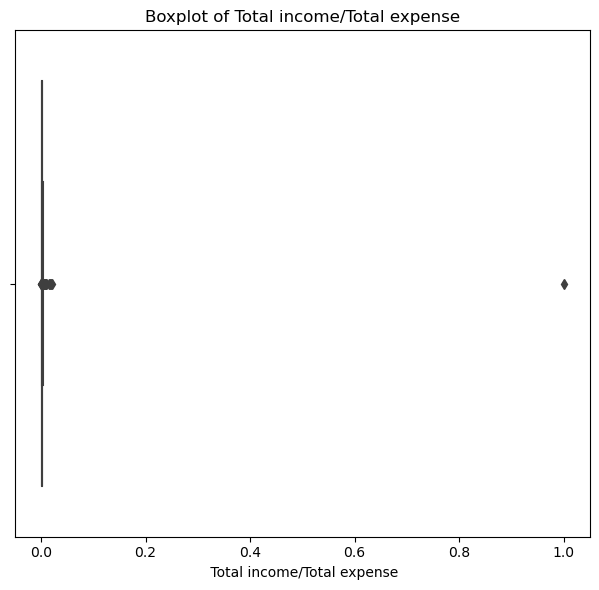

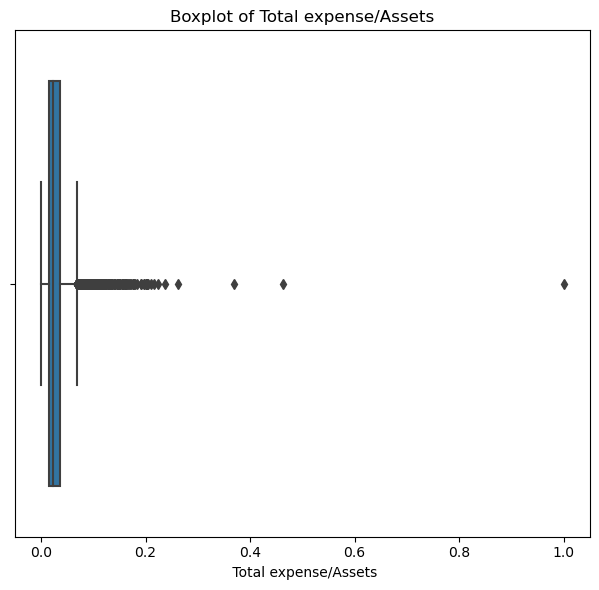

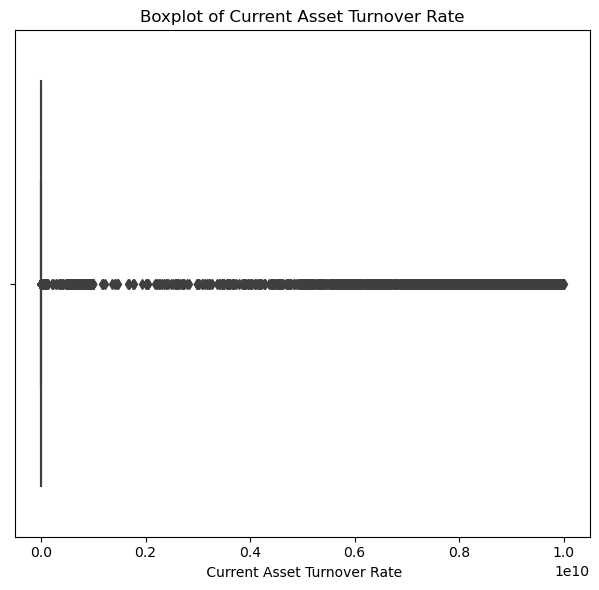

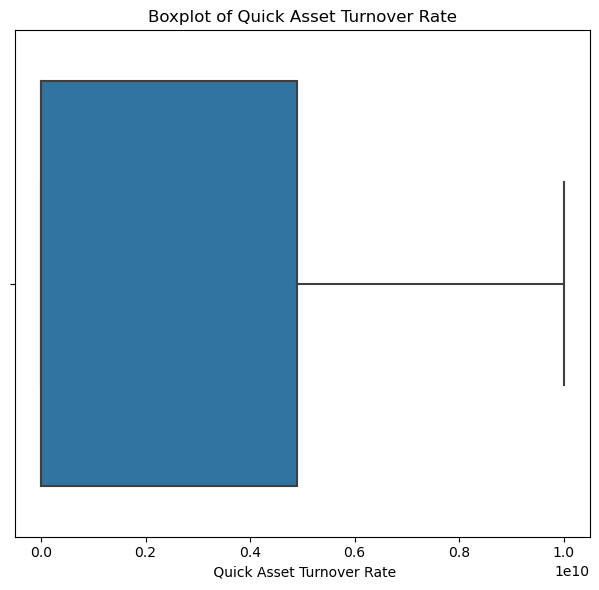

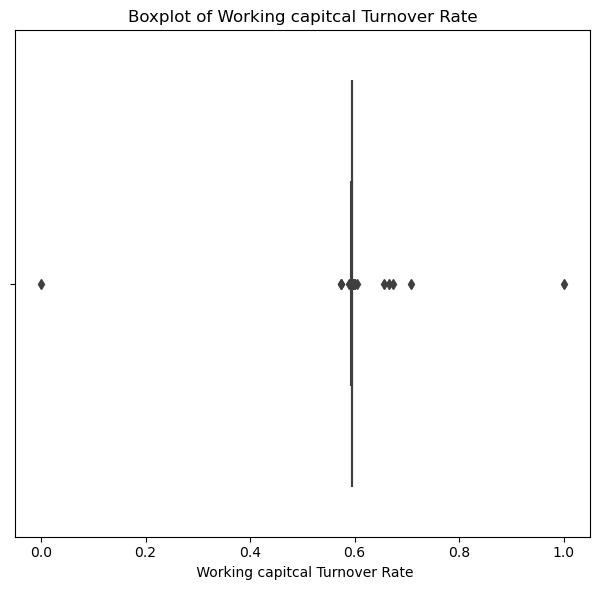

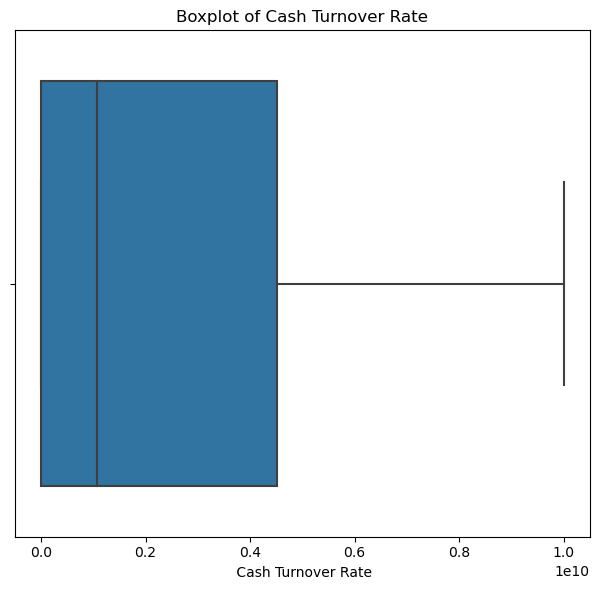

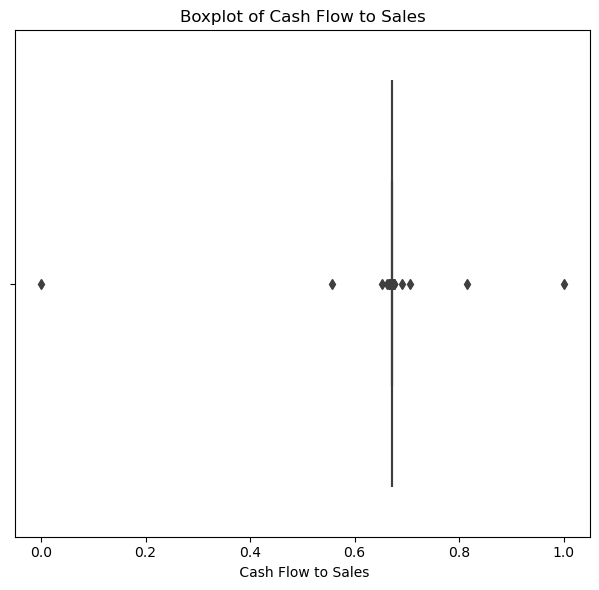

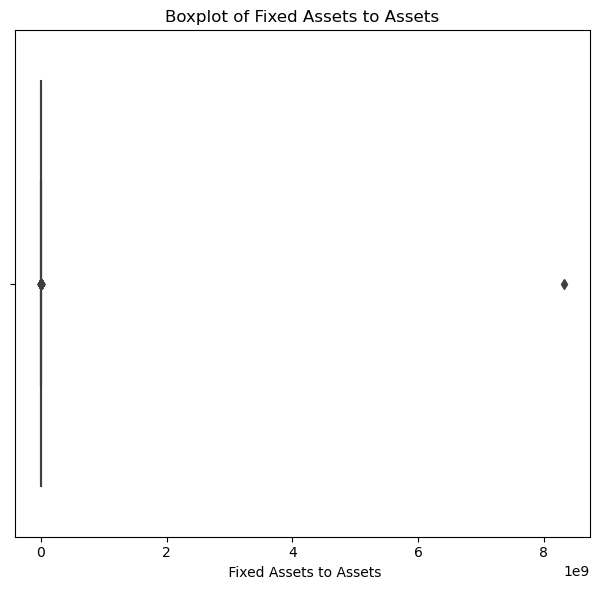

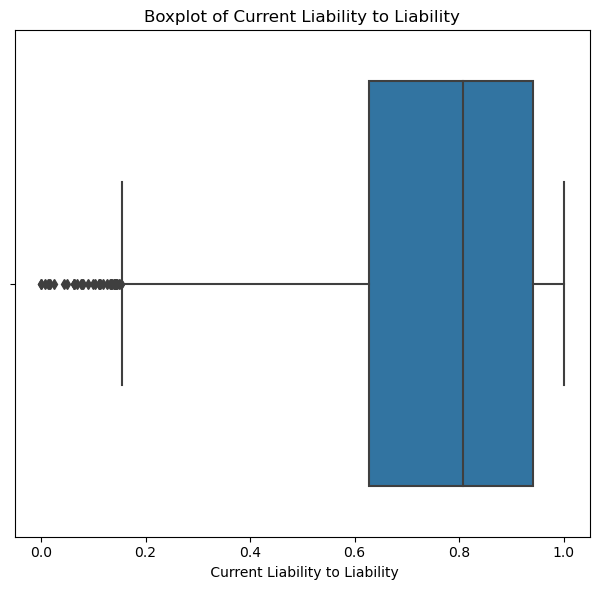

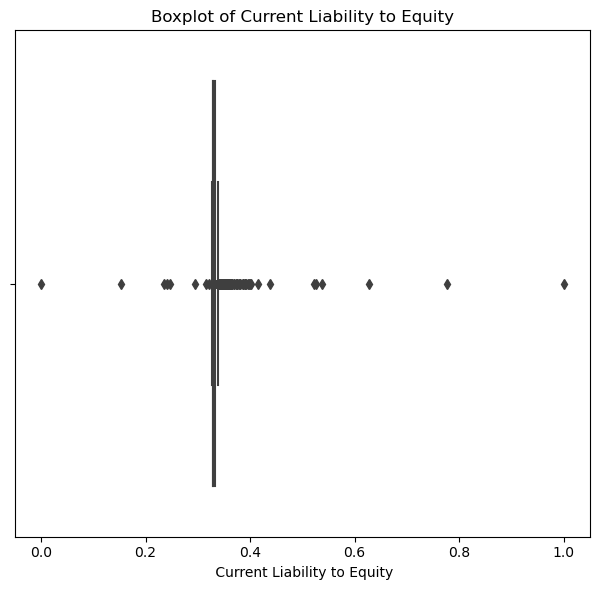

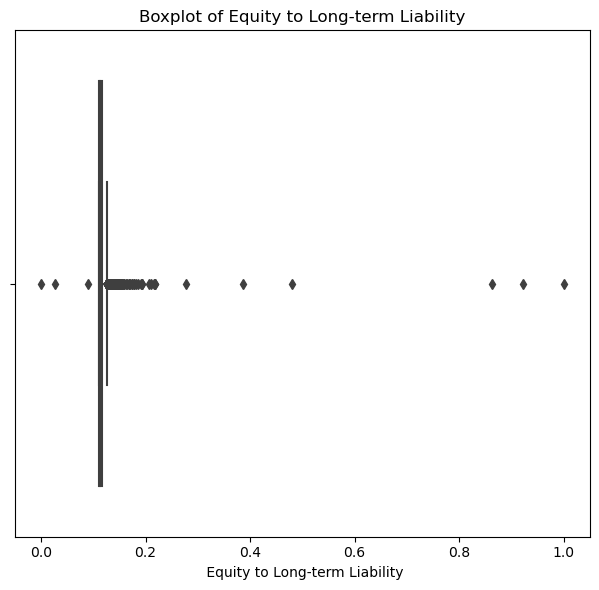

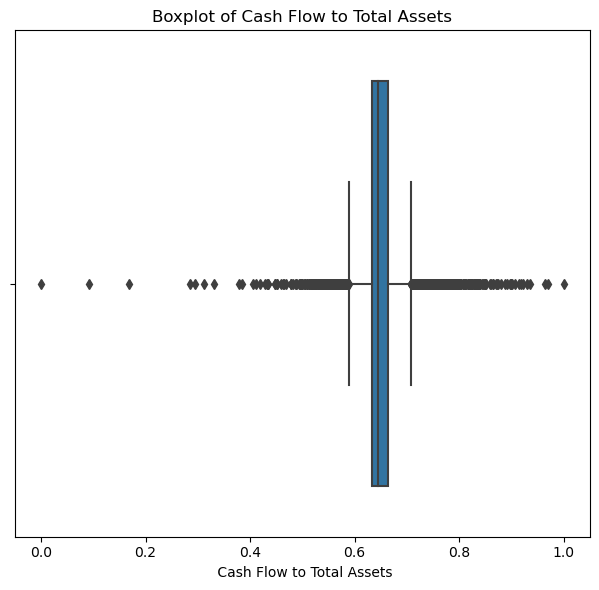

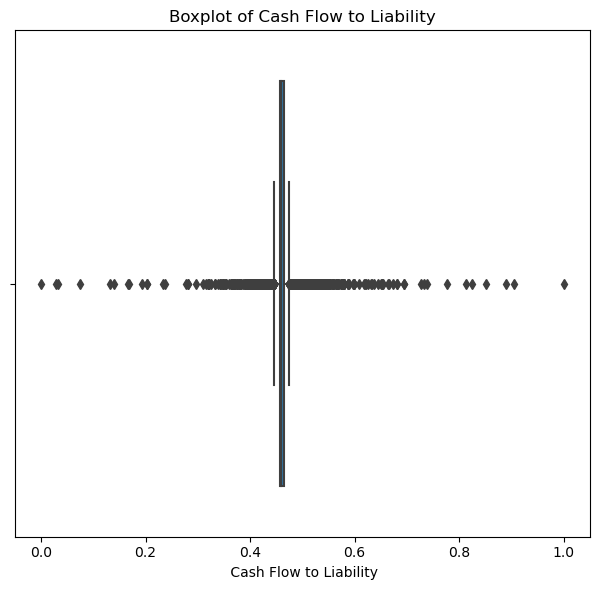

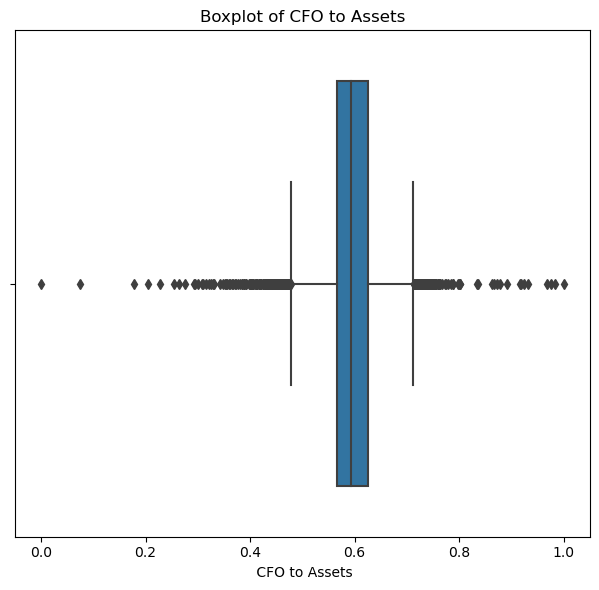

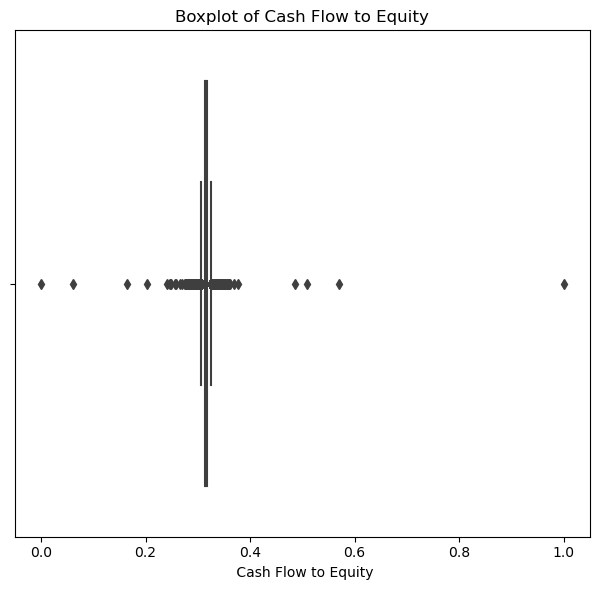

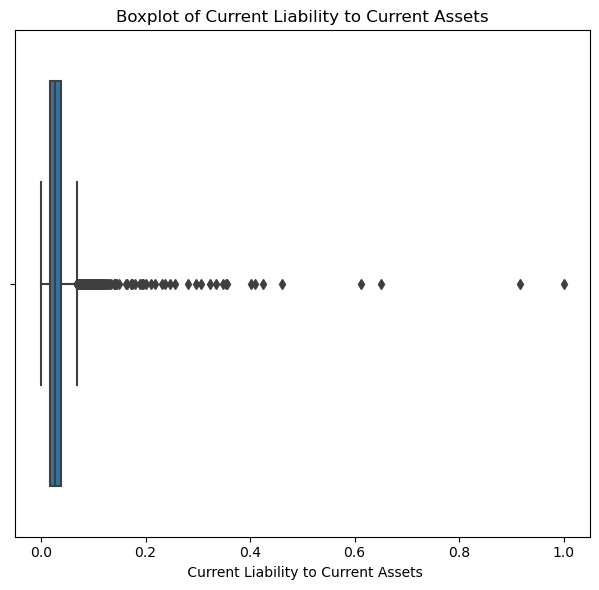

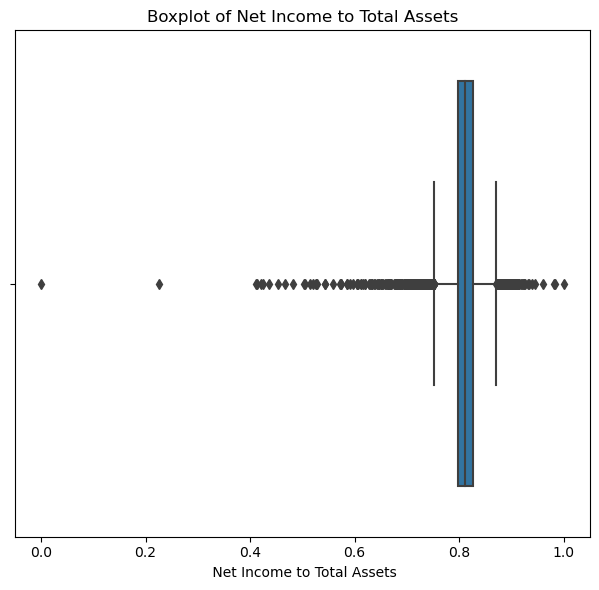

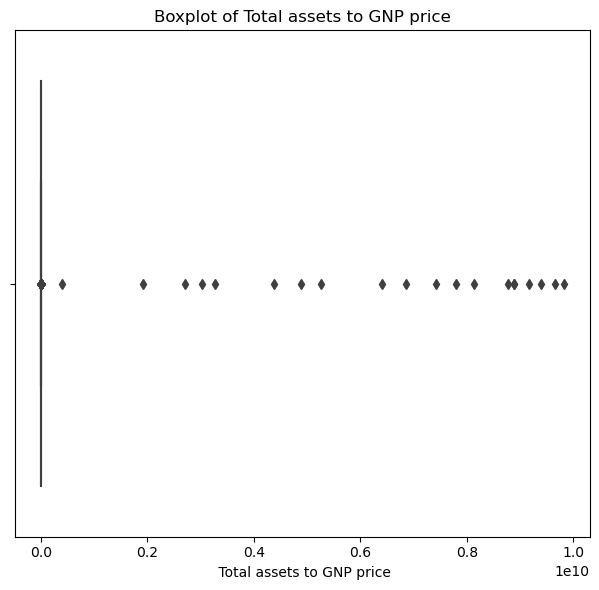

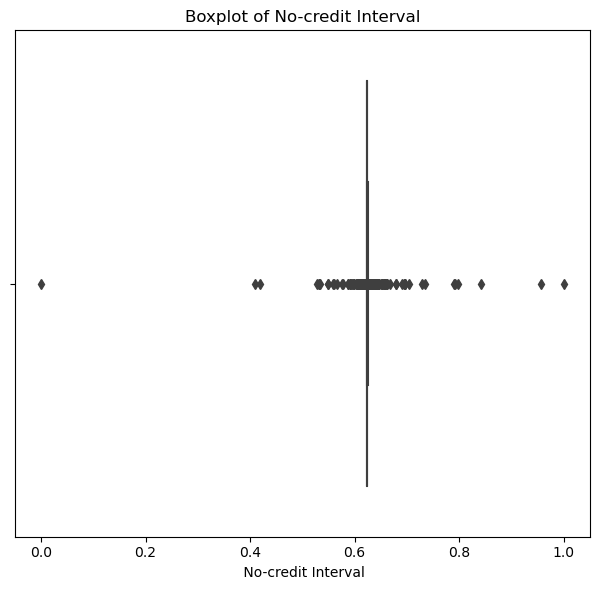

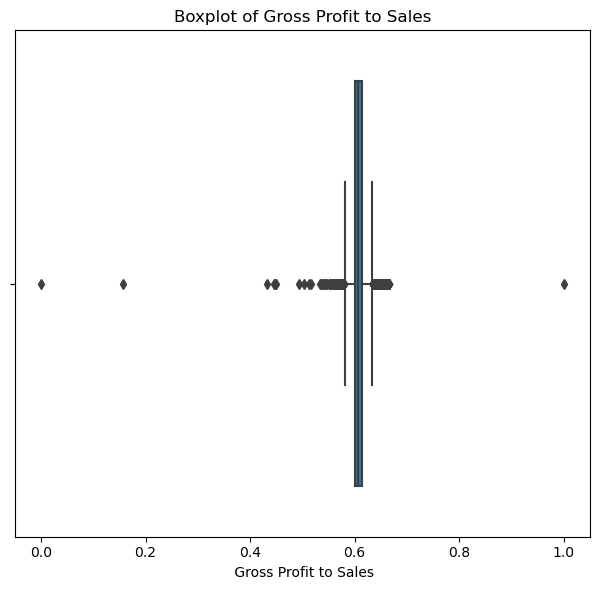

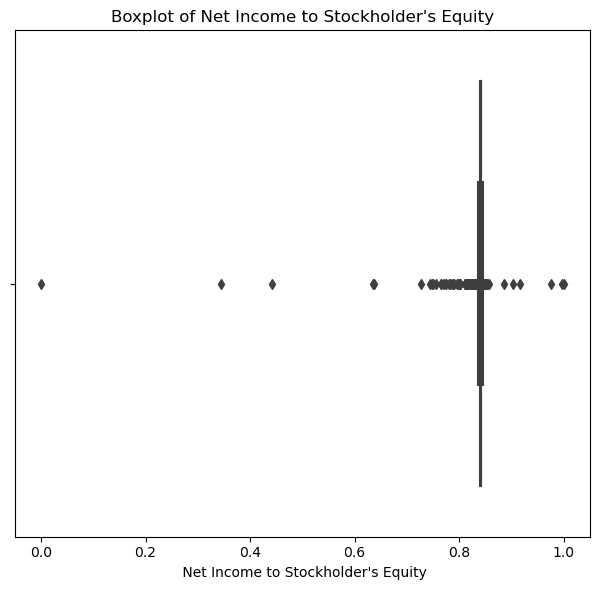

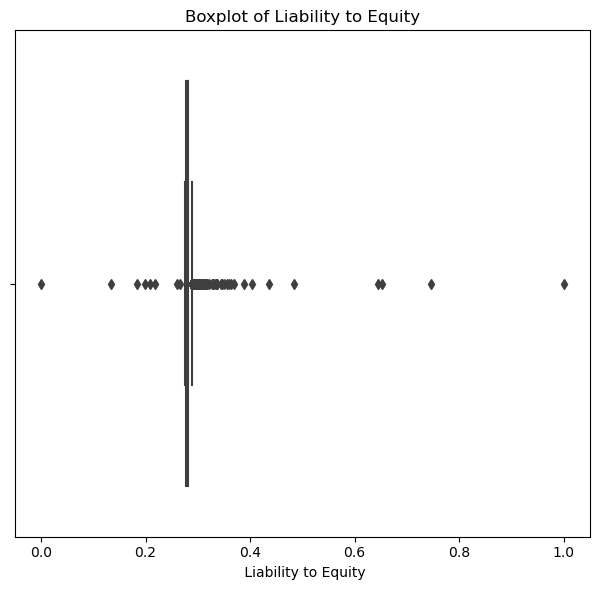

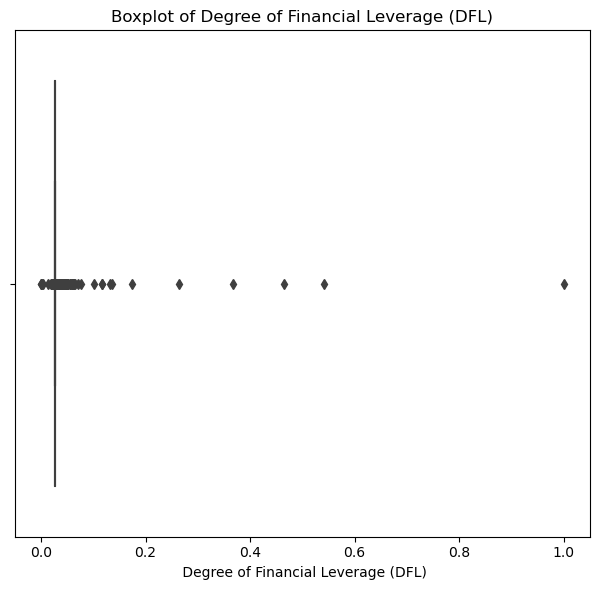

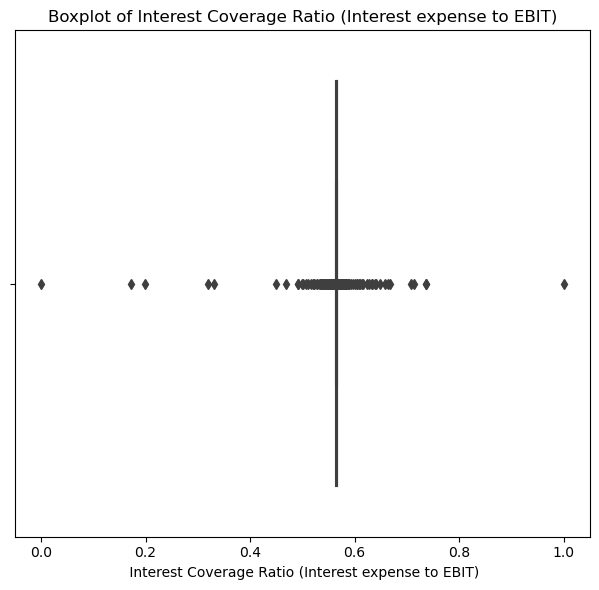

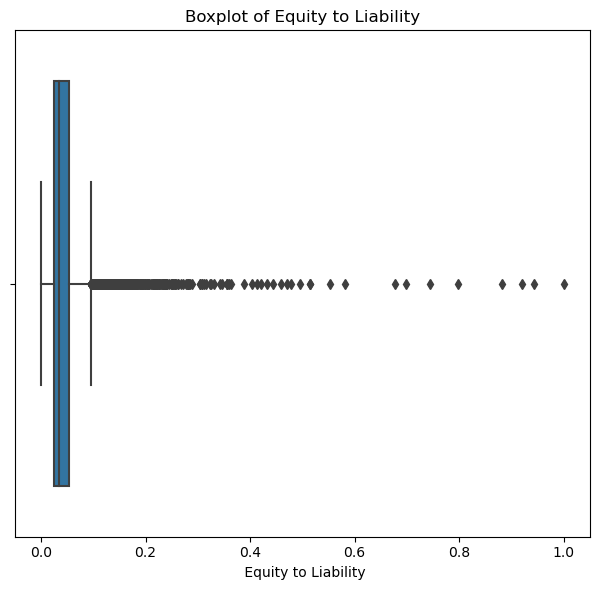

In [16]:
# BoxPlot to check the outliers in continuous data
for col in columns:
    plt.figure(figsize=(12,6))  
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col,data=new_df)
    plt.title(f'Boxplot of{col}')

    plt.tight_layout()
    plt.show()
 

In [17]:
#to handles outliers in data
def impute(x):
    Q3=new_df[x].quantile(0.75)
    Q1=new_df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-1.5*(IQR)
    ub=Q3+1.5*(IQR)
    idx=np.where(new_df[x]>ub)
    new_df[x].iloc[idx]=ub
    idx=np.where(new_df[x]<lb)
    new_df[x].iloc[idx]=lb

In [18]:
#imput function call and passing the columns to handle outliers
for col in columns:
    impute(col)


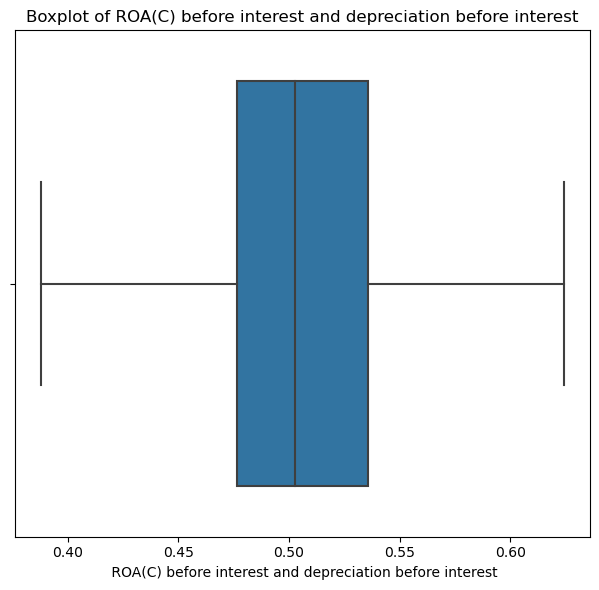

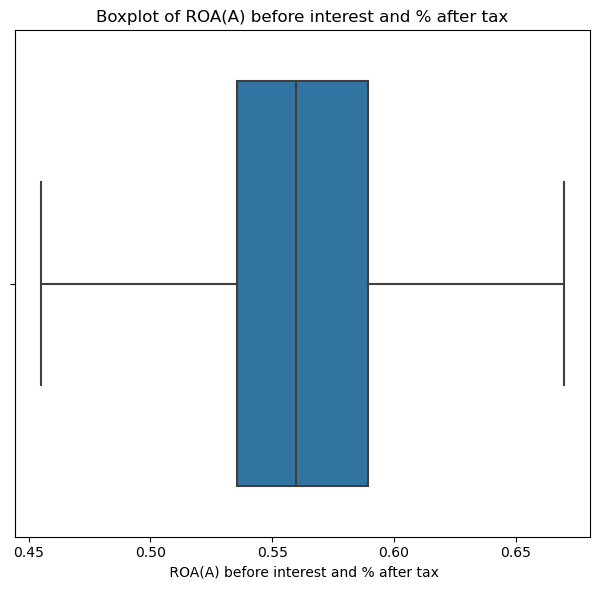

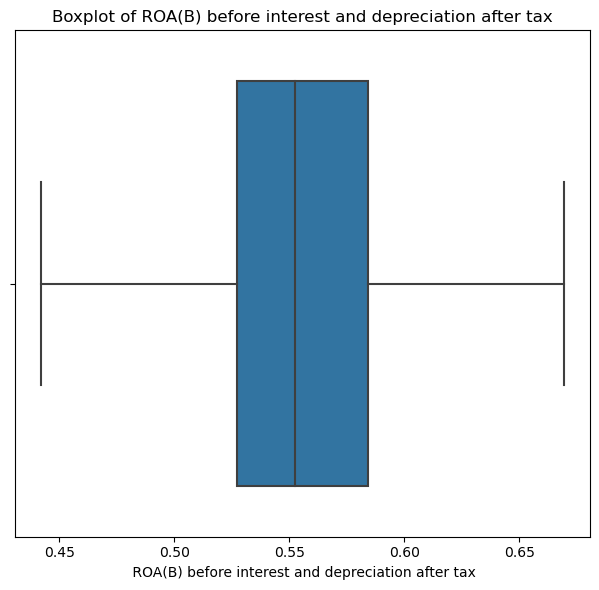

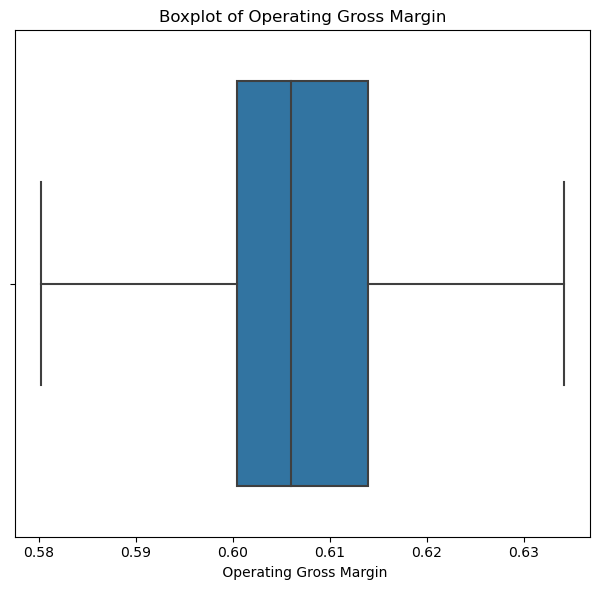

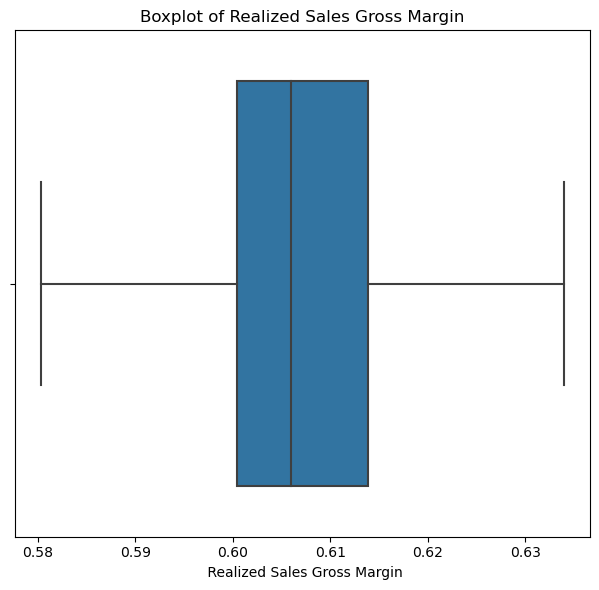

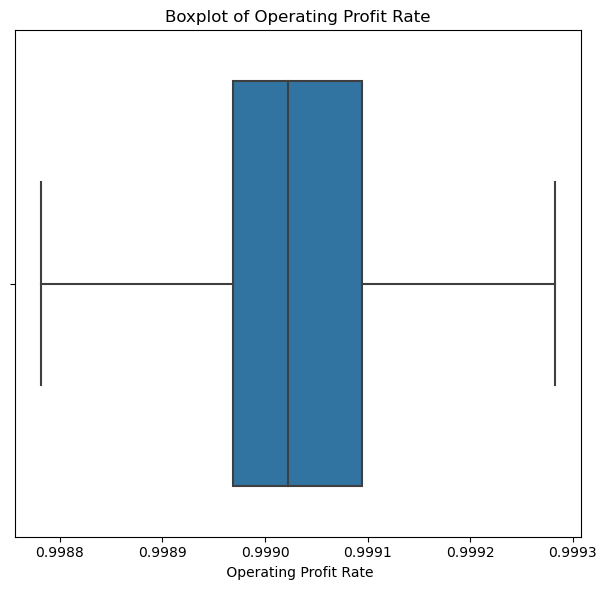

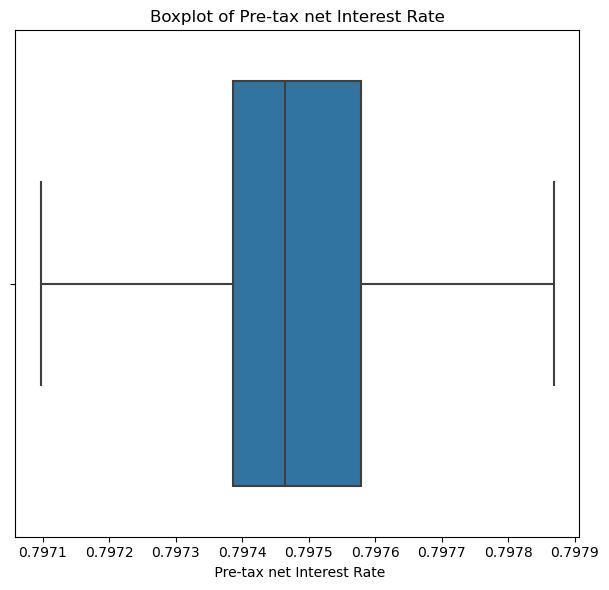

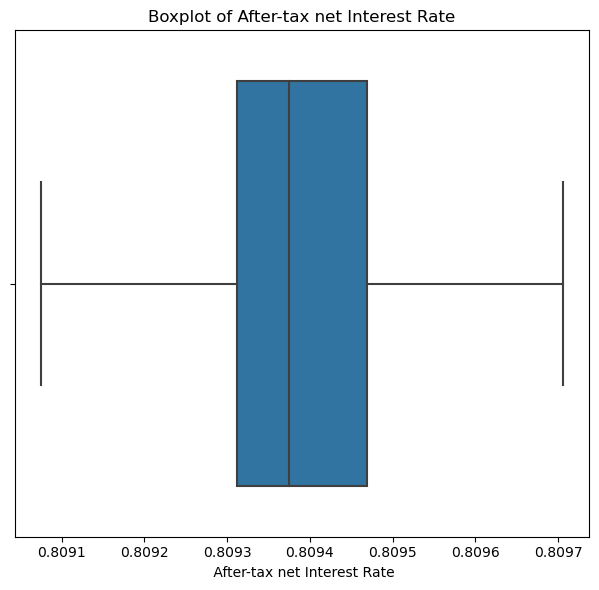

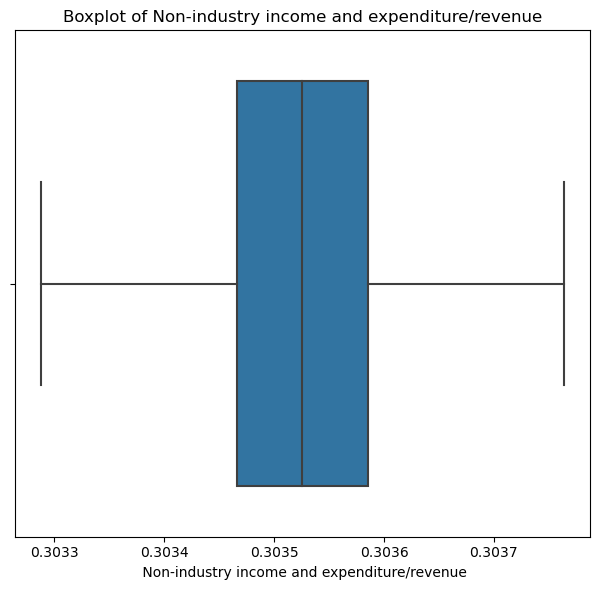

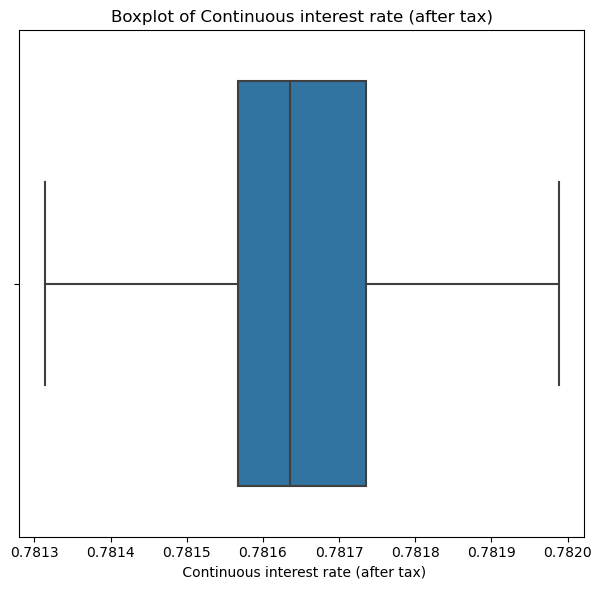

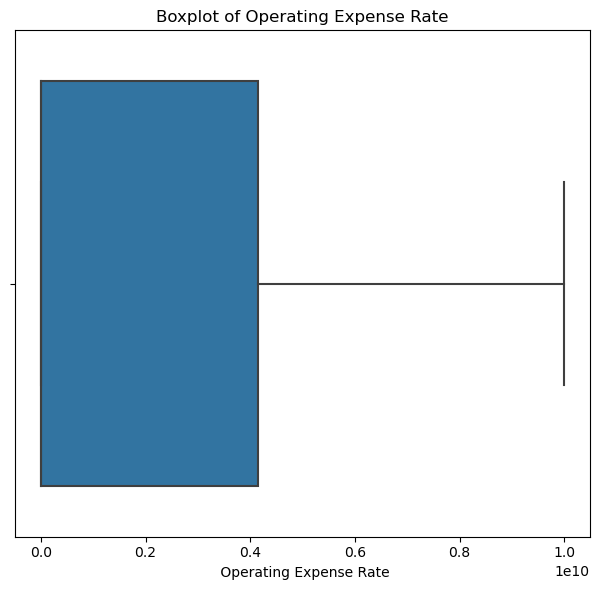

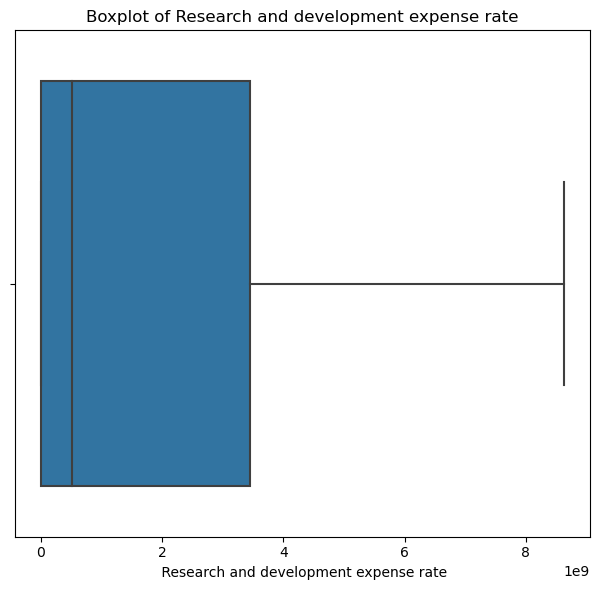

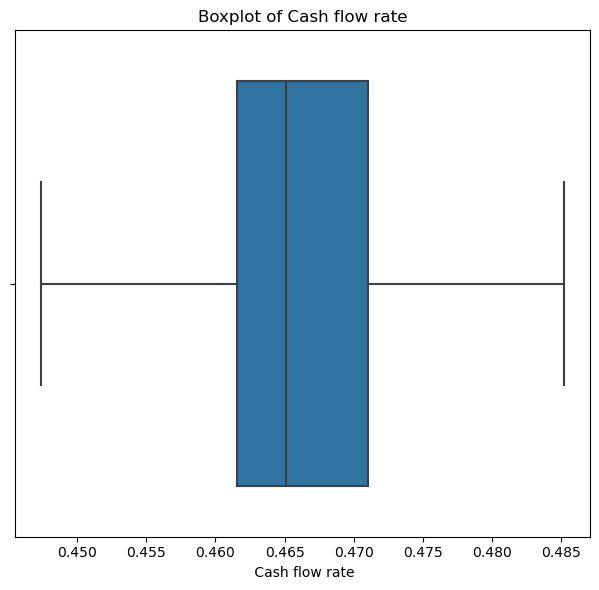

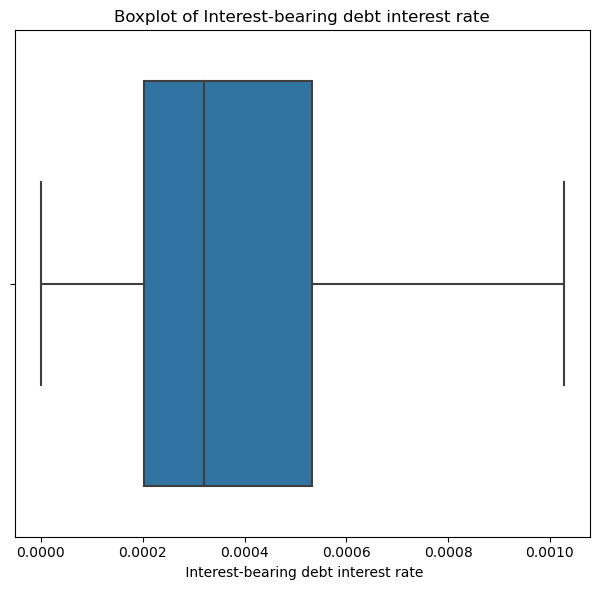

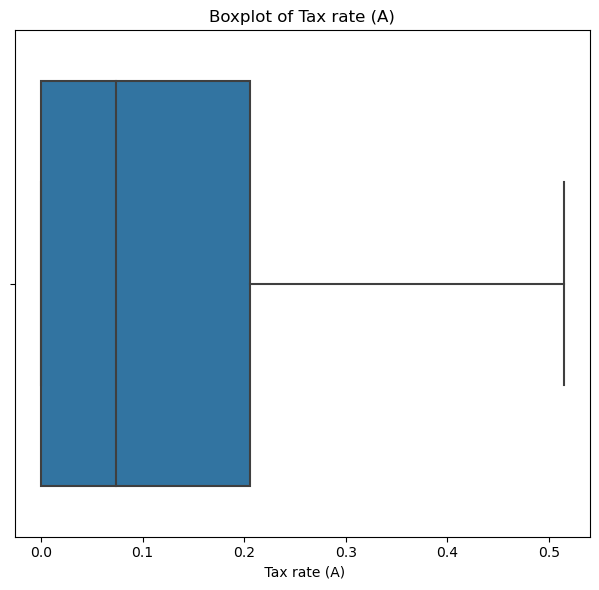

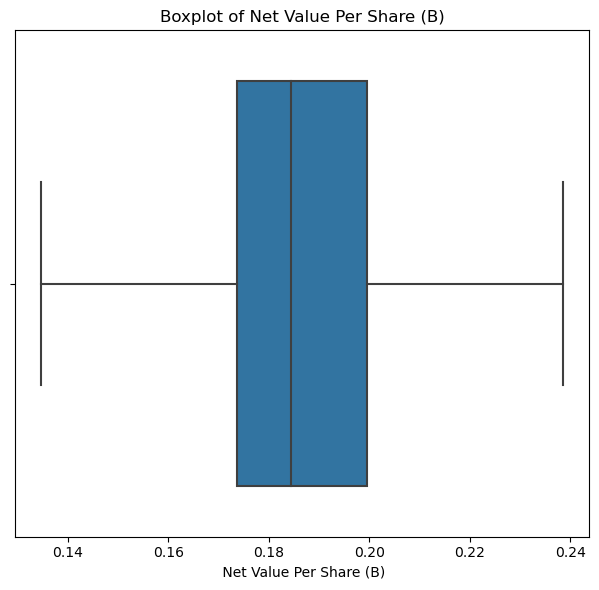

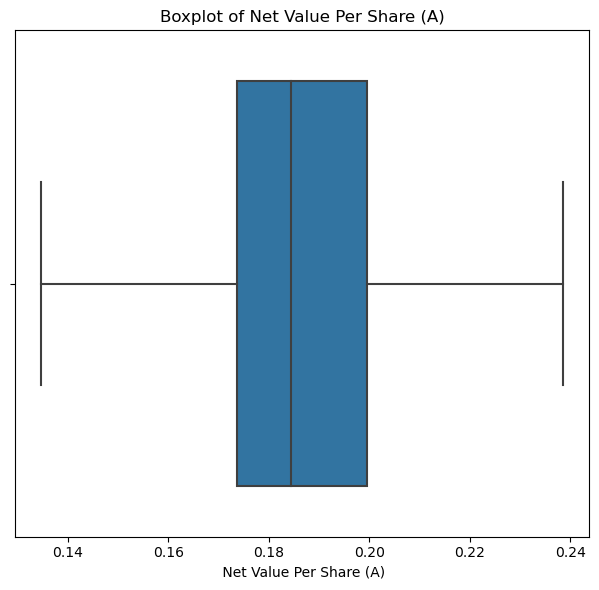

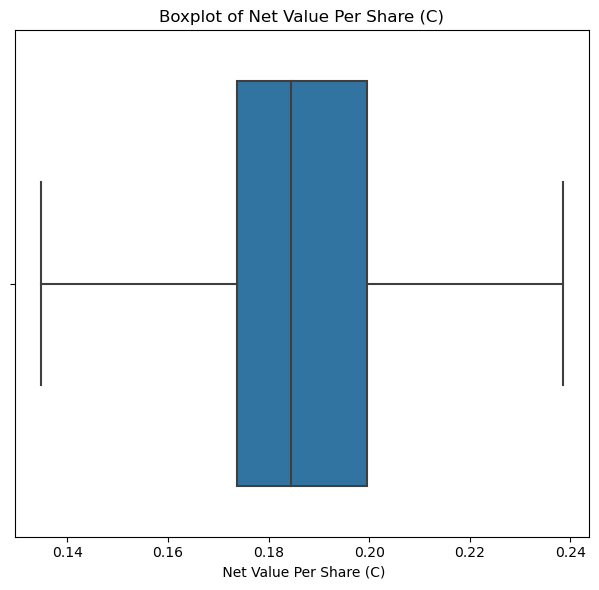

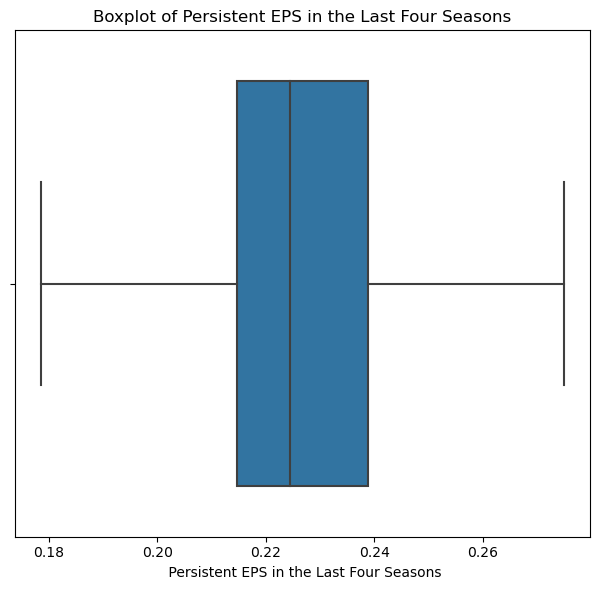

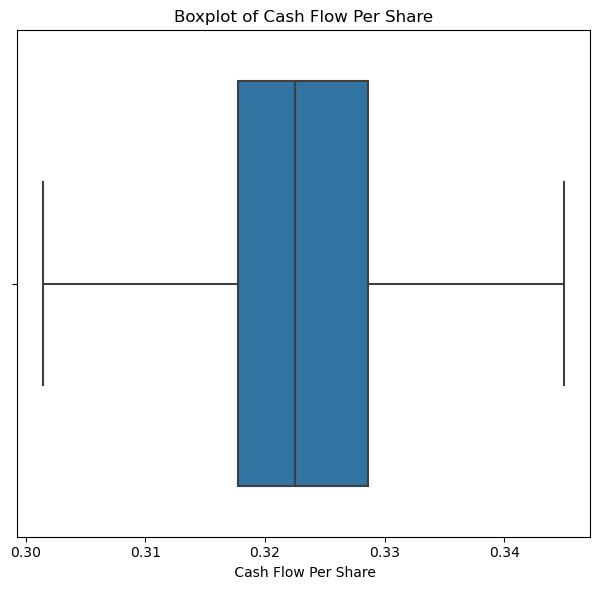

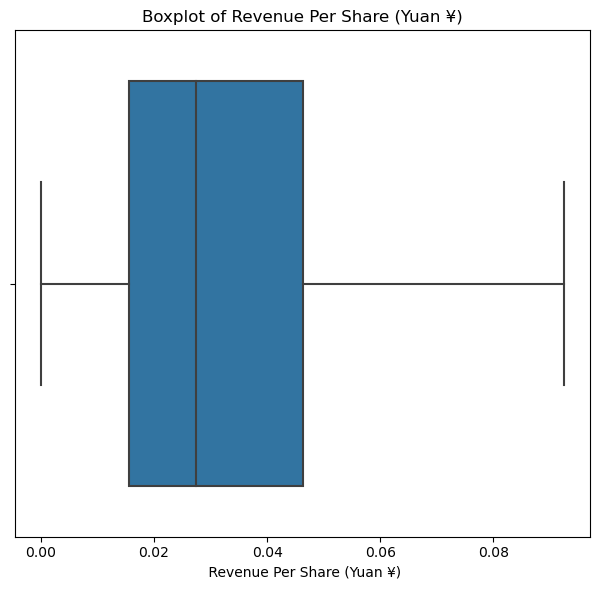

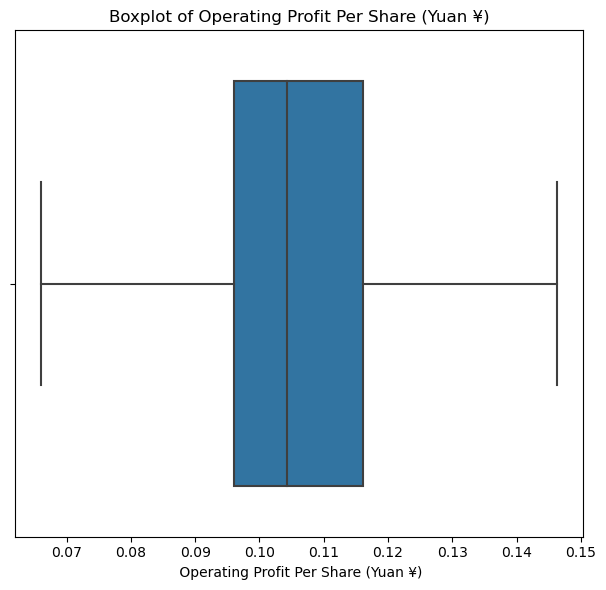

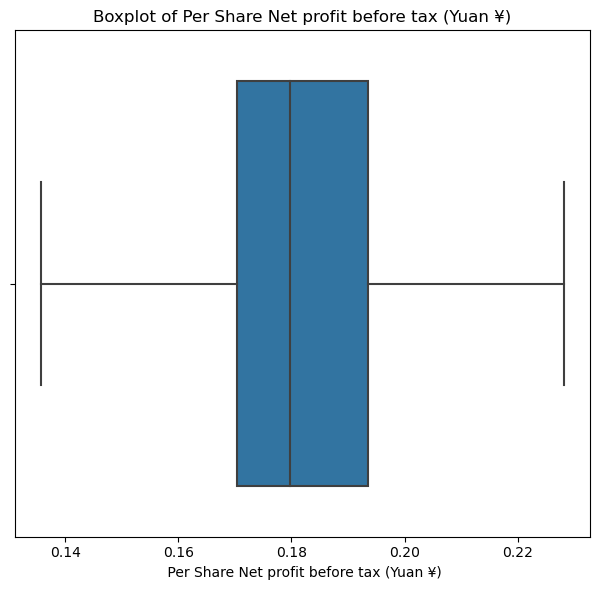

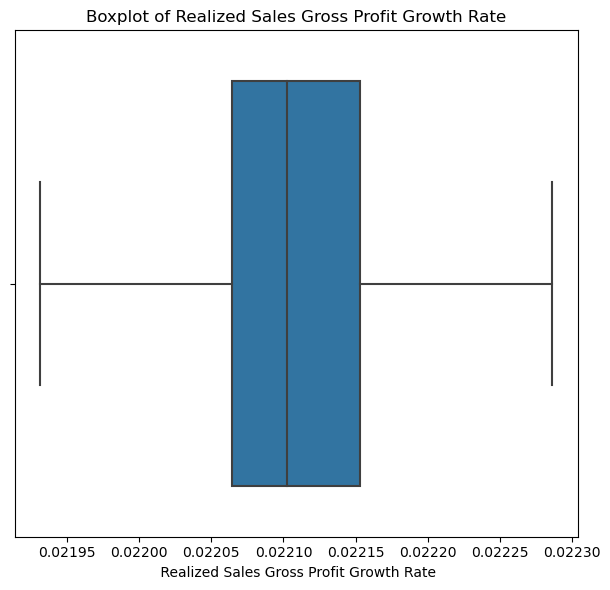

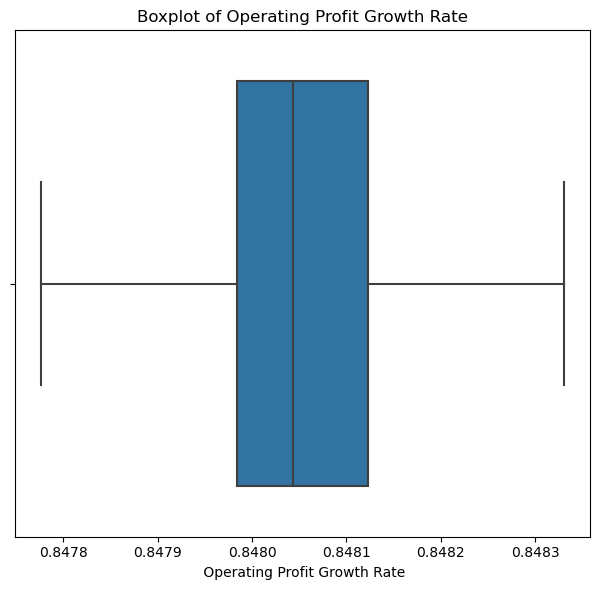

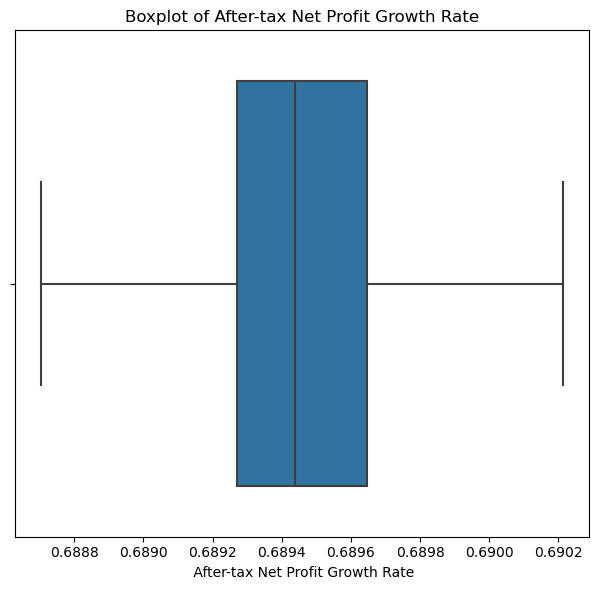

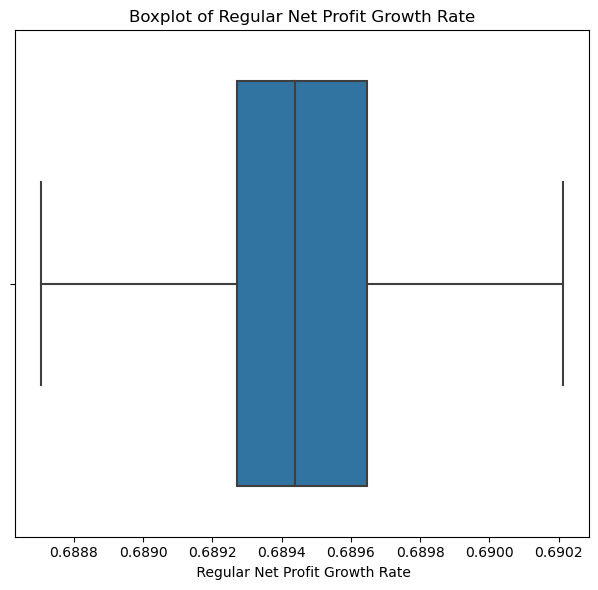

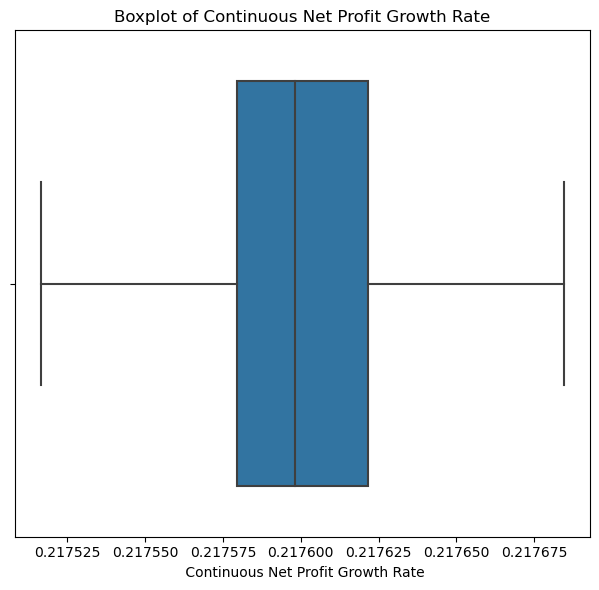

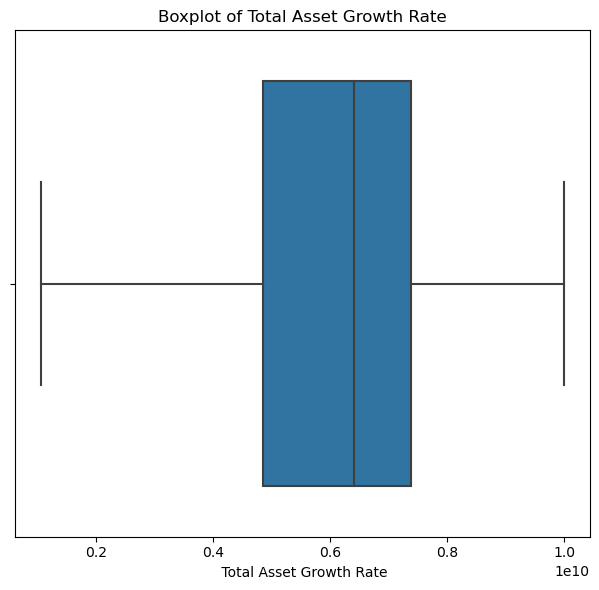

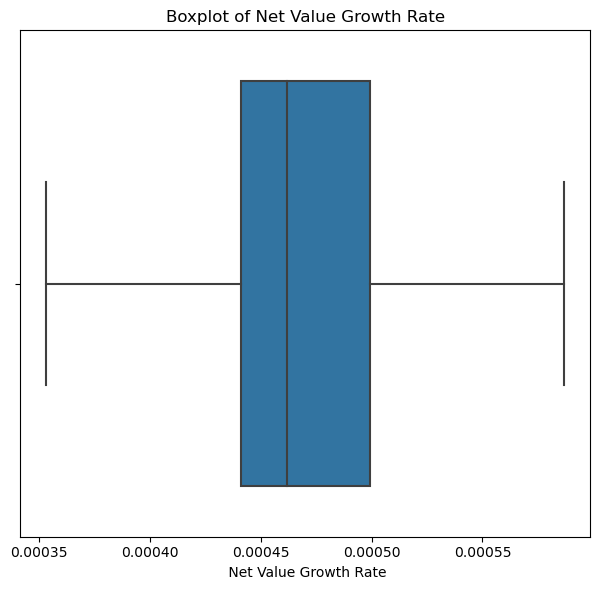

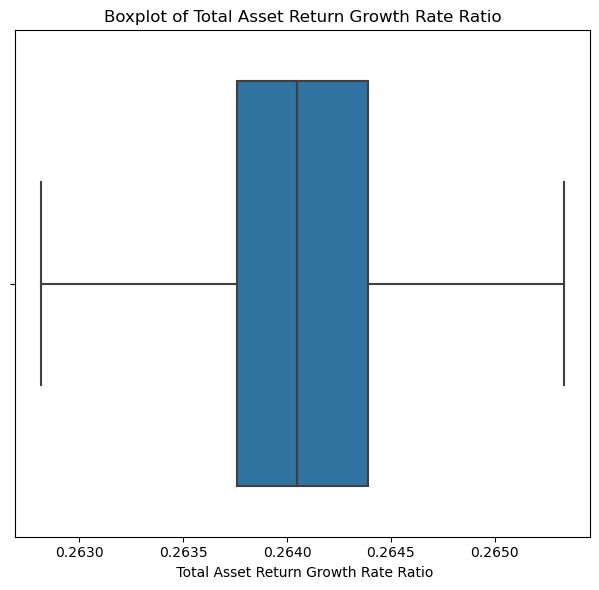

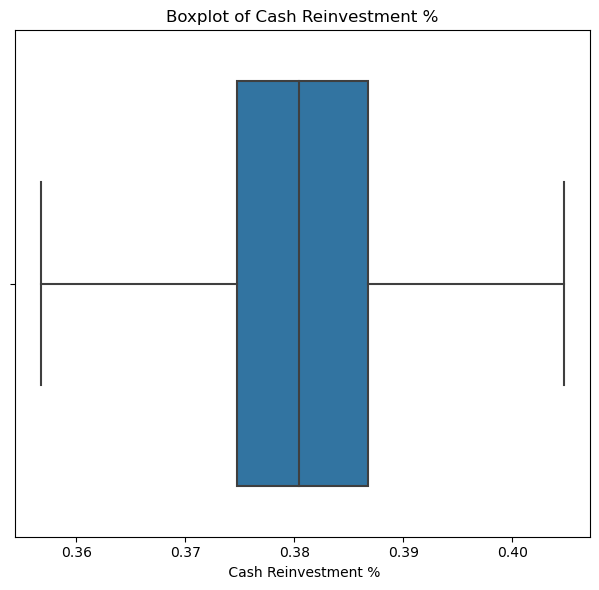

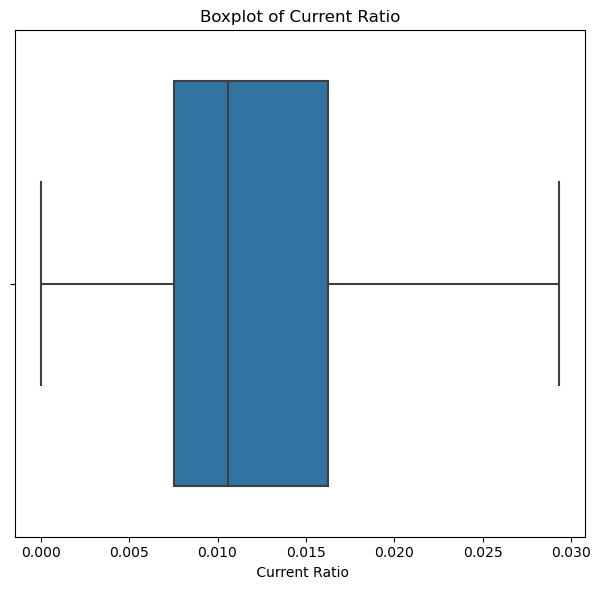

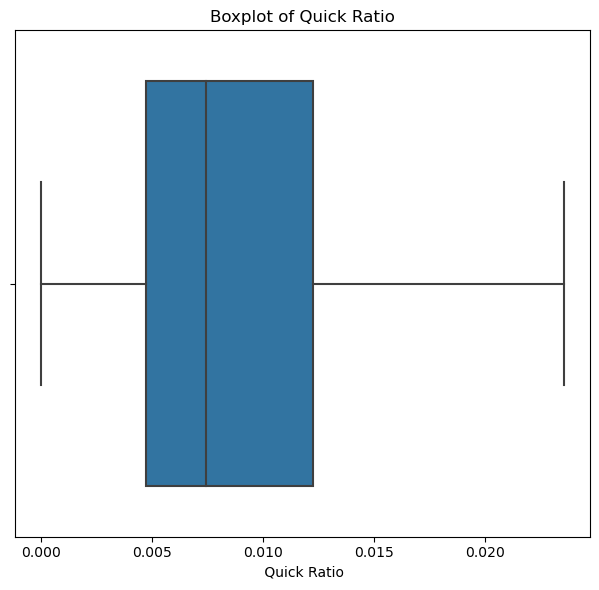

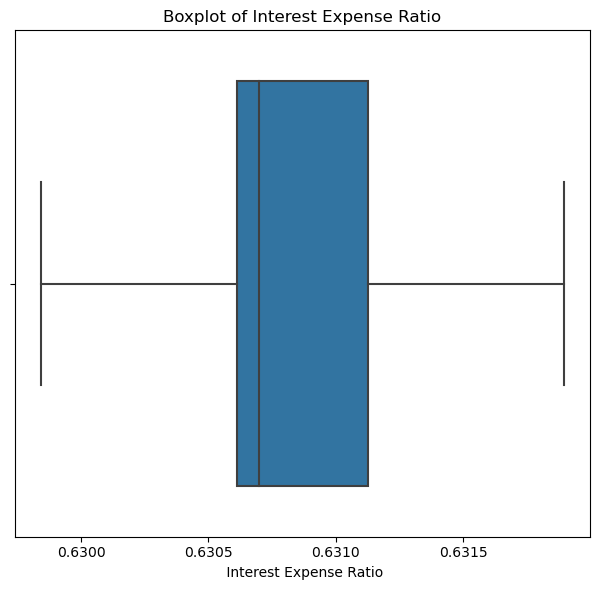

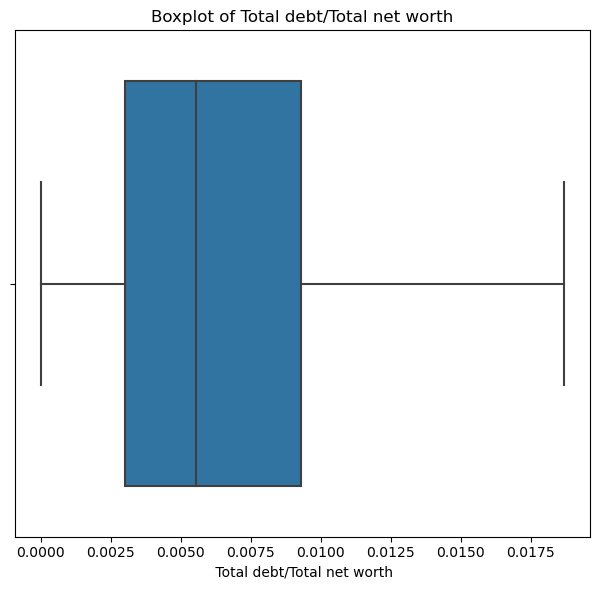

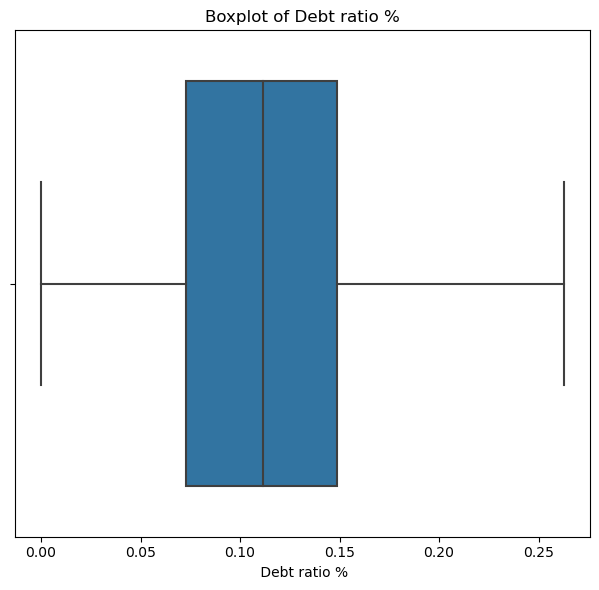

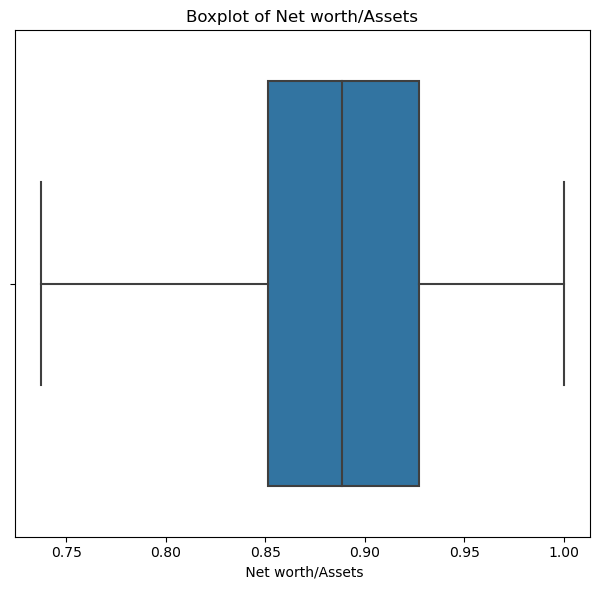

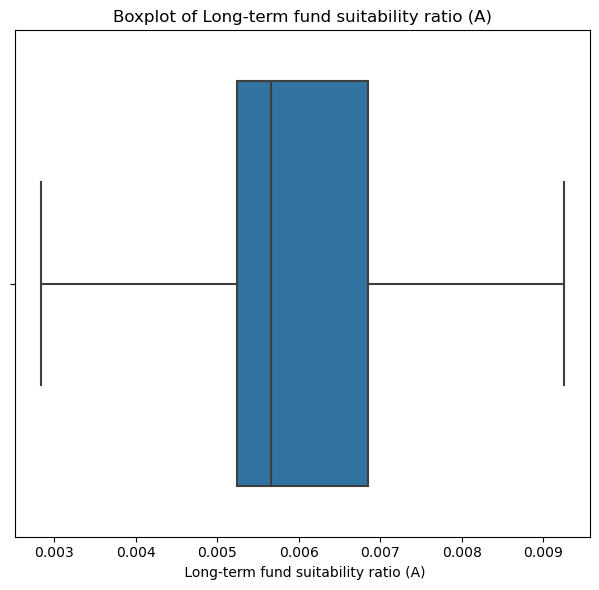

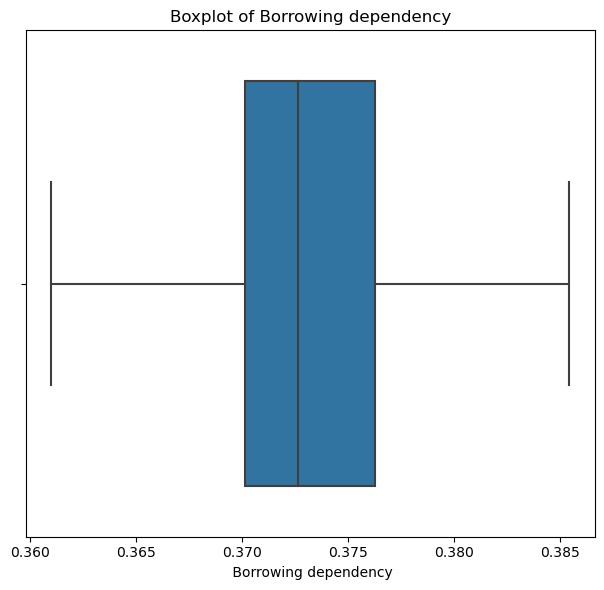

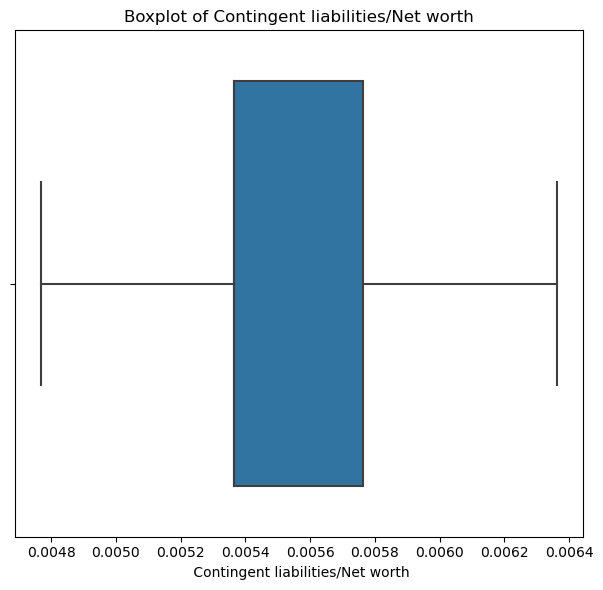

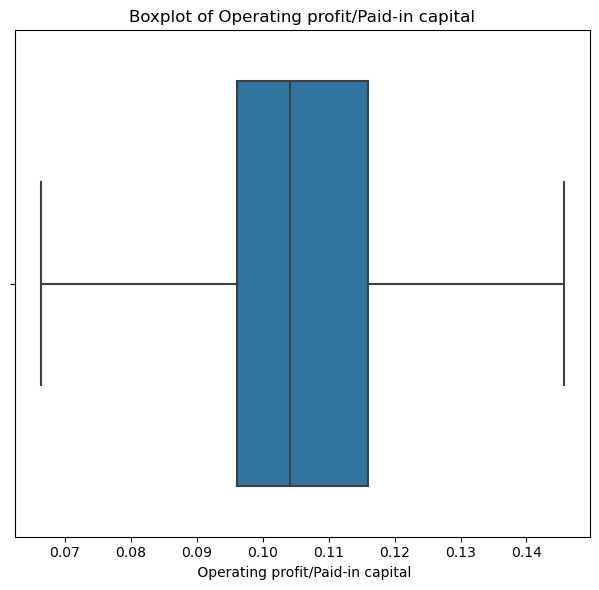

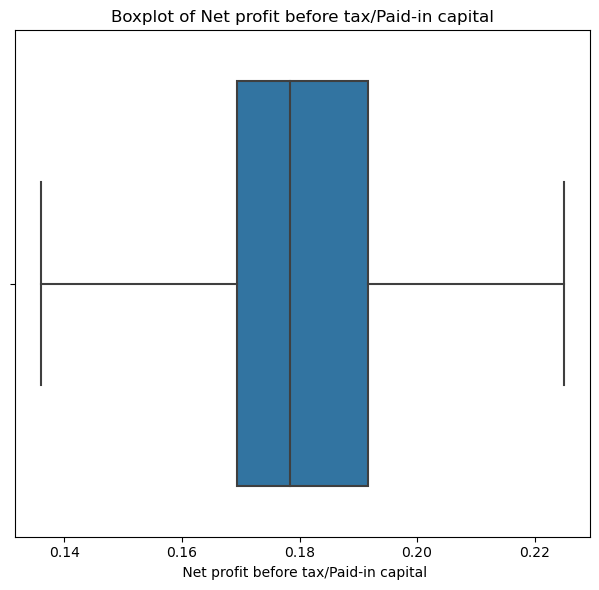

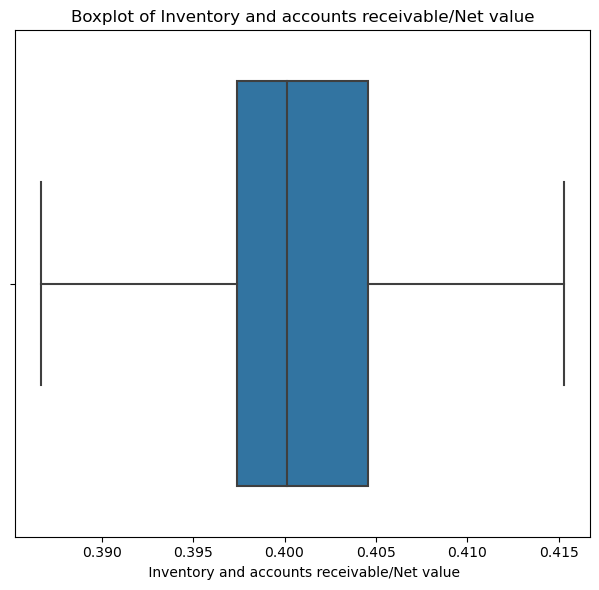

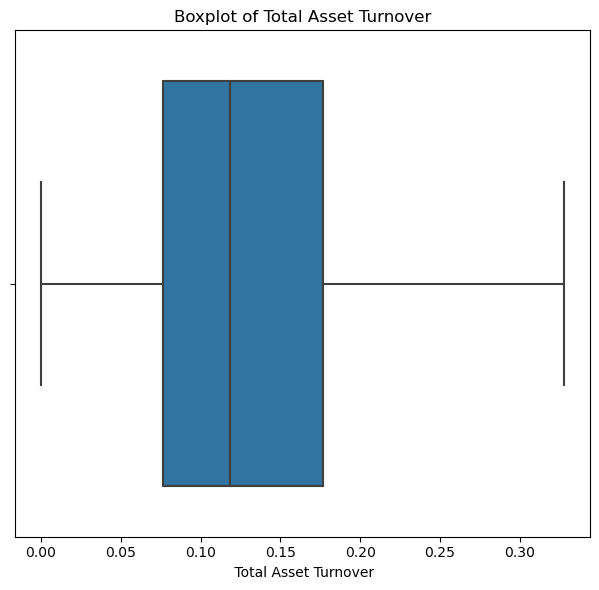

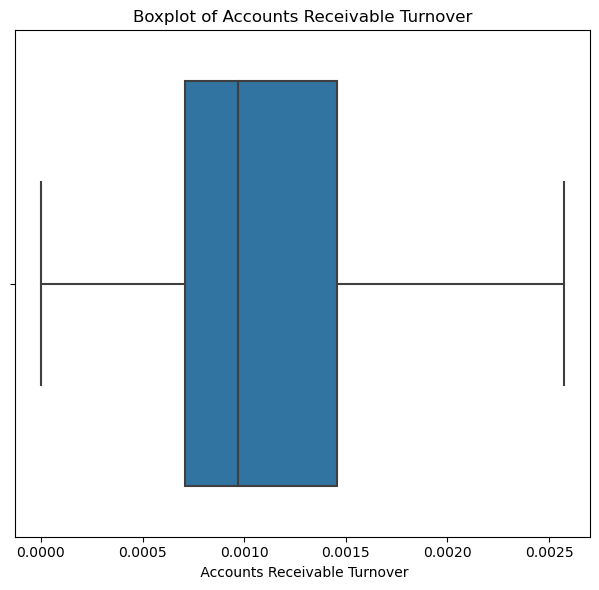

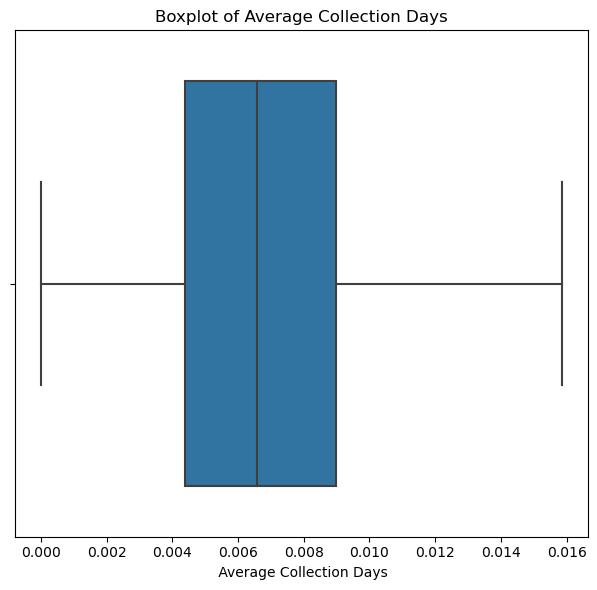

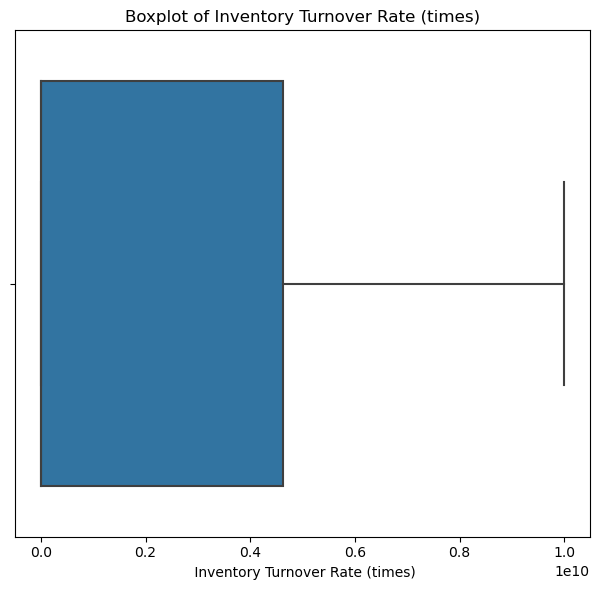

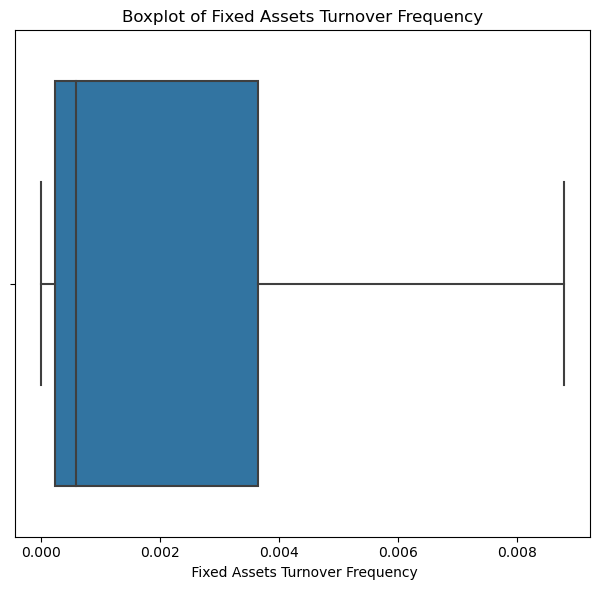

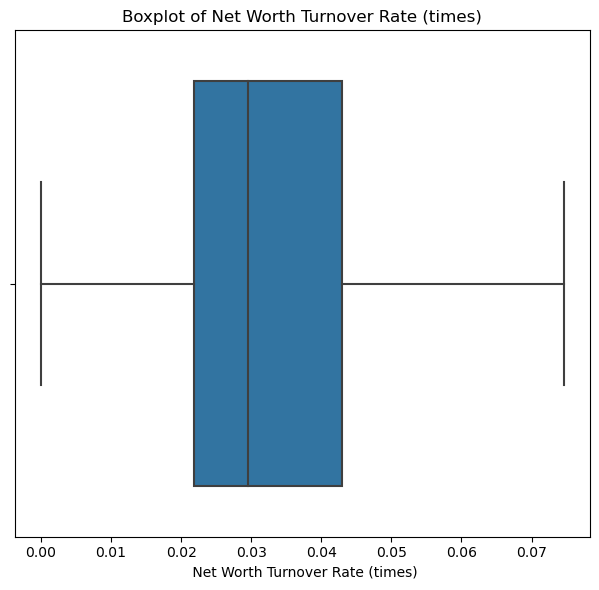

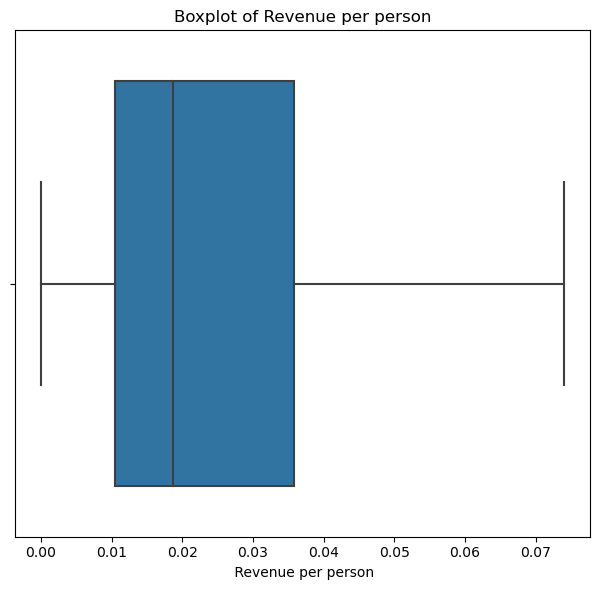

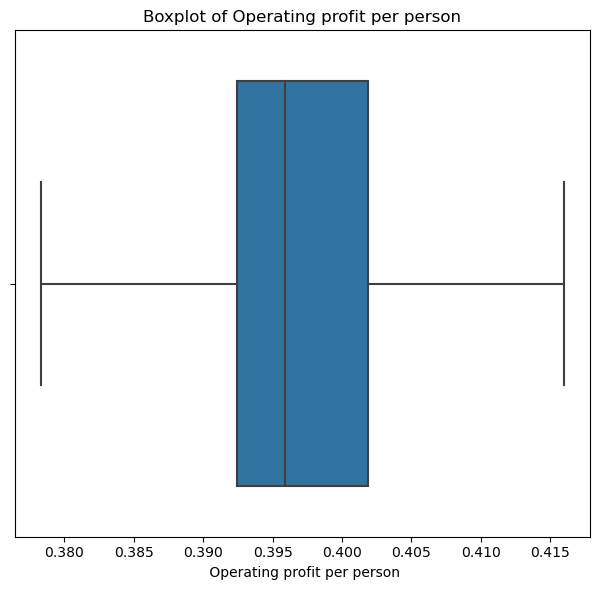

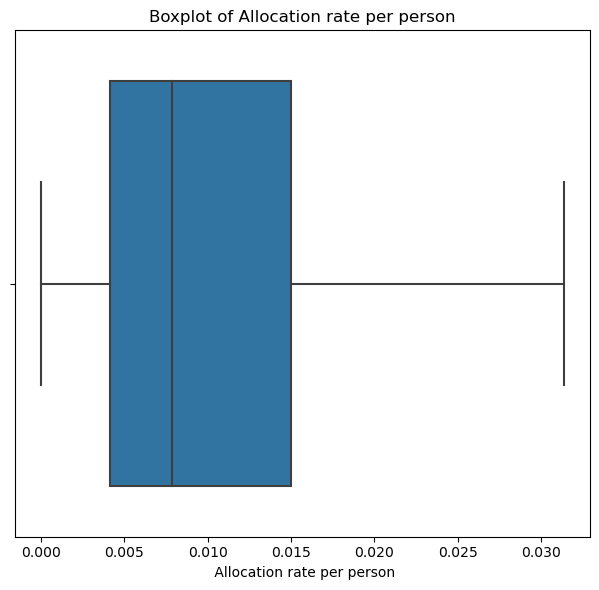

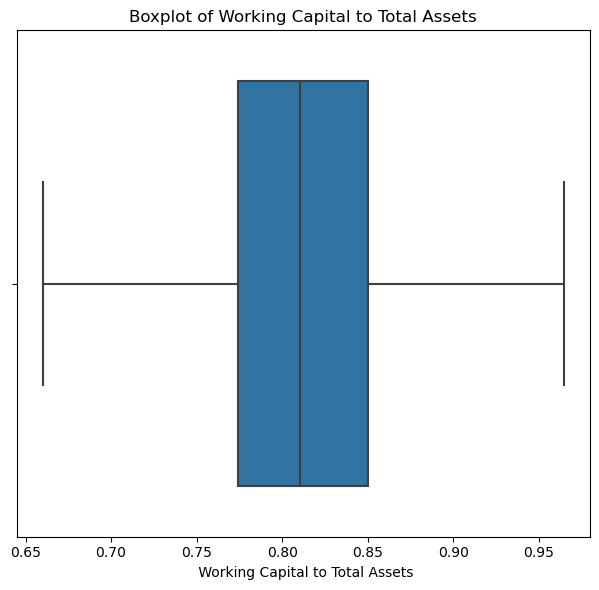

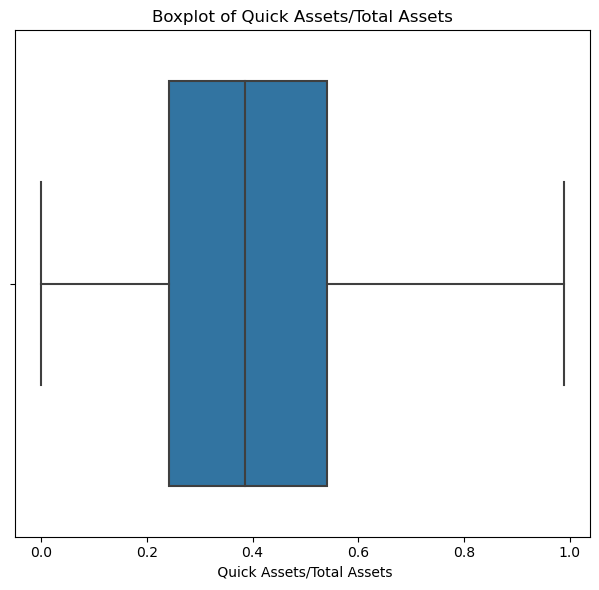

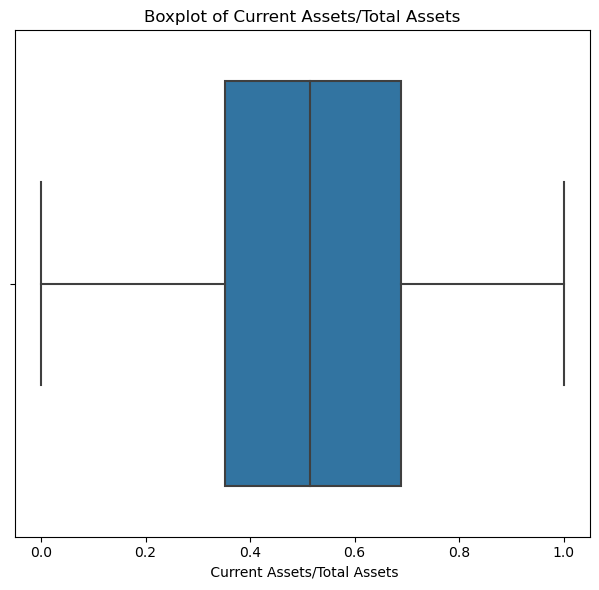

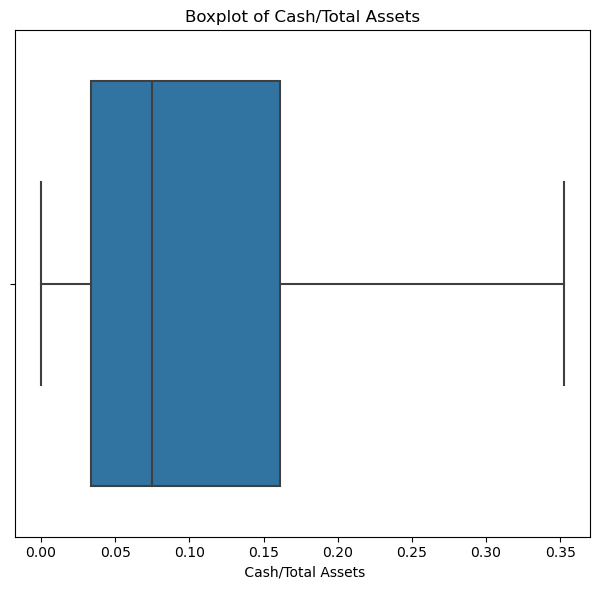

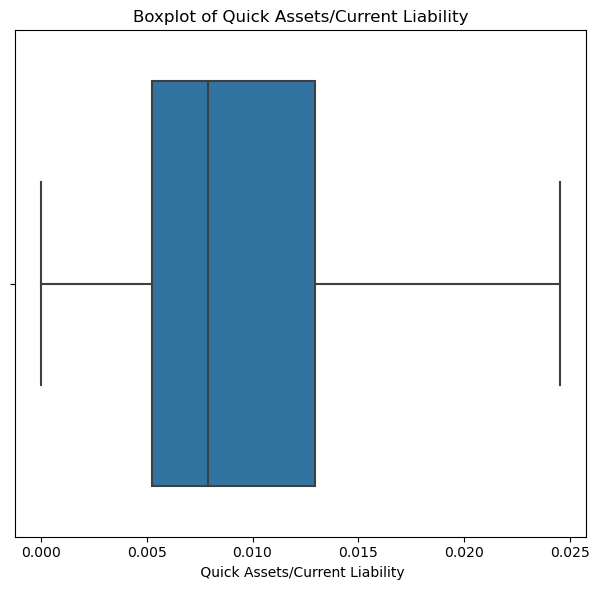

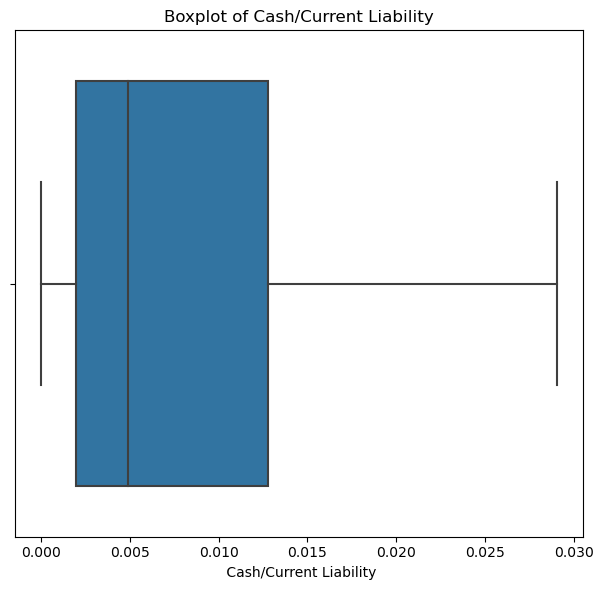

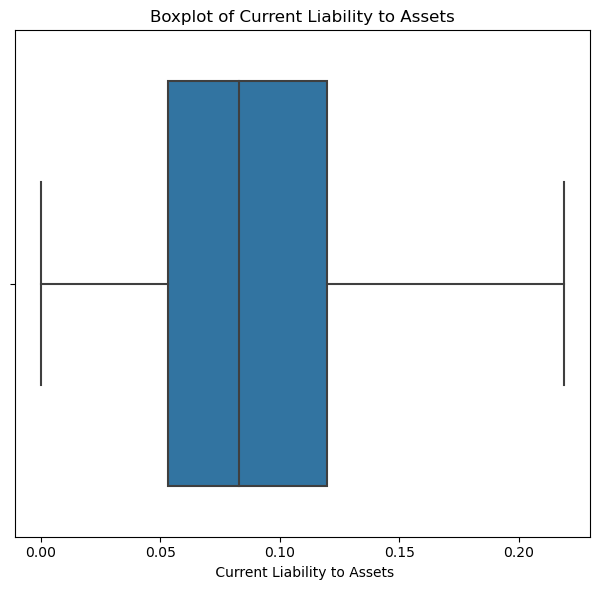

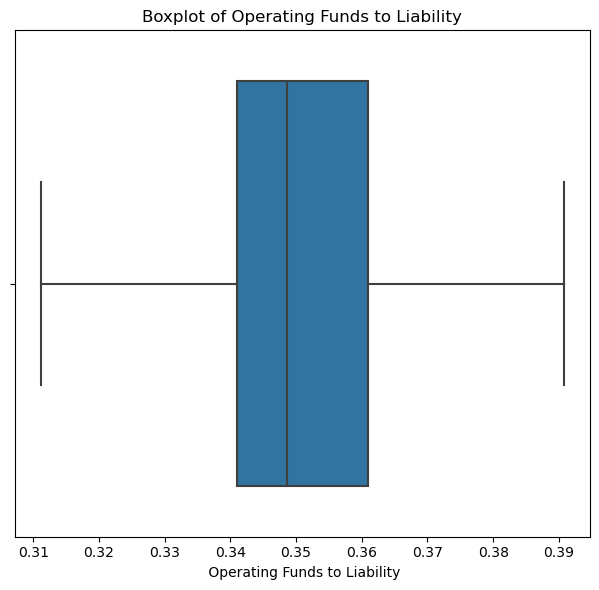

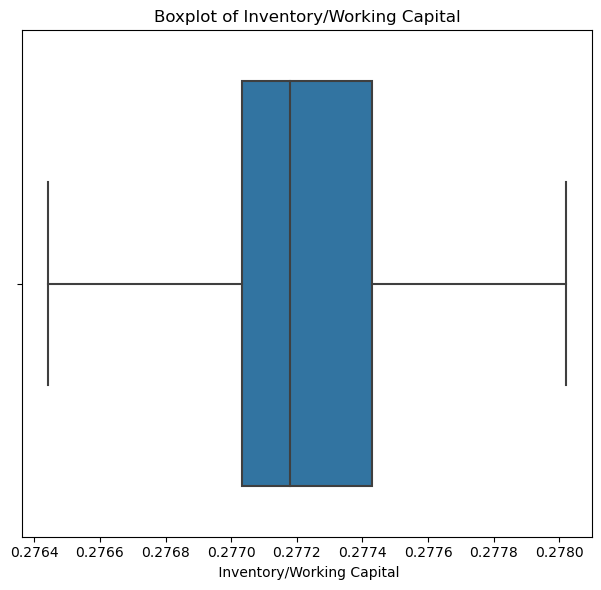

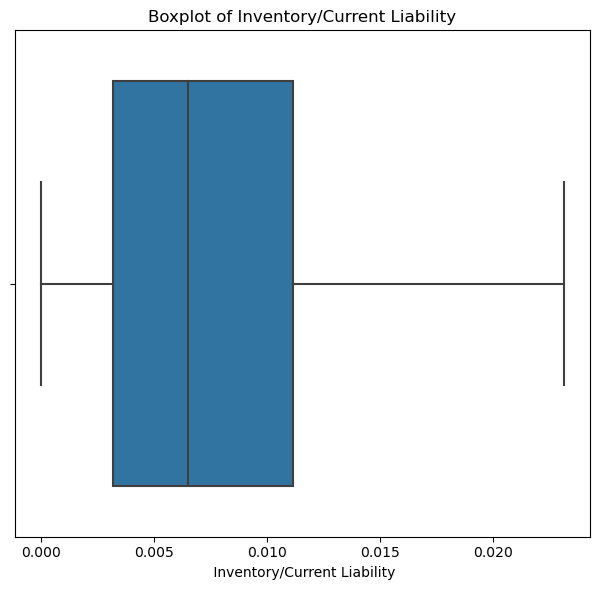

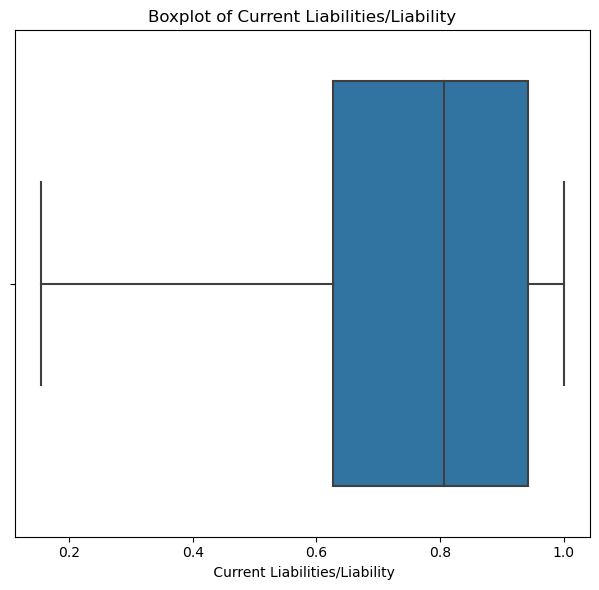

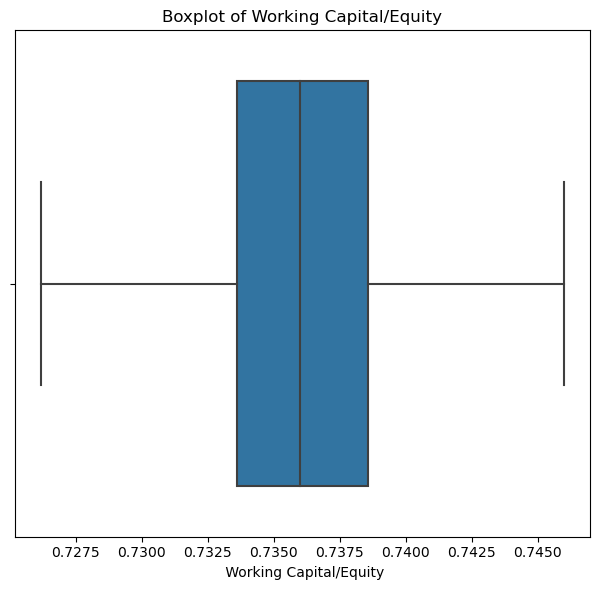

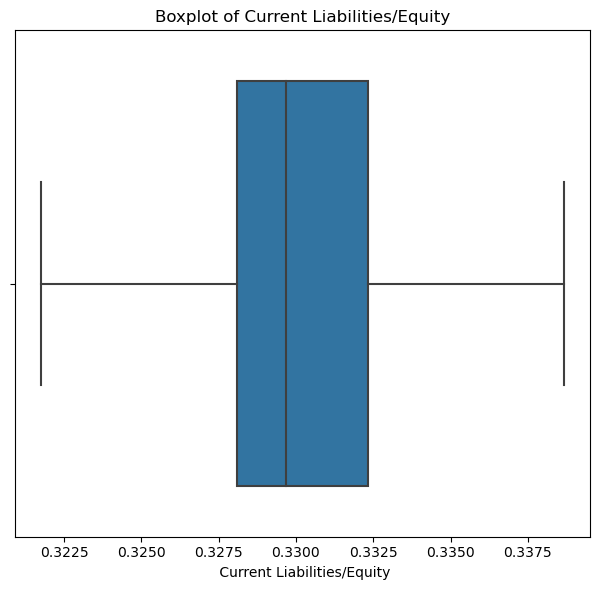

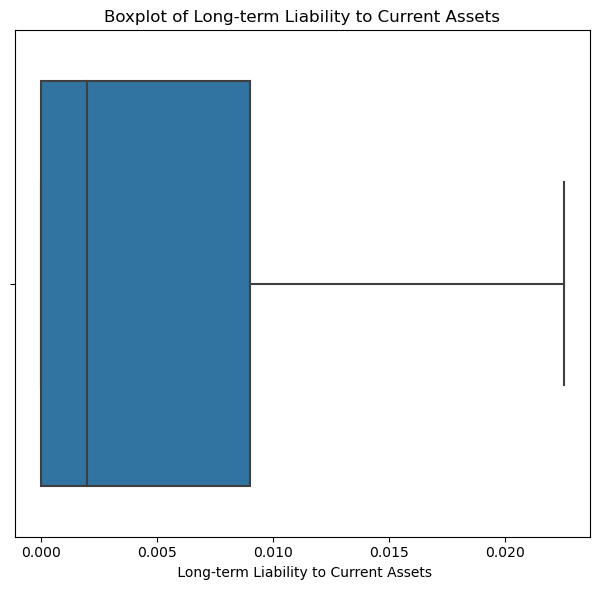

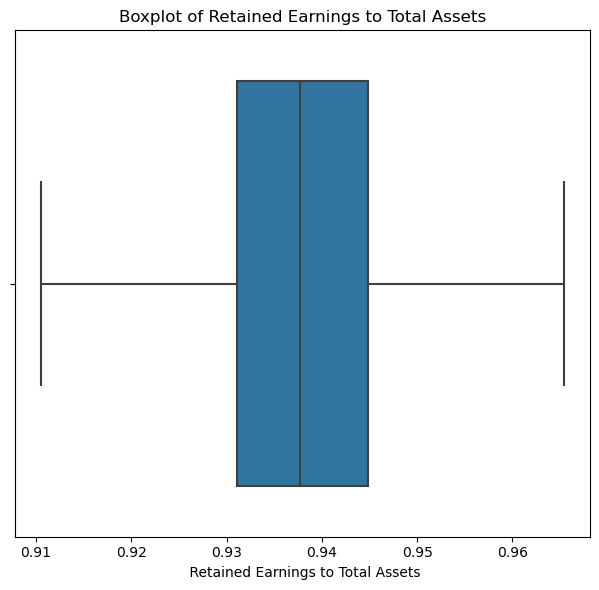

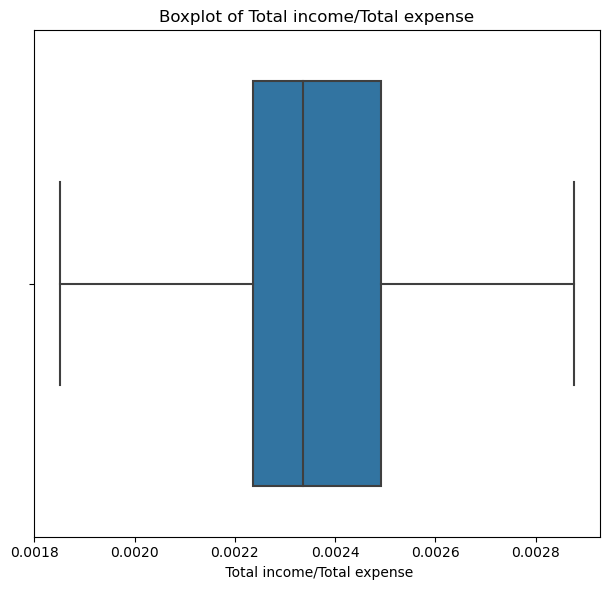

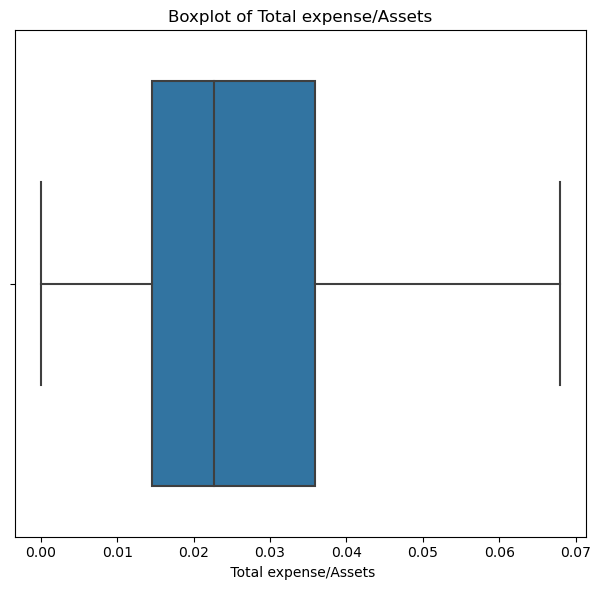

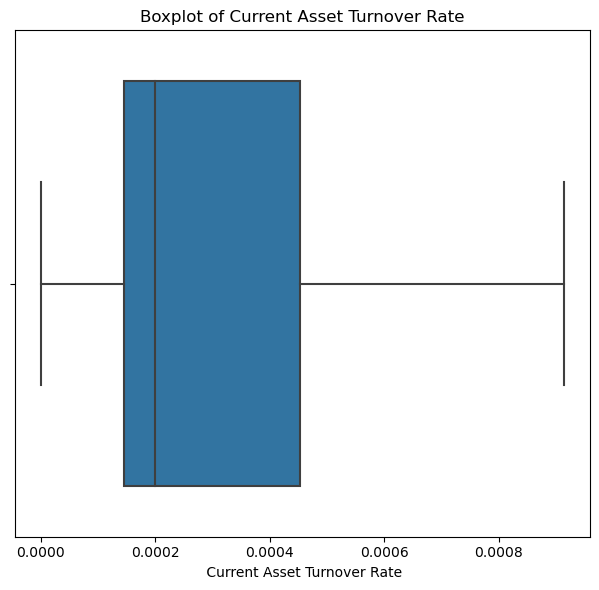

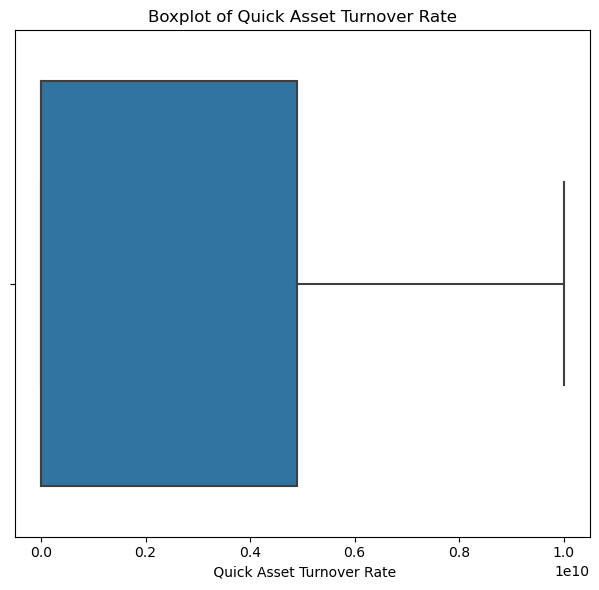

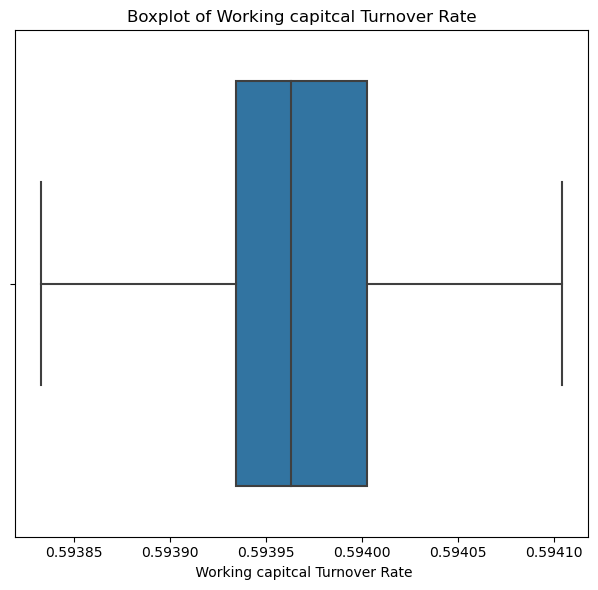

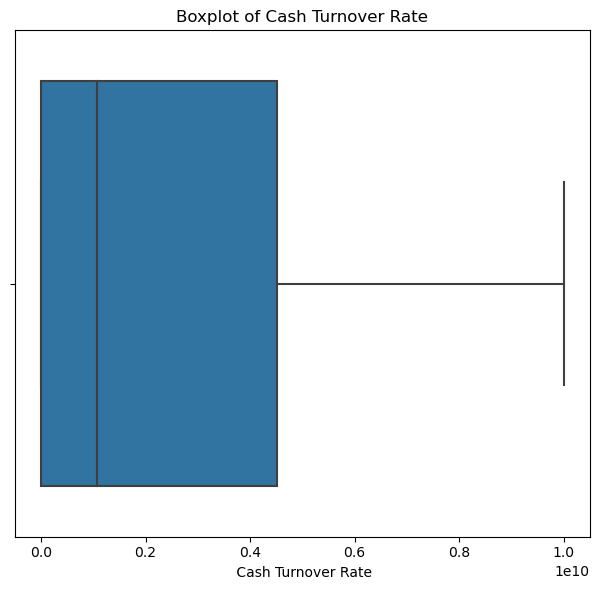

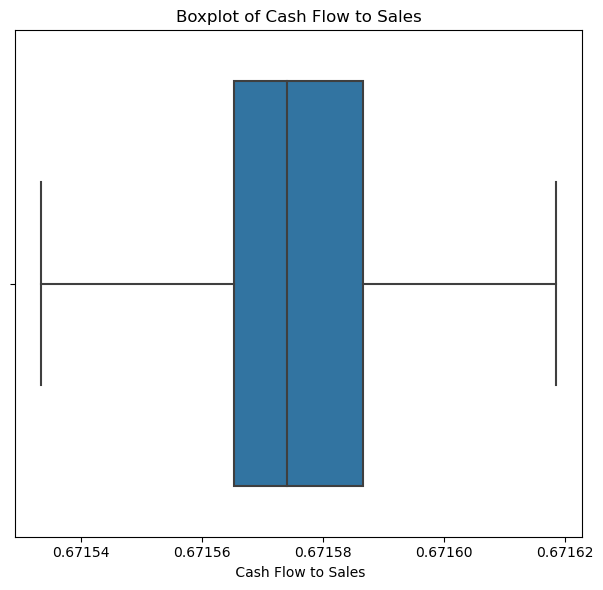

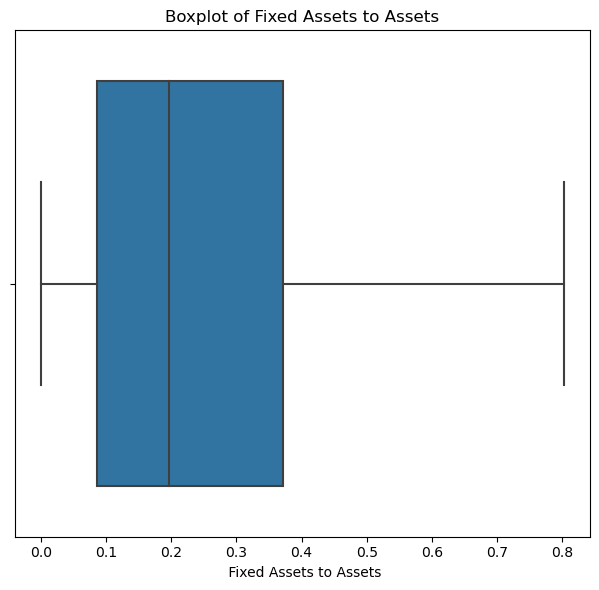

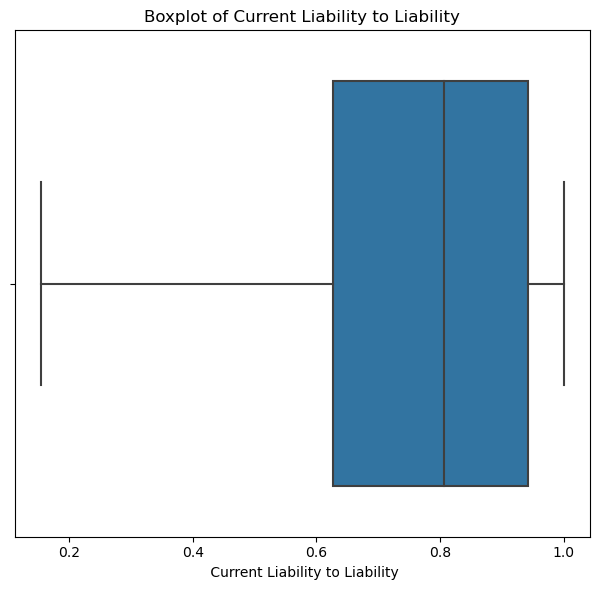

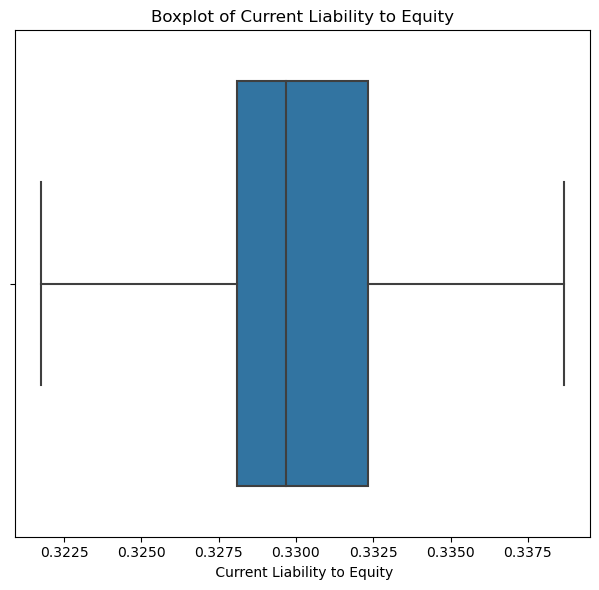

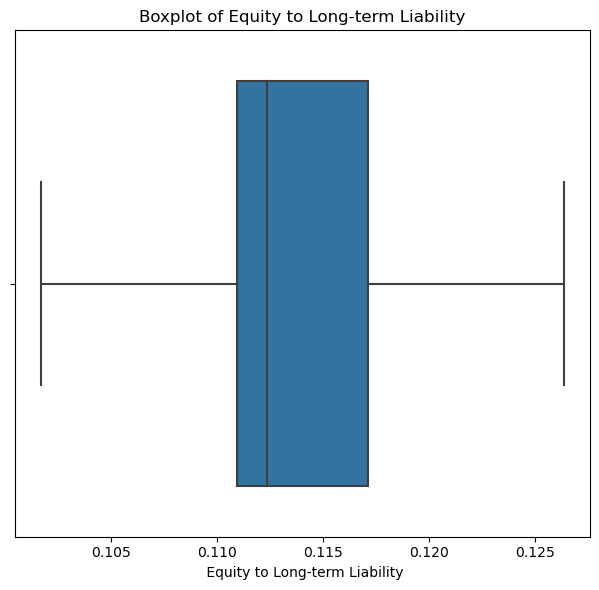

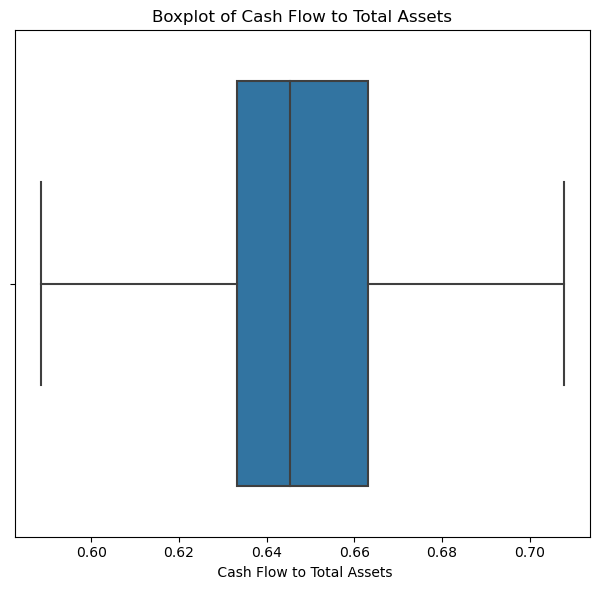

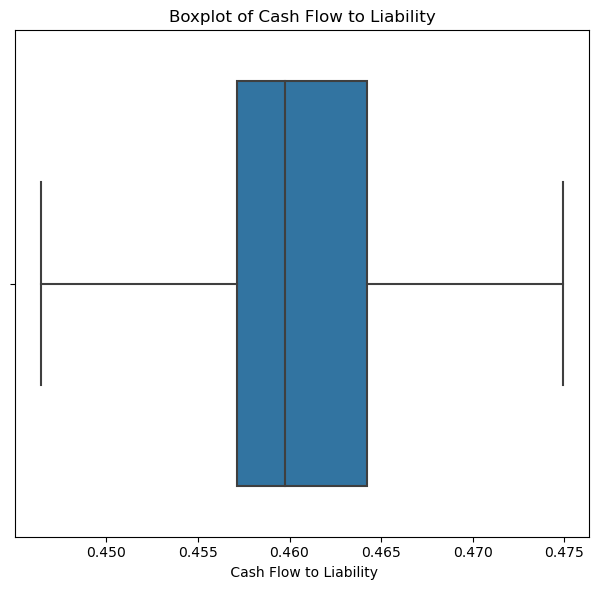

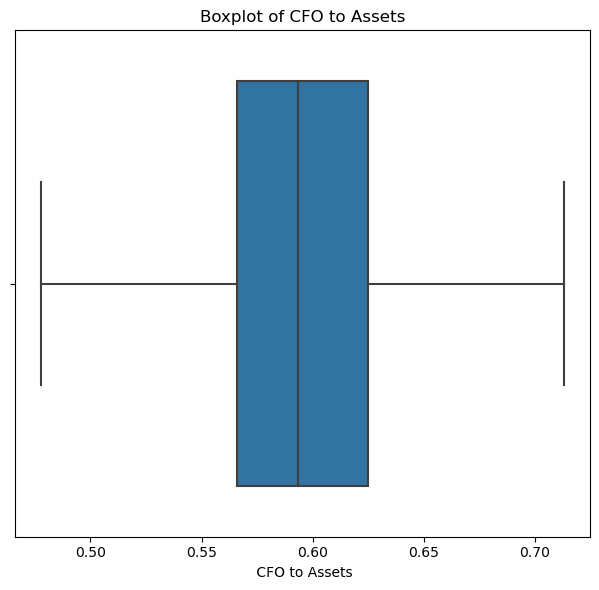

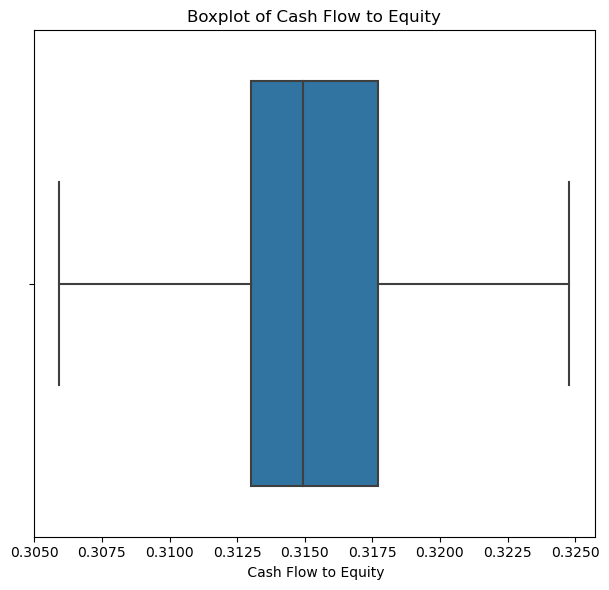

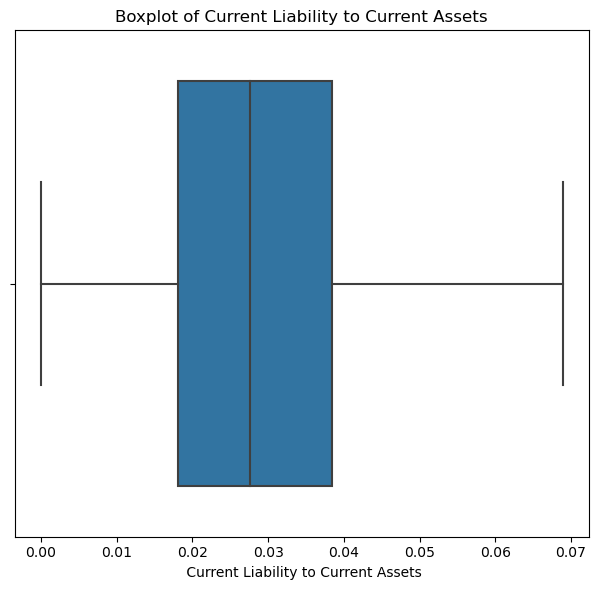

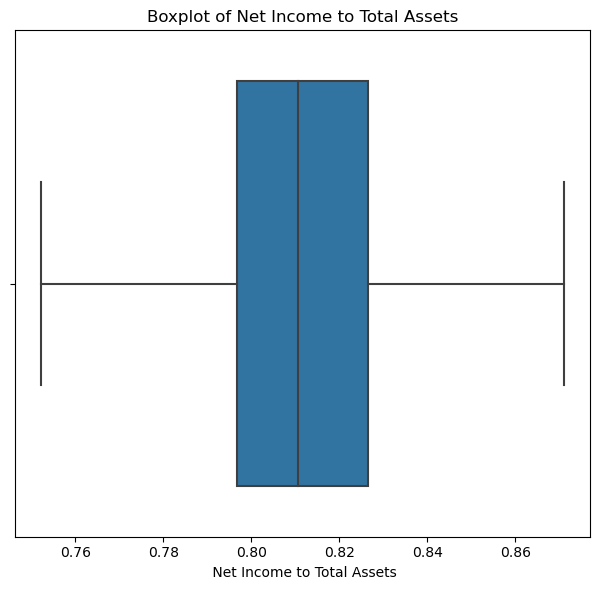

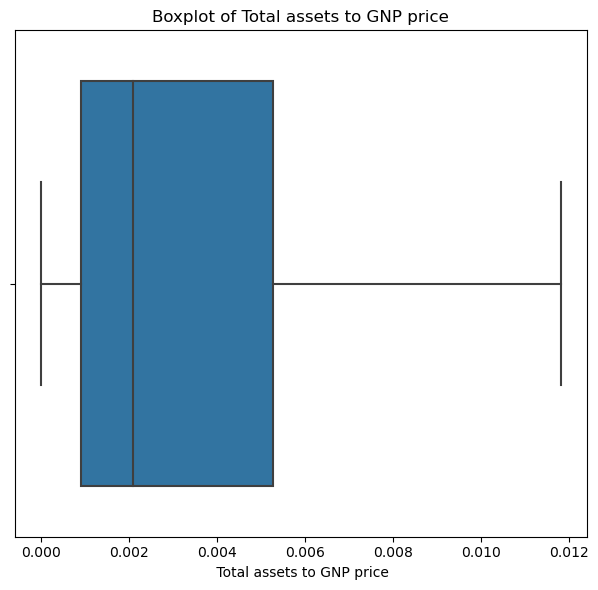

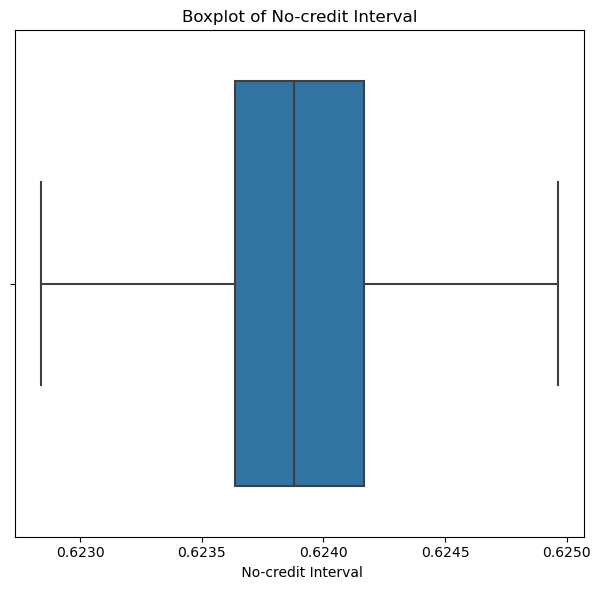

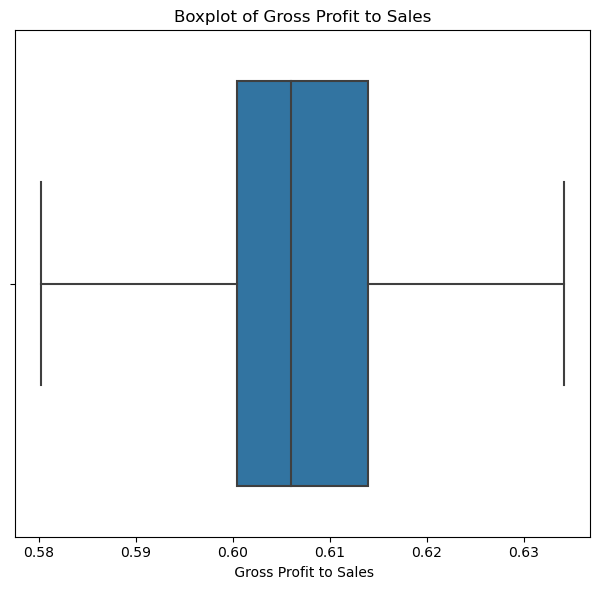

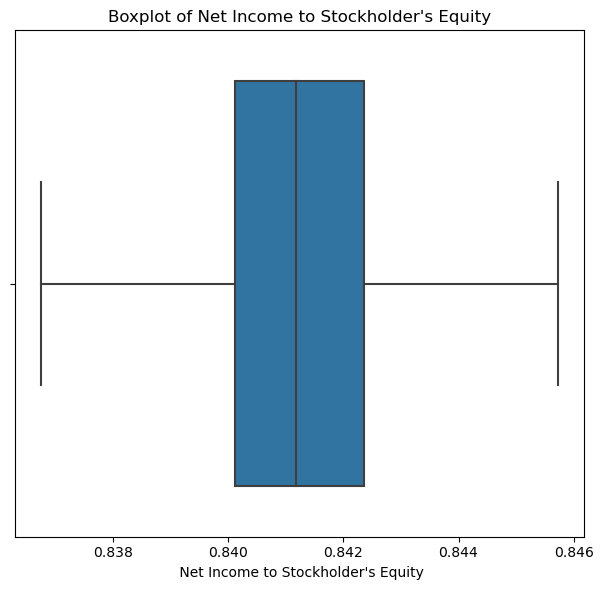

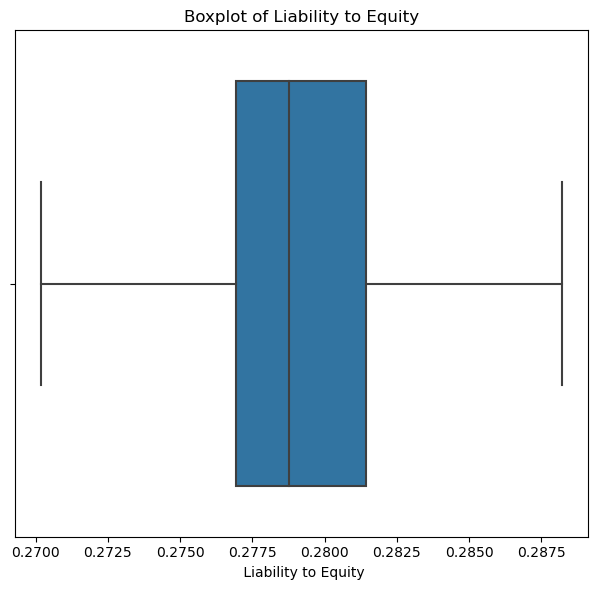

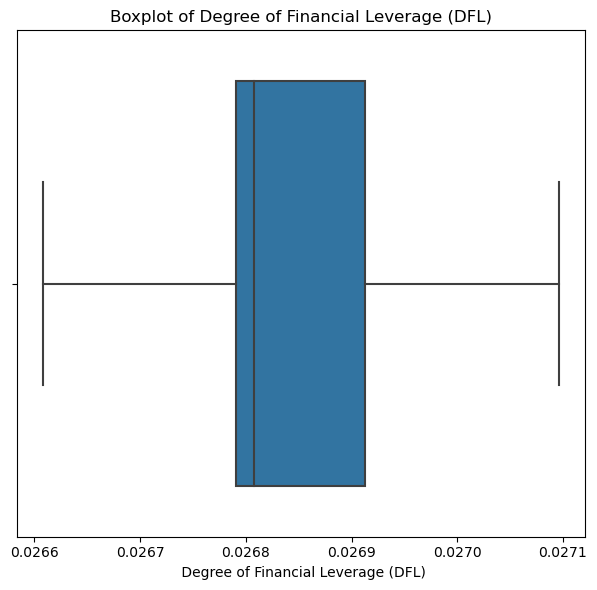

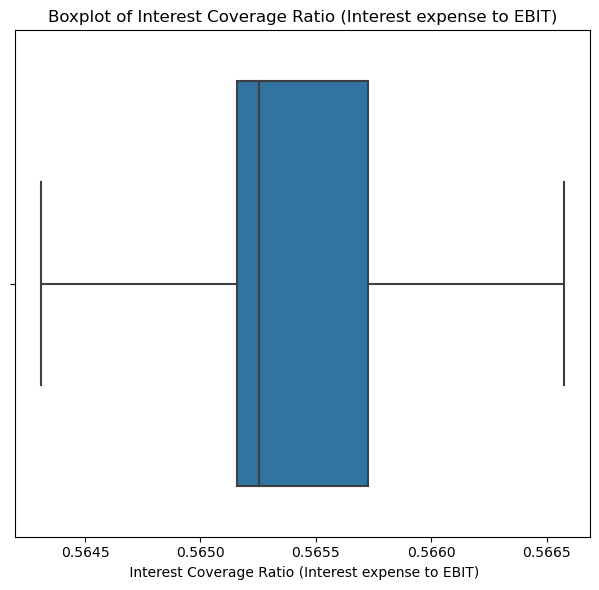

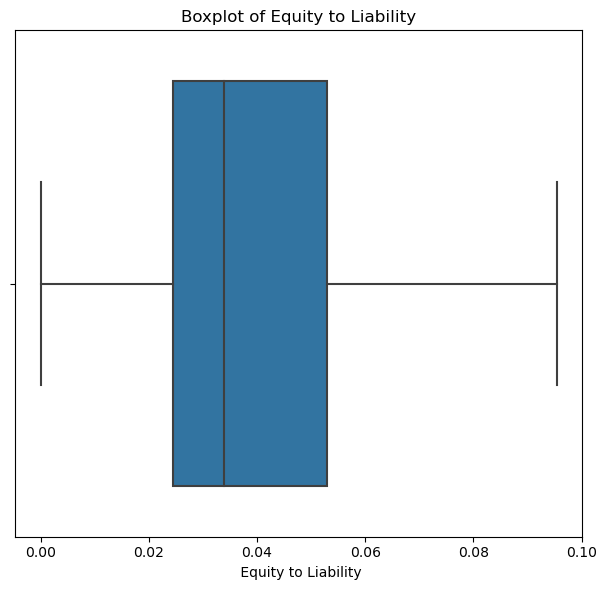

In [19]:
#show handled outliers
for col in columns:
    plt.figure(figsize=(12,6))  
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col,data=new_df)
    plt.title(f'Boxplot of{col}')

    plt.tight_layout()
    plt.show()

2. Exploratory Data Analysis (EDA):

In [20]:
#1.show descriptive statistics.
new_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505667          
std                                             0.051483          
min                                             0.387973          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             0.624116          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.560507   
std                                   0.050087   
min                                   0.455122   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   0.669579   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.554691    
std                                             0.050277    
min                                             0.442034    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             0.669348    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607834                      0.607812   
std                   0.010758                      0.010725   
min                   0.580240                      0.580321   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   0.634118                      0.633954   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.999028                    0.797467   
std                  0.000120                    0.000189   
min                  0.998781                    0.797096   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  0.999282                    0.797868   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809378   
std                        0.000157   
min                        0.809075   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        0.809706   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303526   
std                                        0.000124   
min                                        0.303288   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        0.303764   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781637  ...   
std                                 0.000166  ...   
min                                 0.781314  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

In [21]:
#2.Visualize feature distributions and target variable.
#Histograms for Feature Distributions

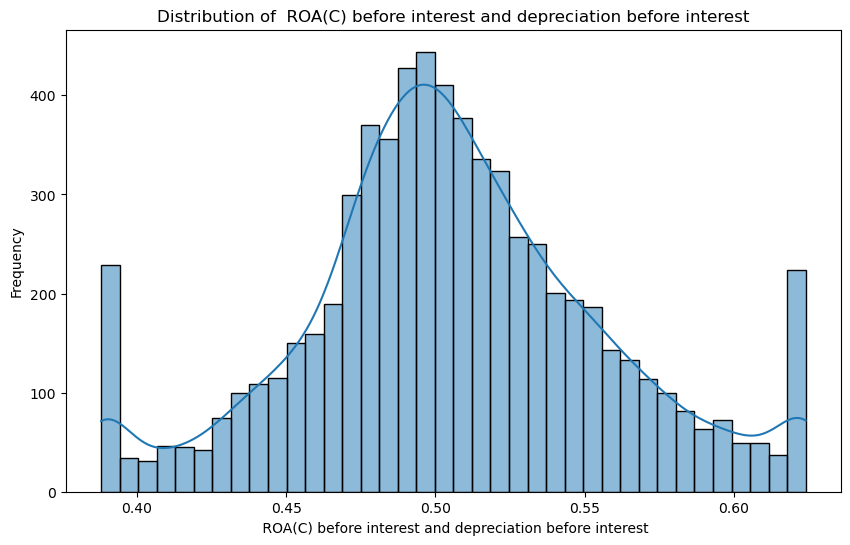

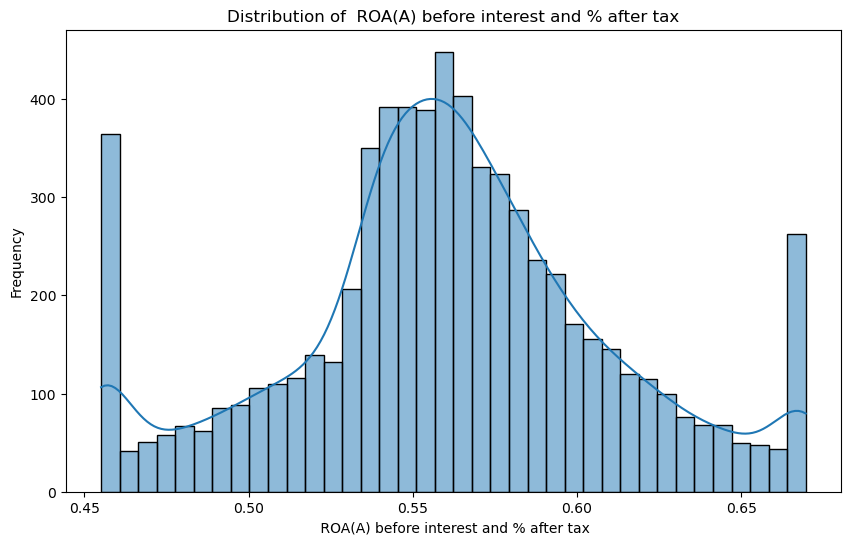

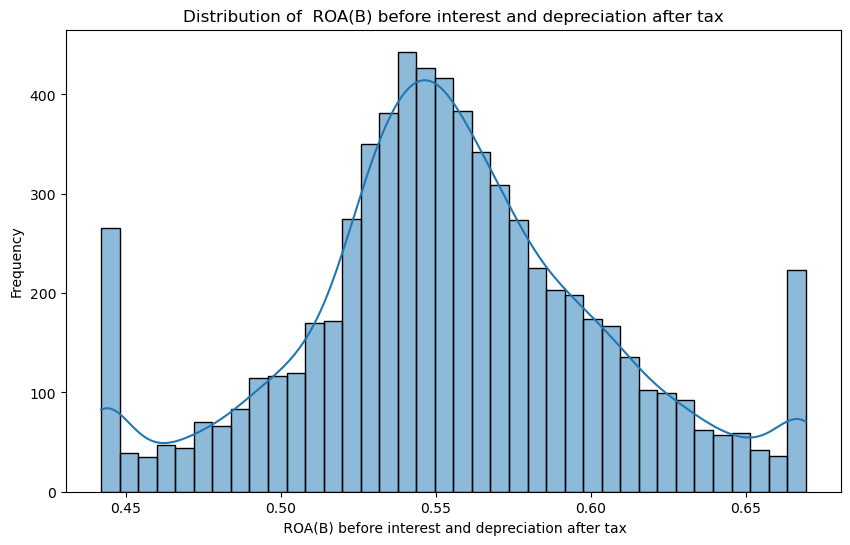

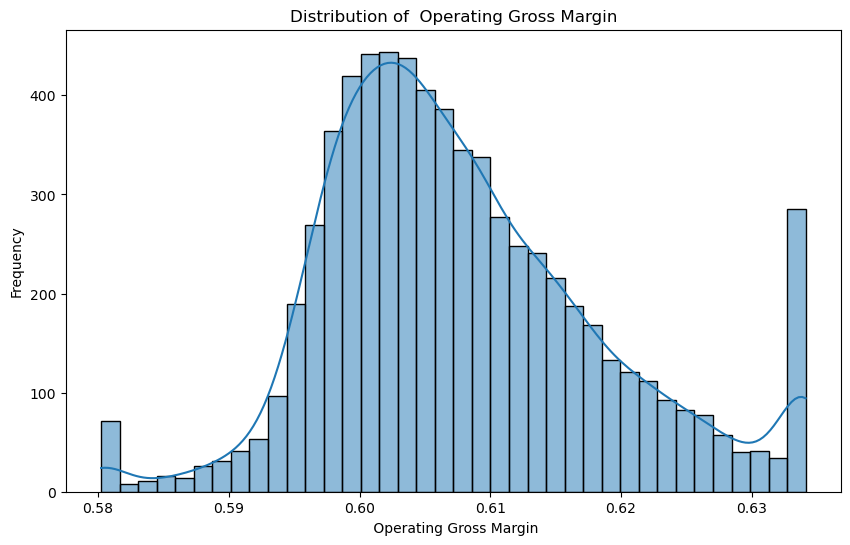

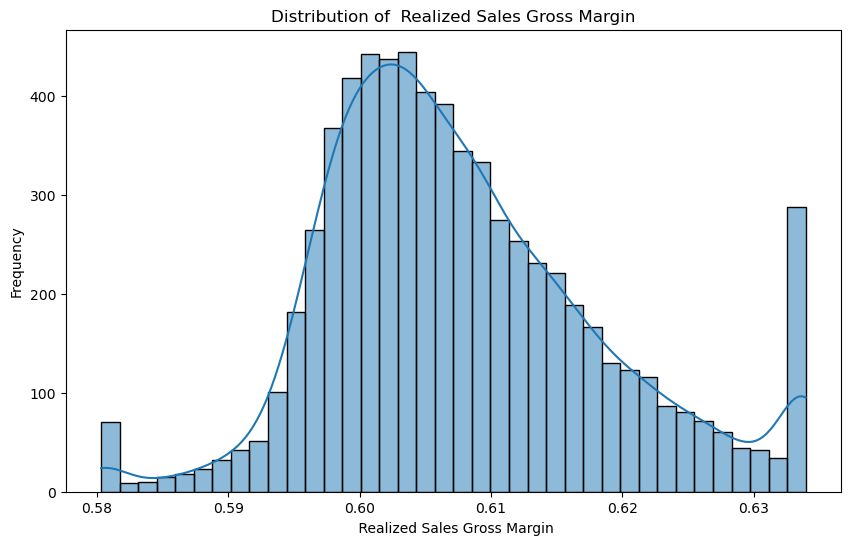

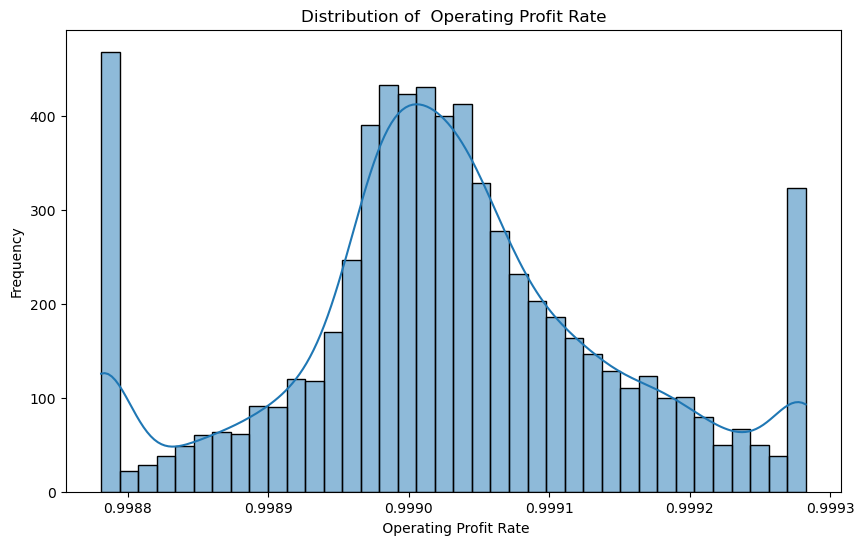

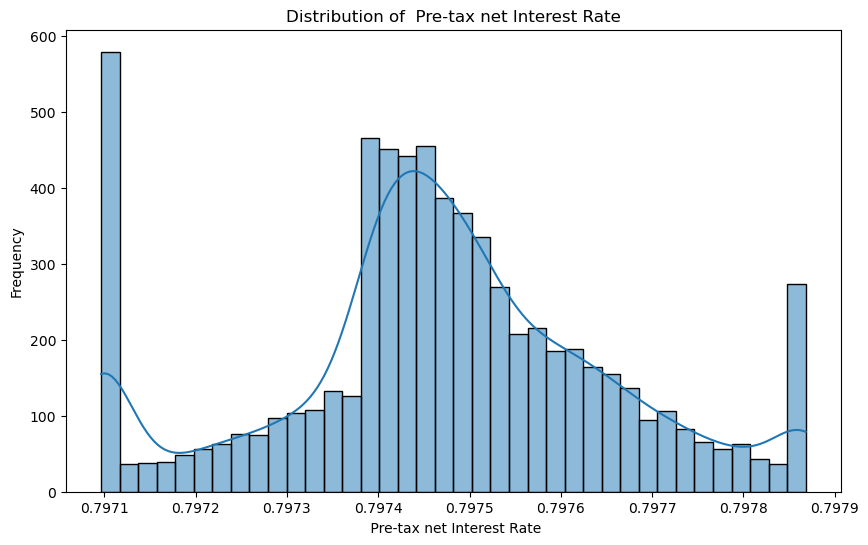

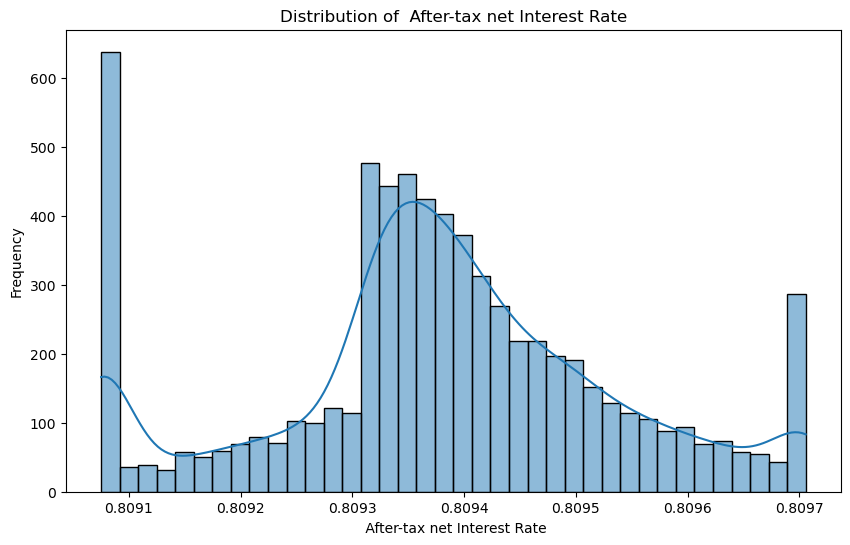

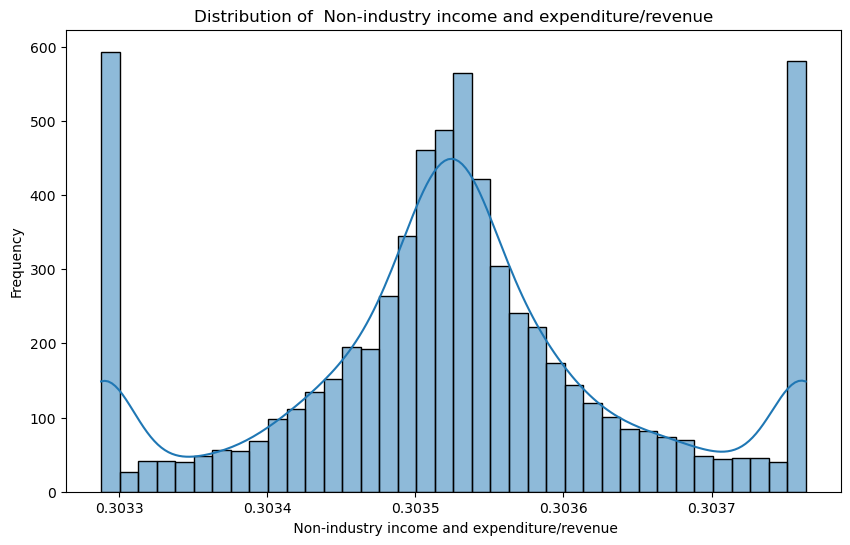

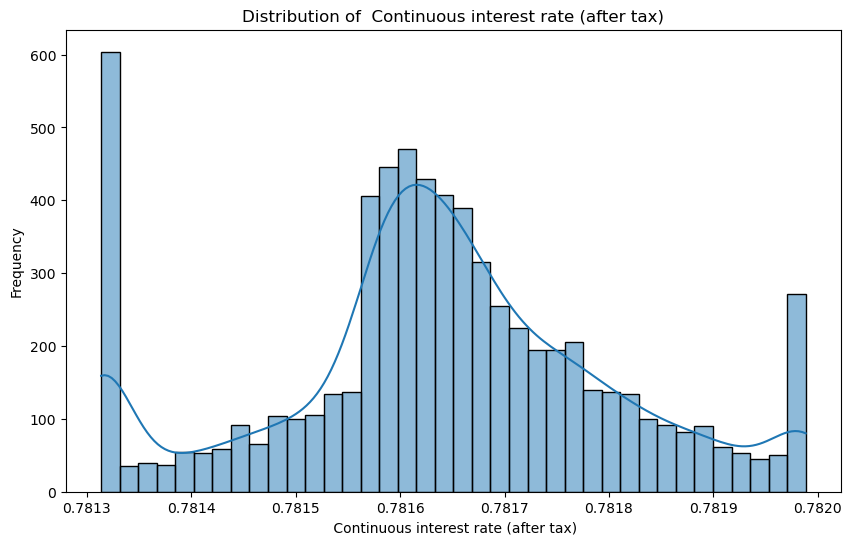

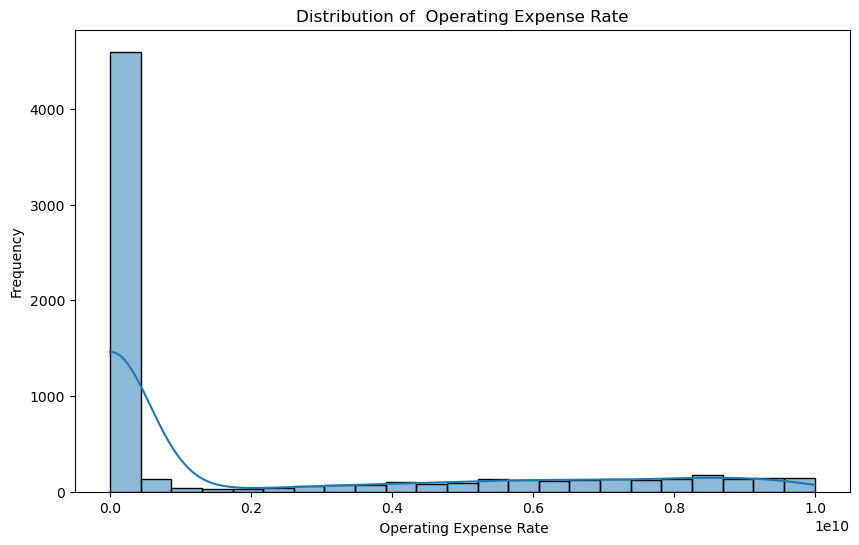

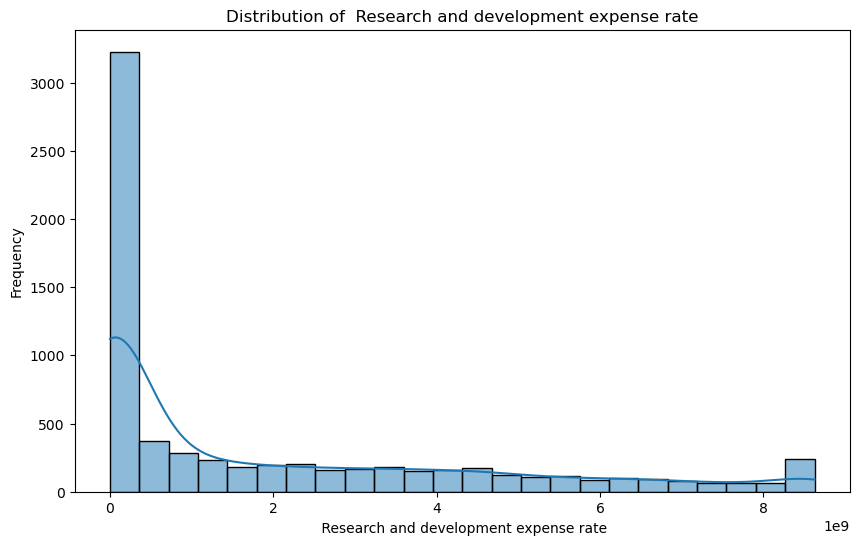

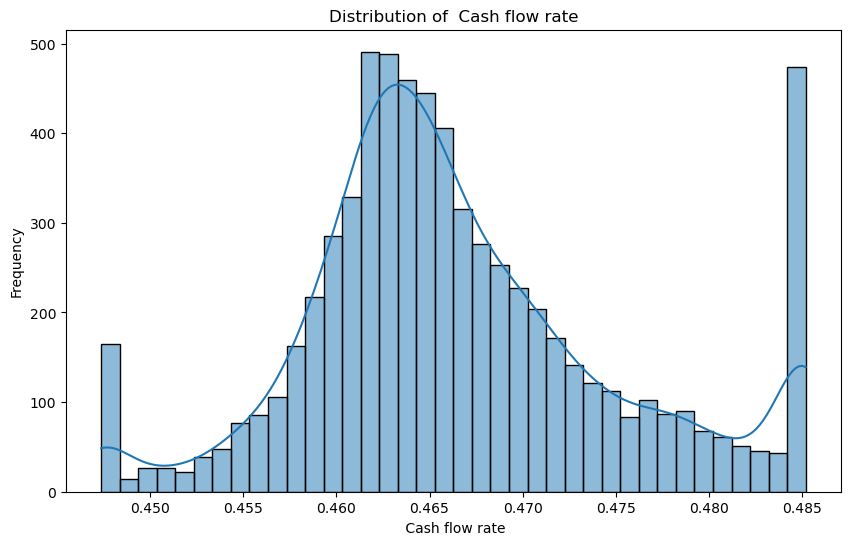

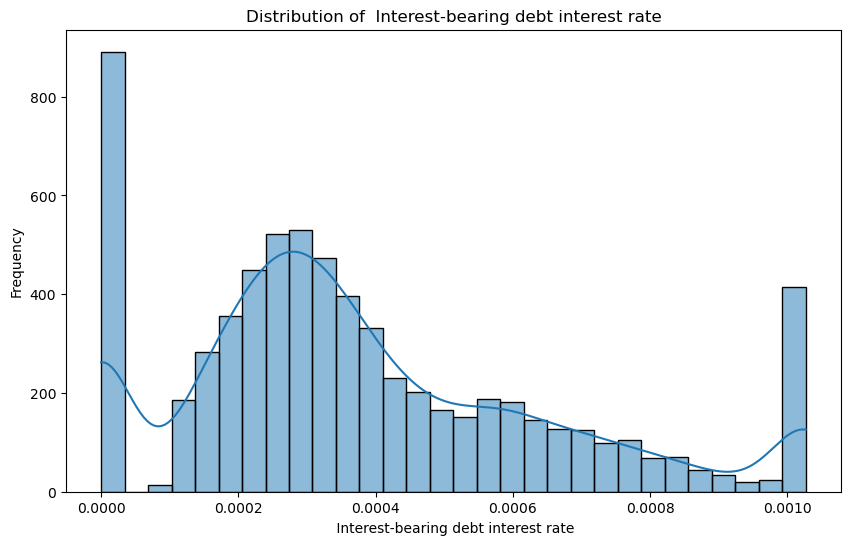

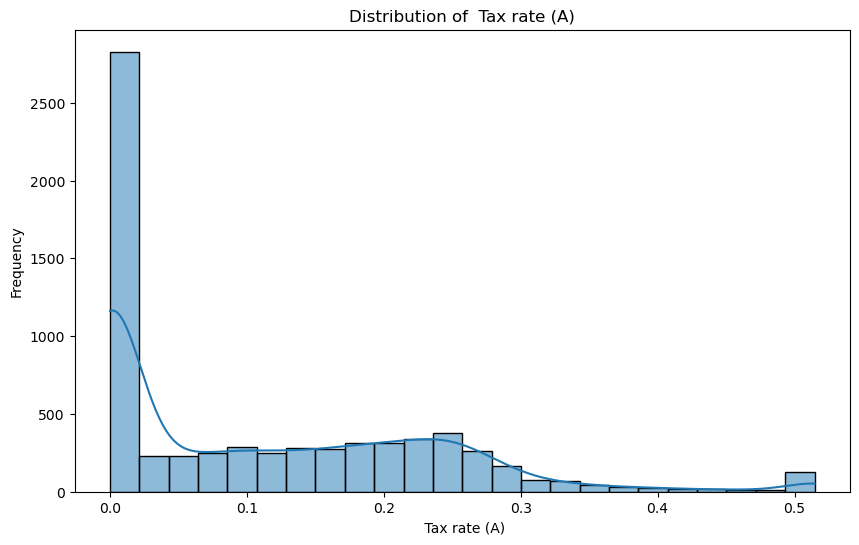

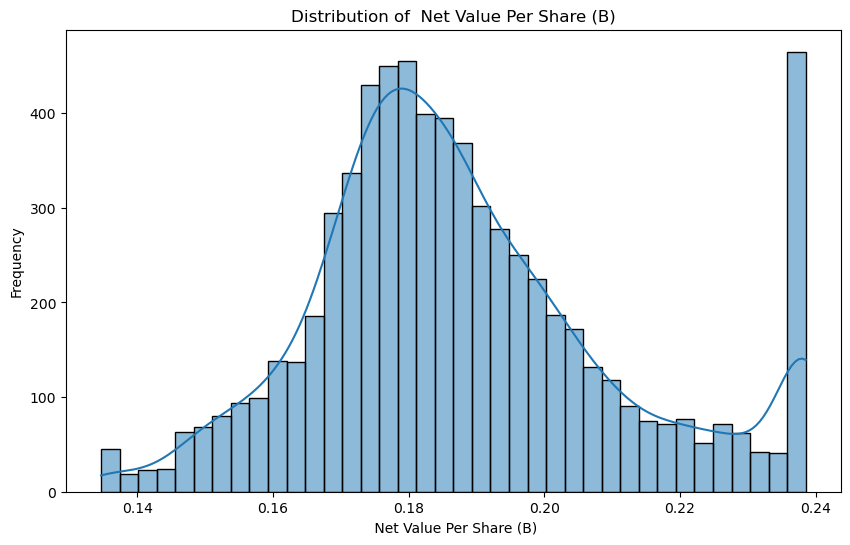

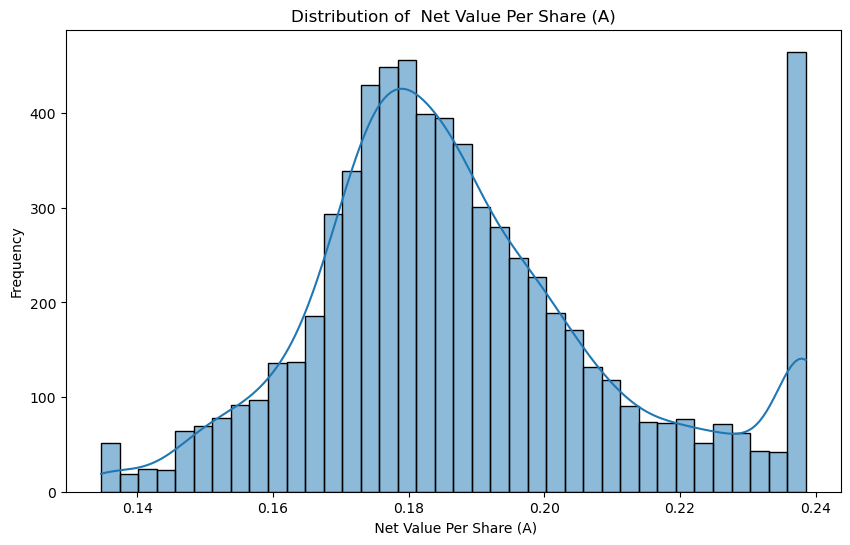

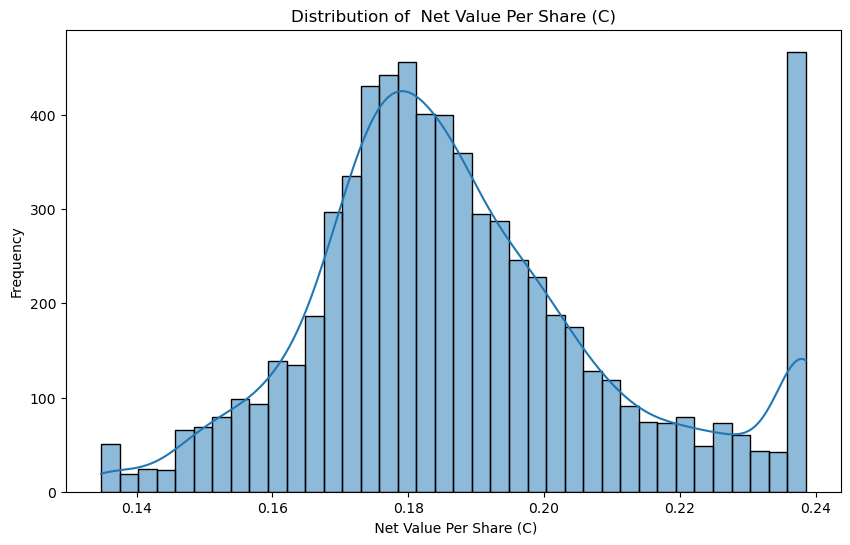

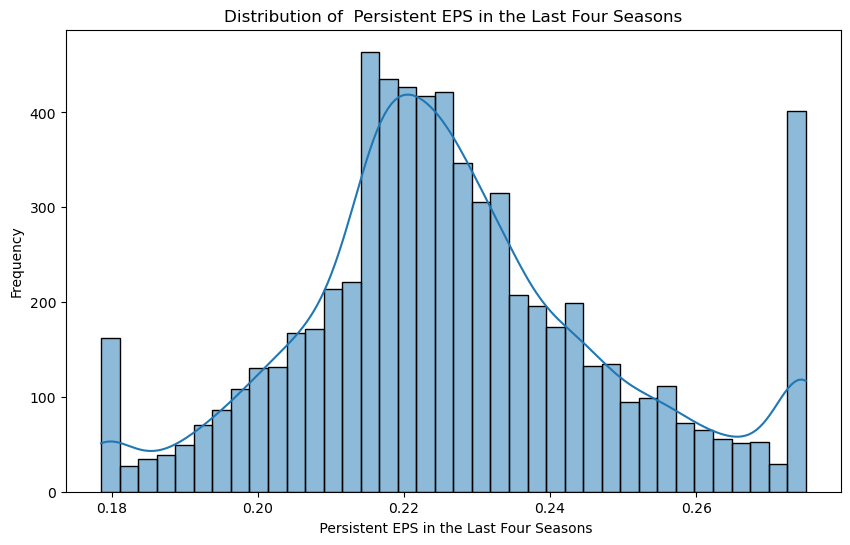

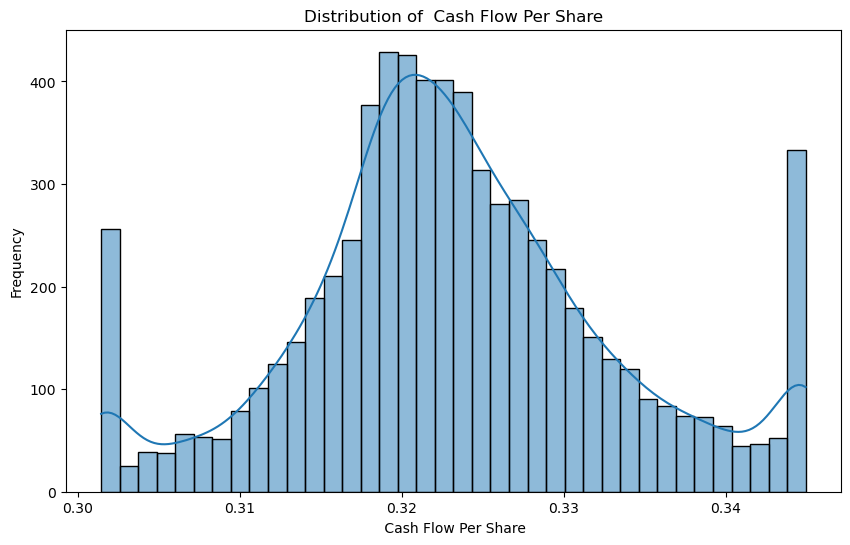

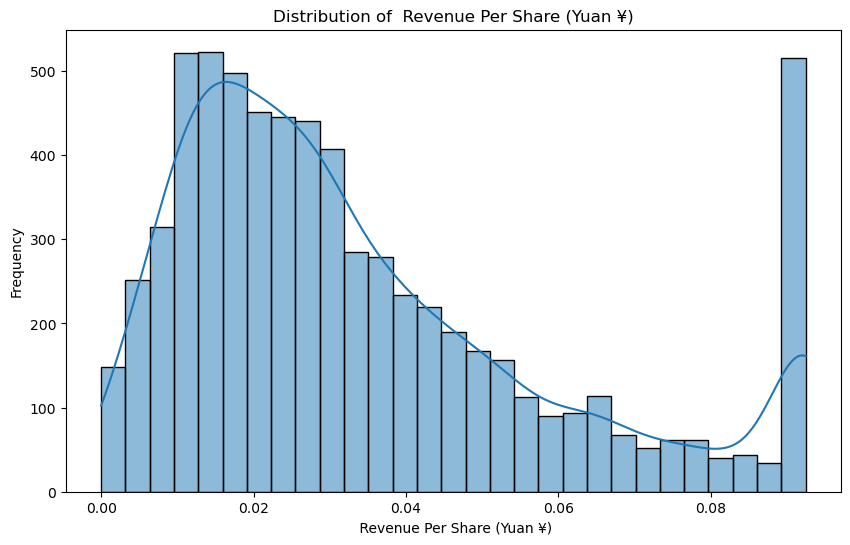

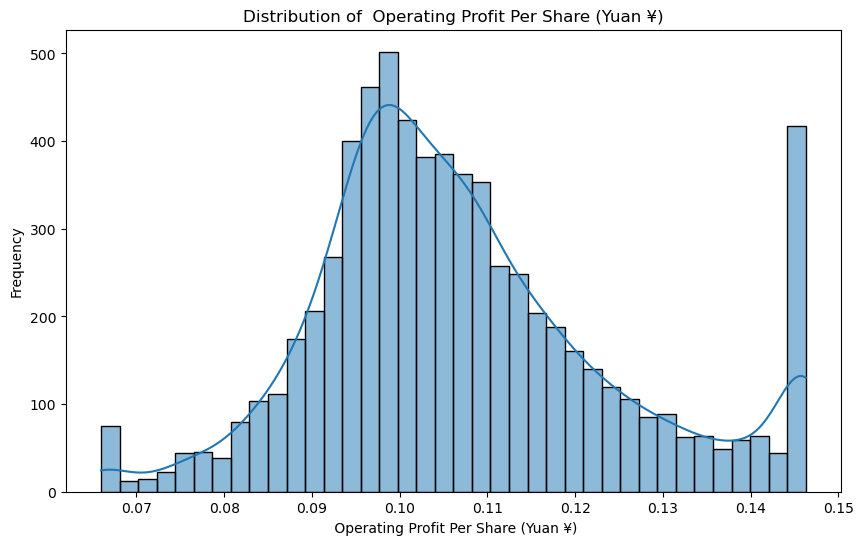

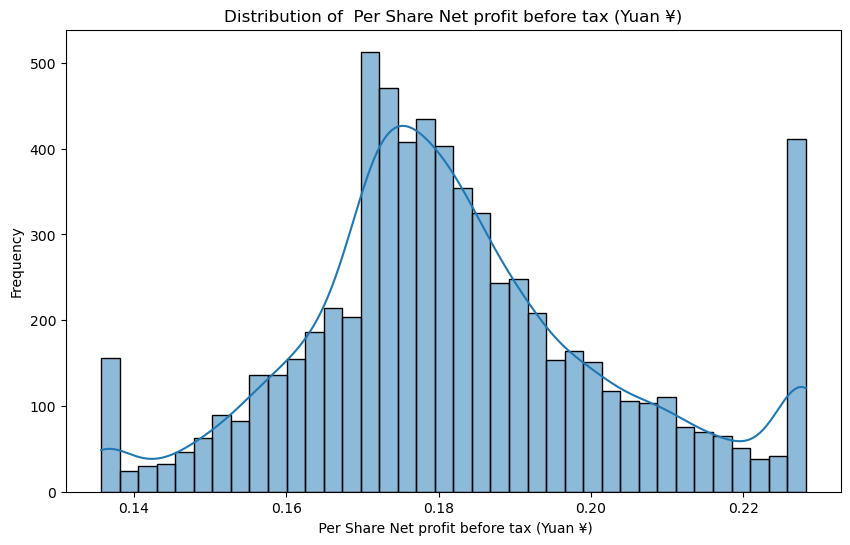

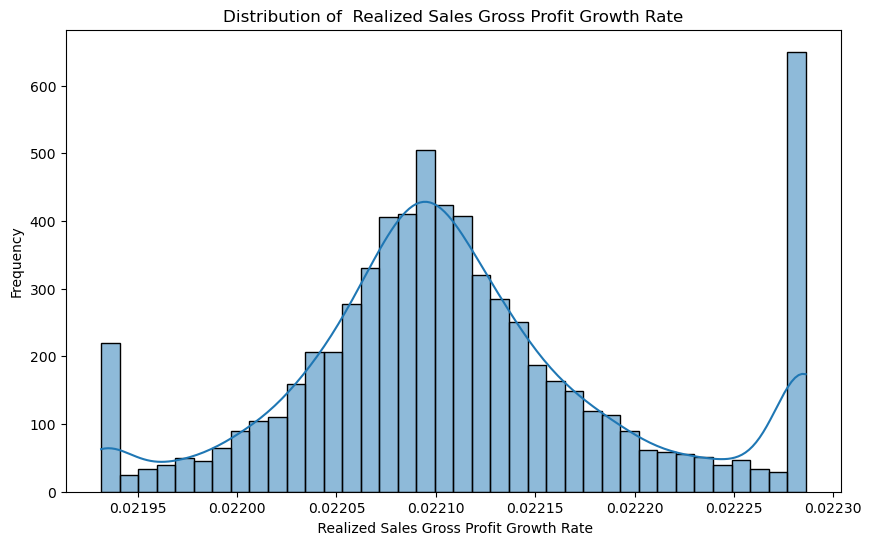

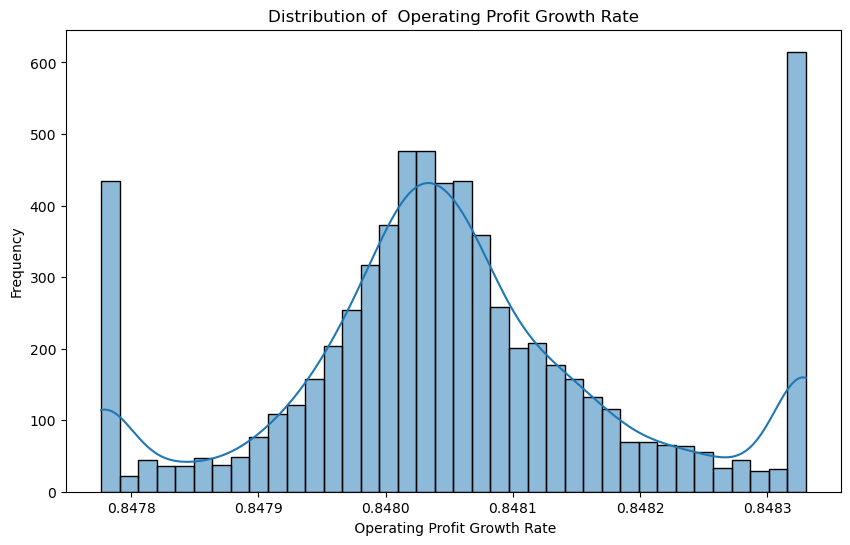

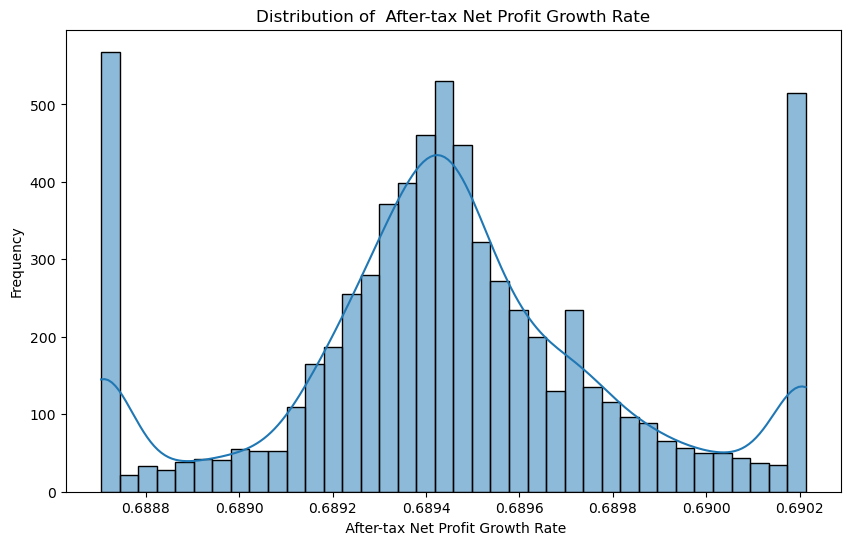

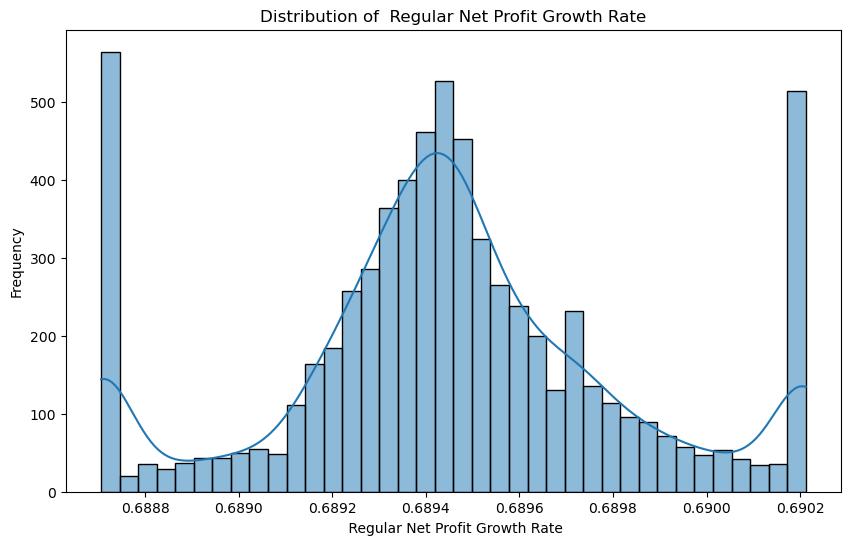

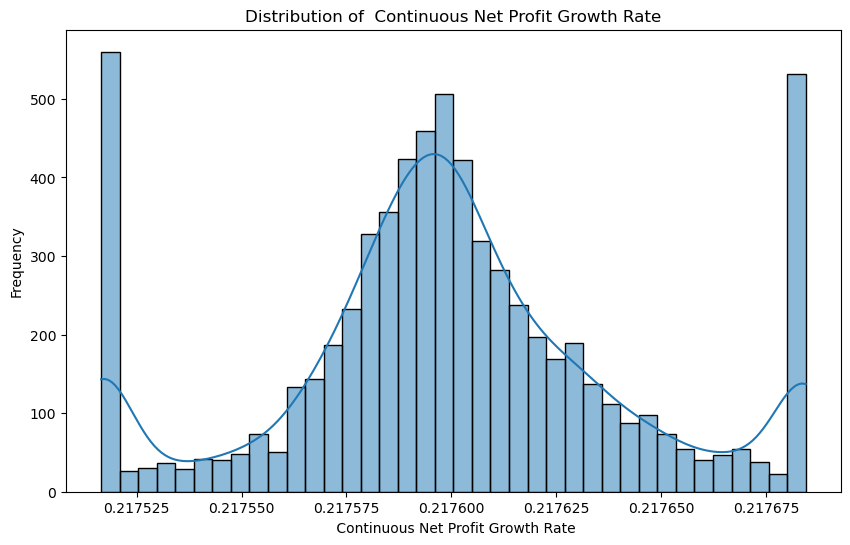

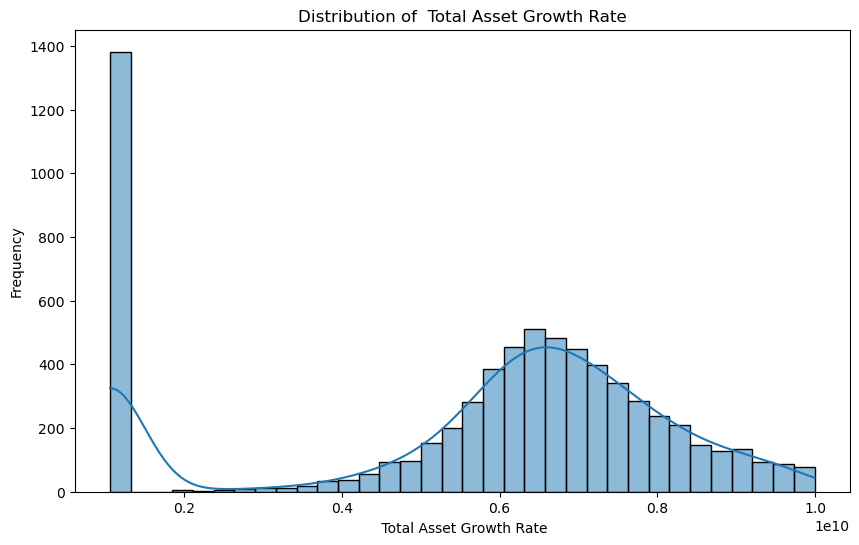

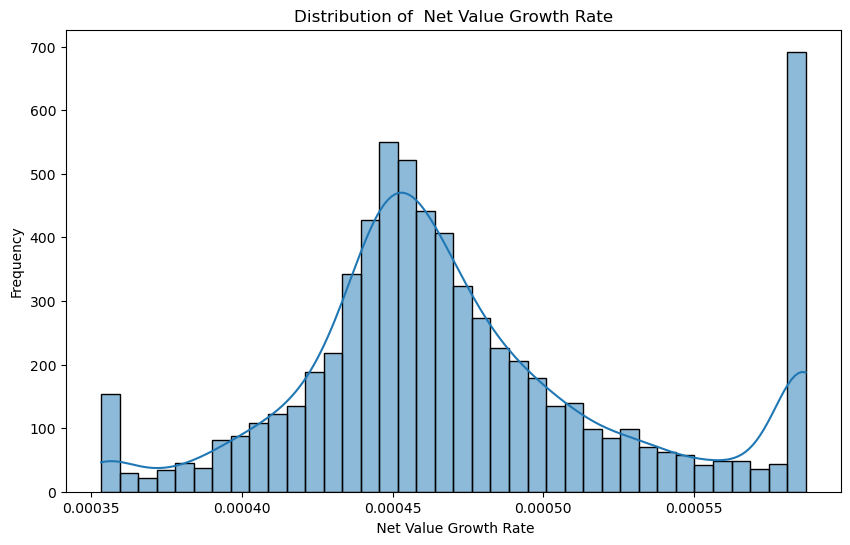

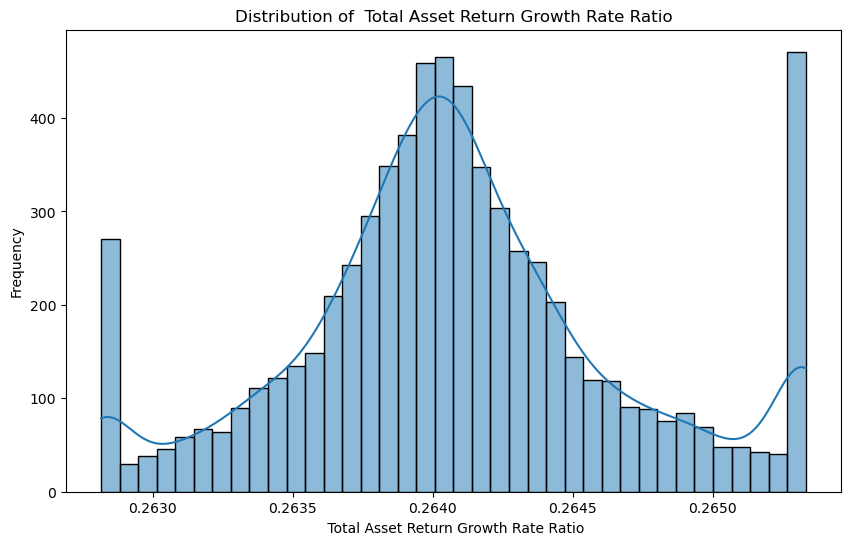

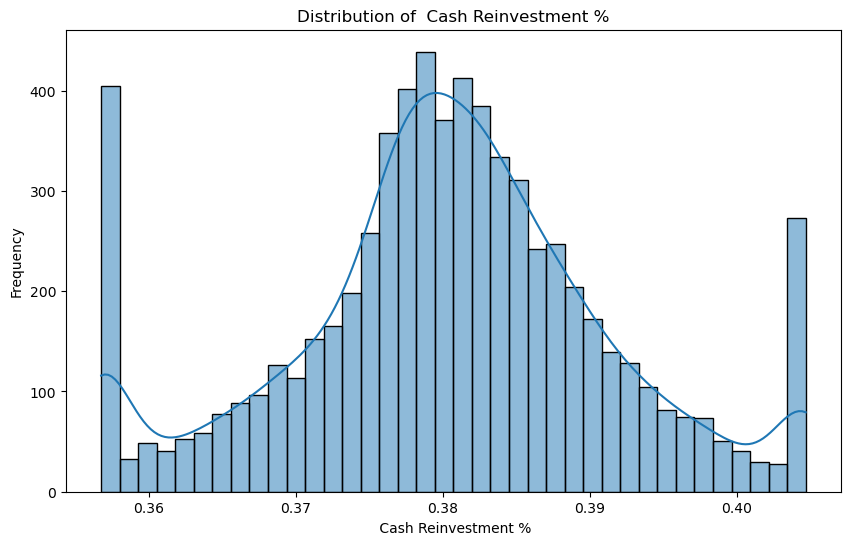

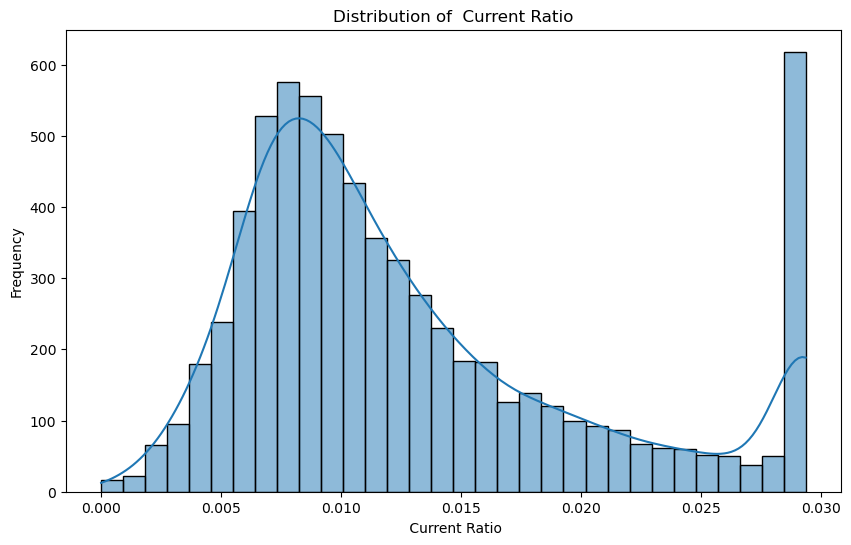

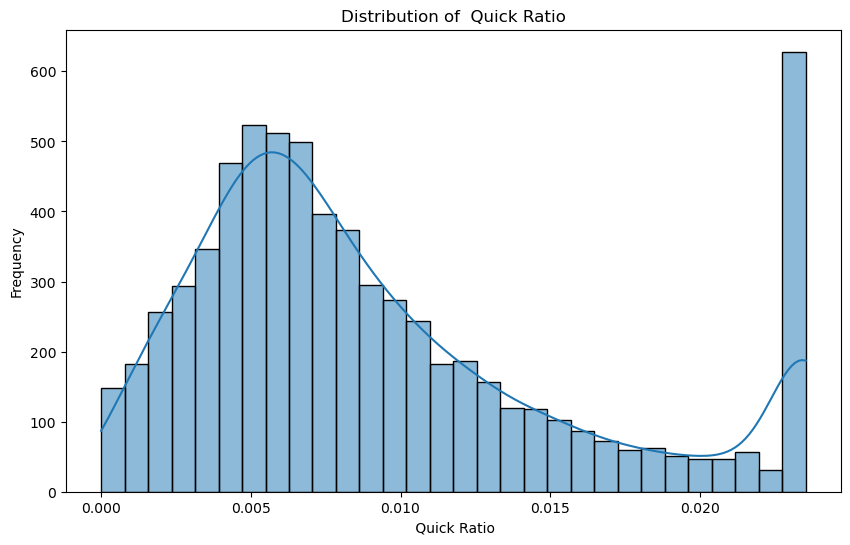

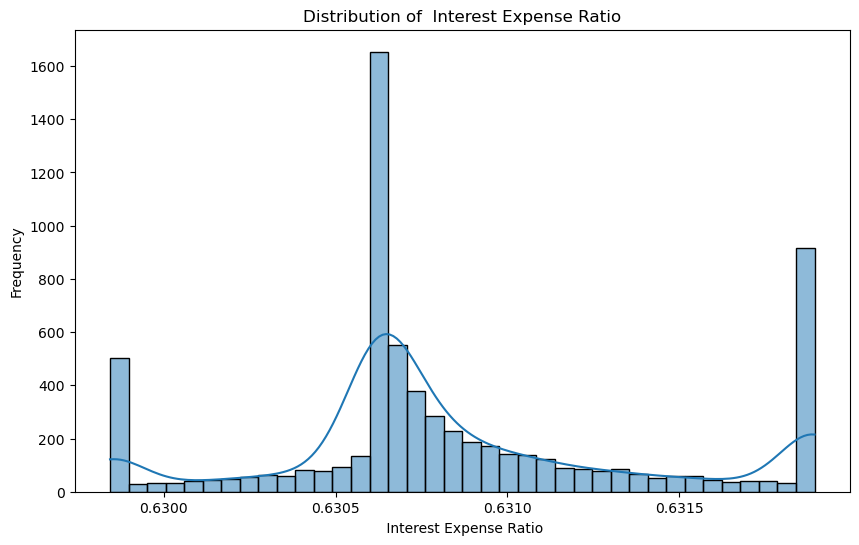

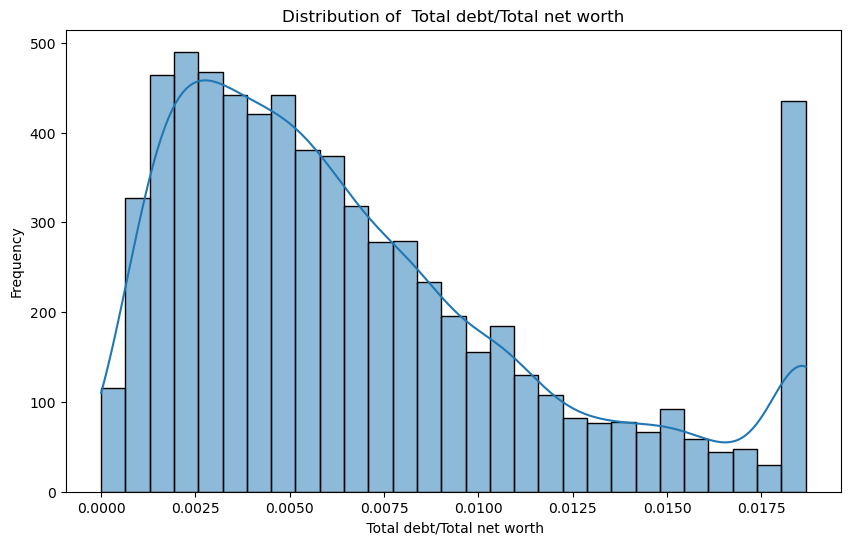

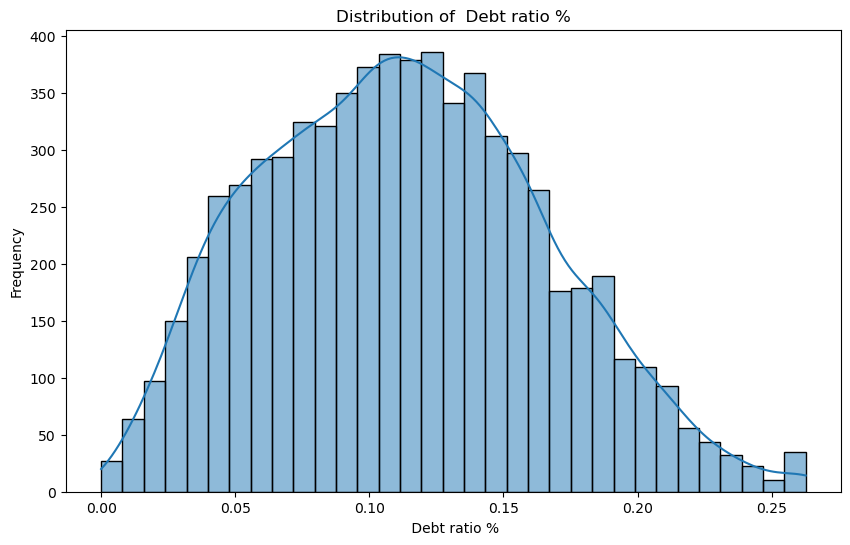

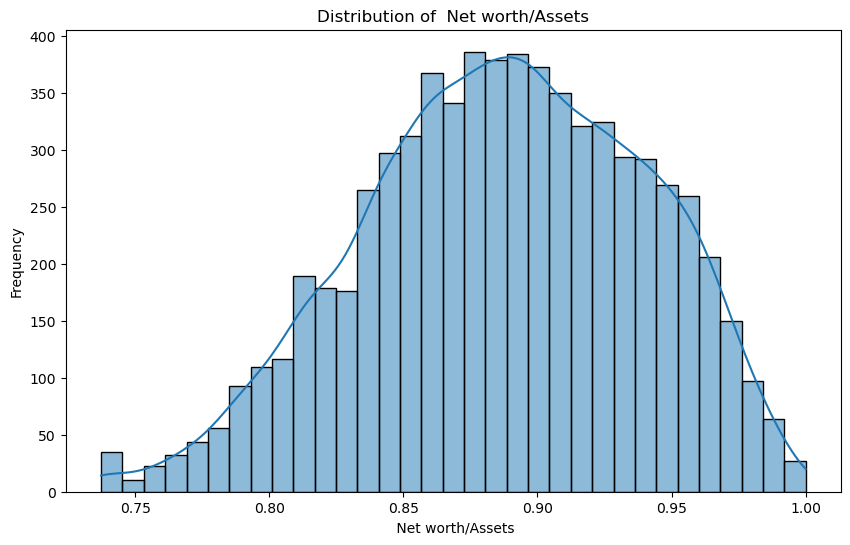

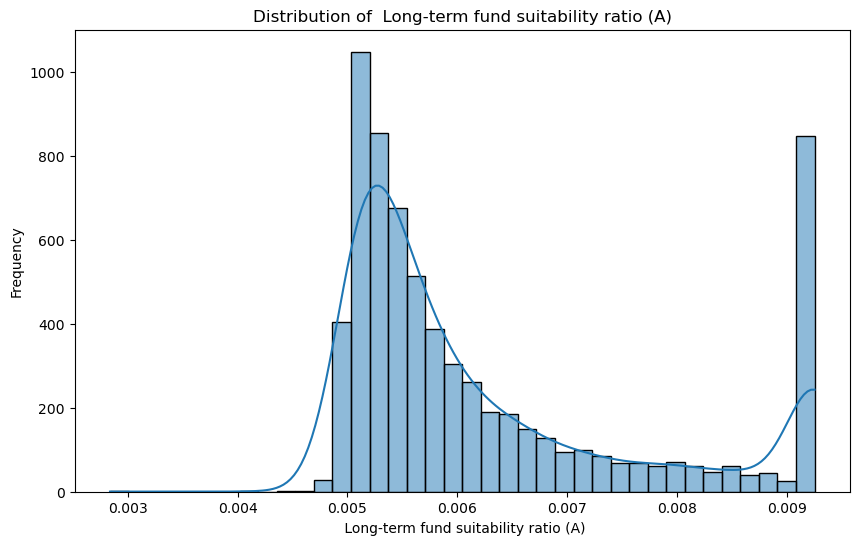

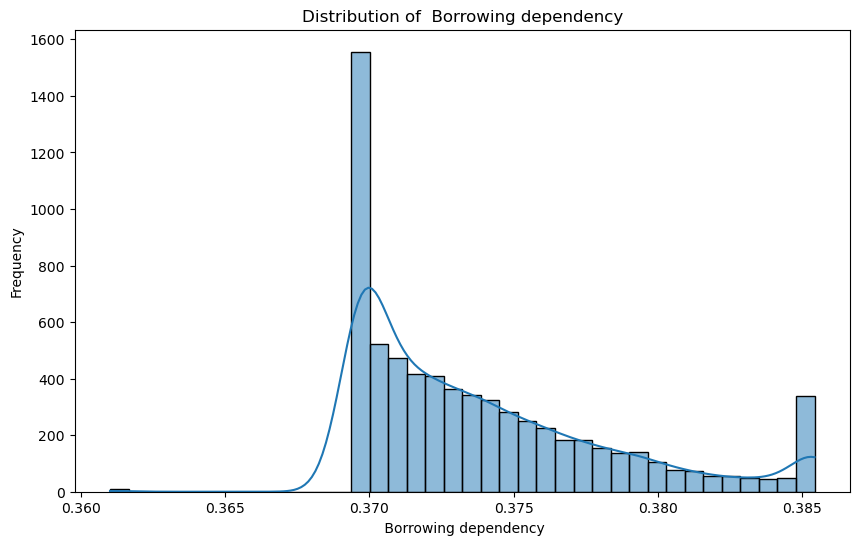

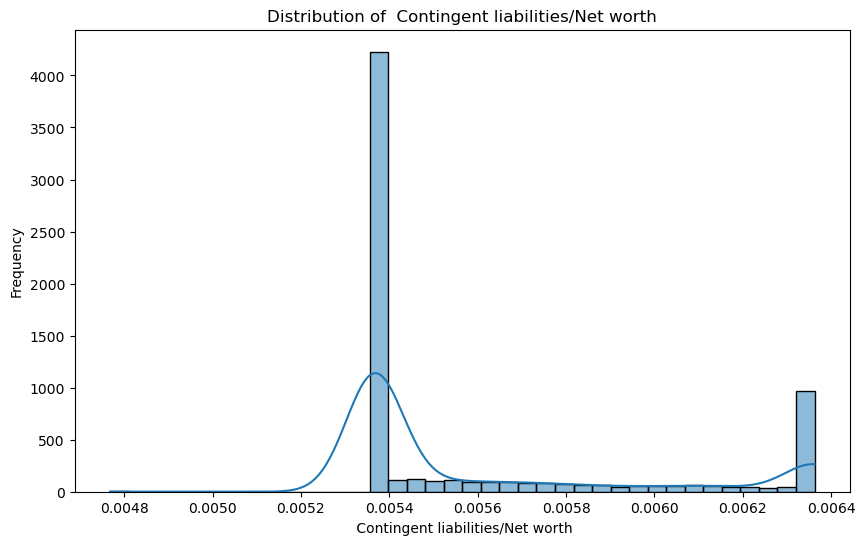

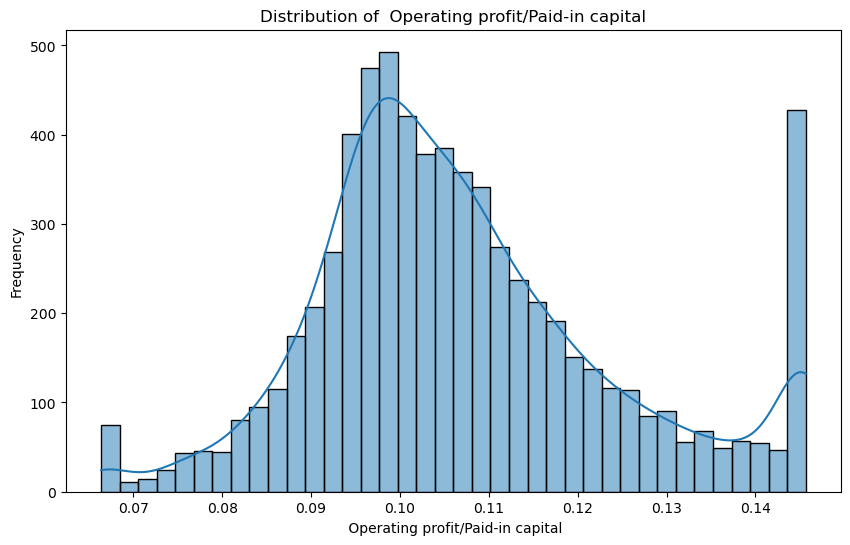

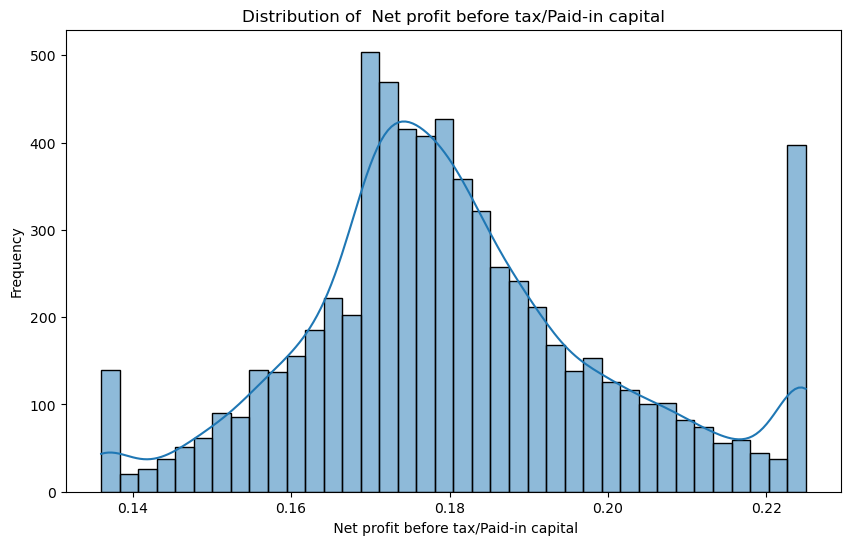

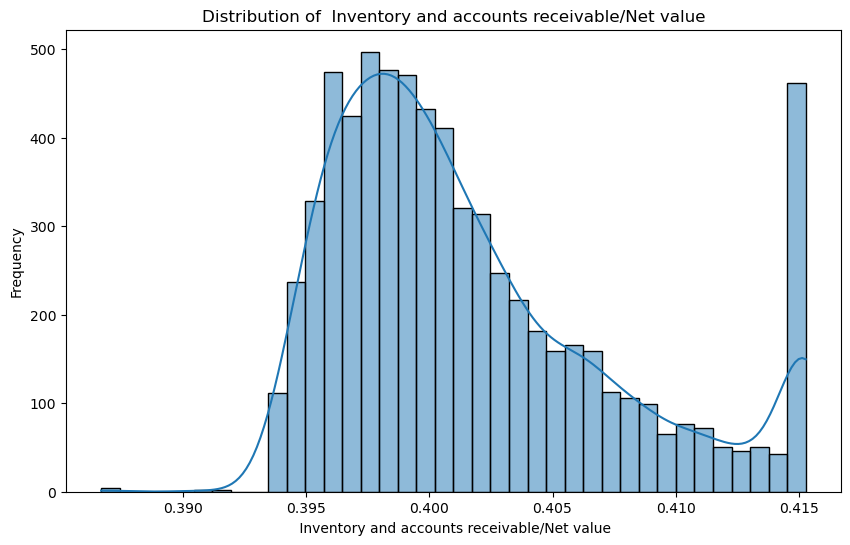

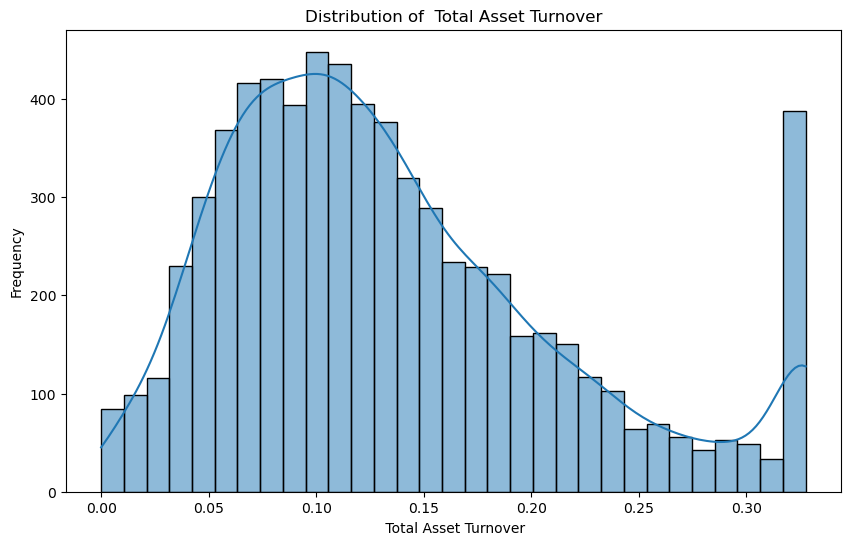

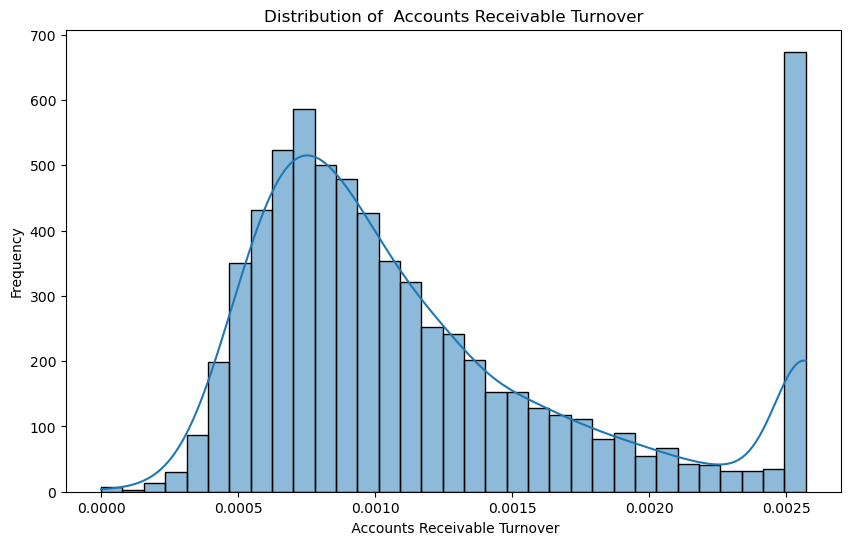

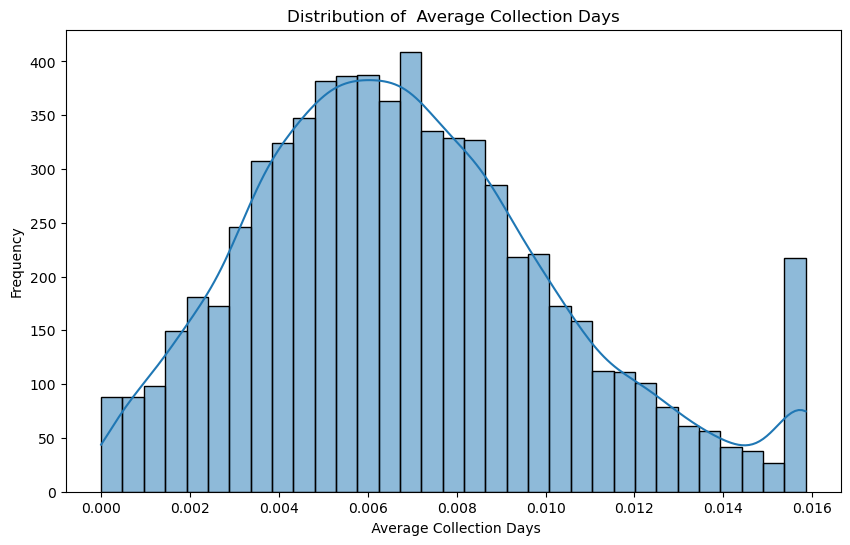

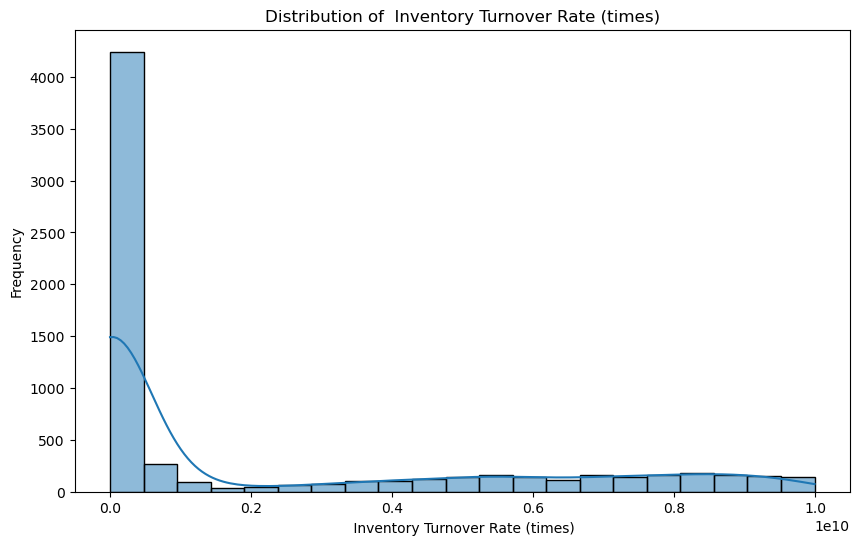

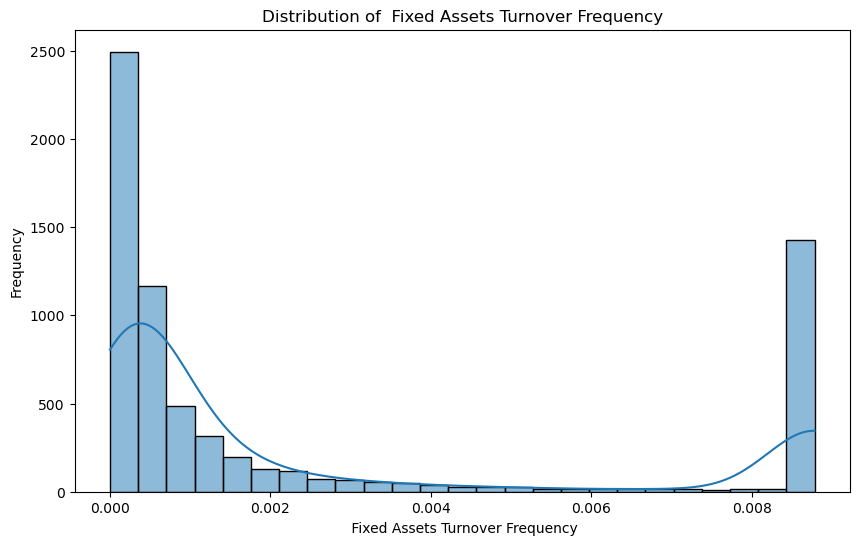

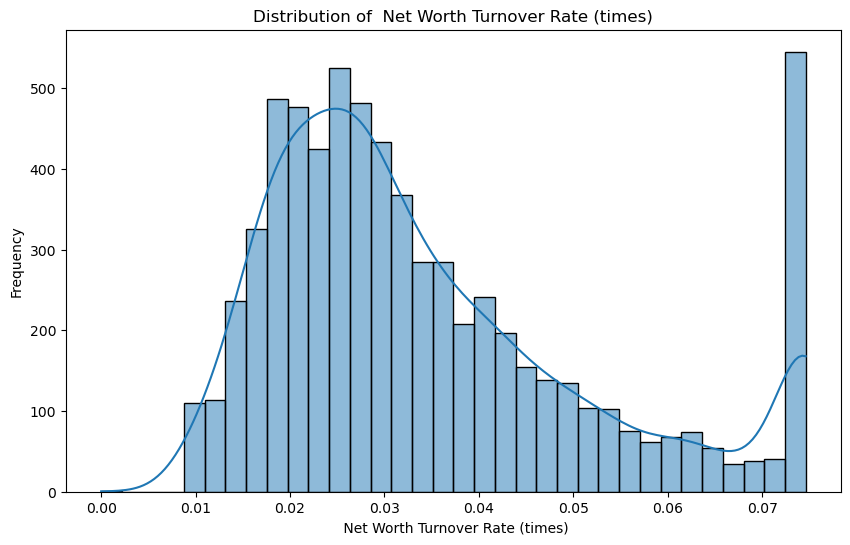

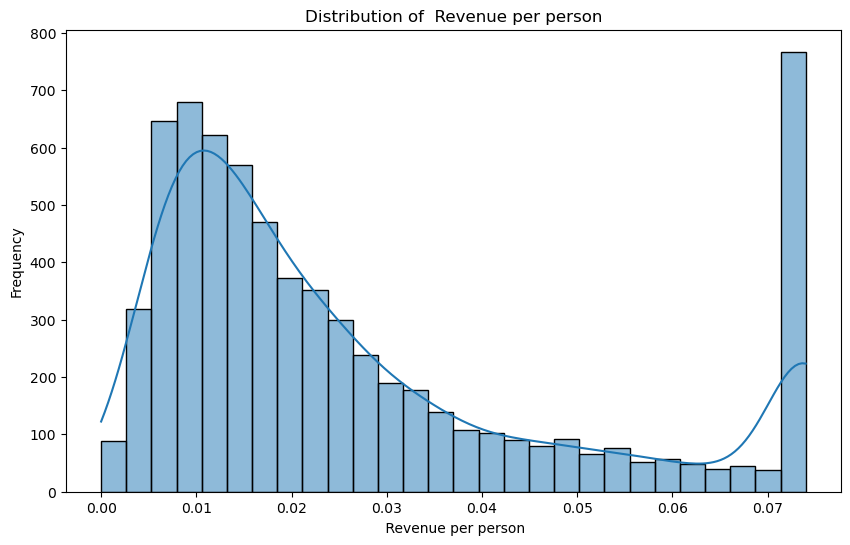

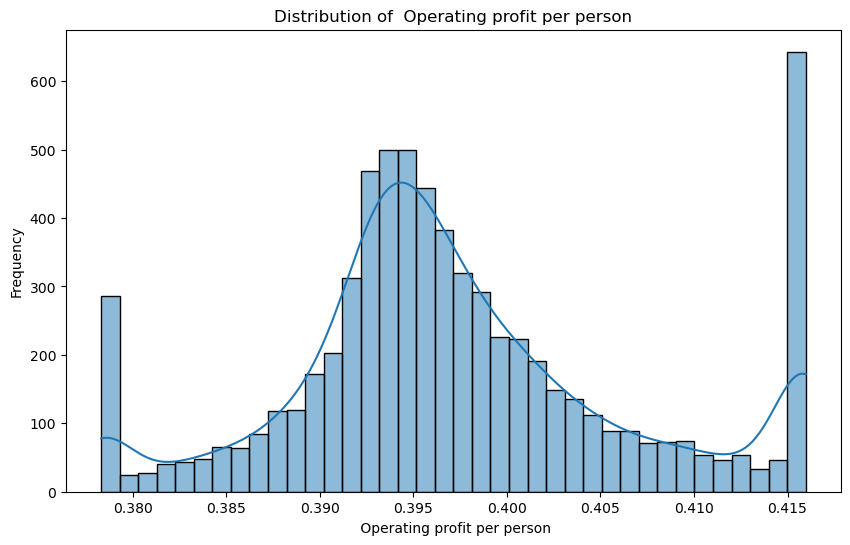

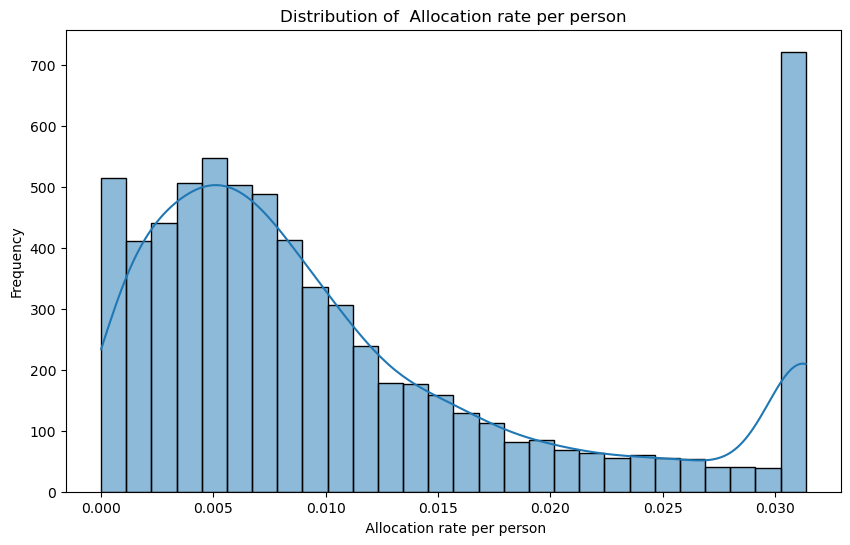

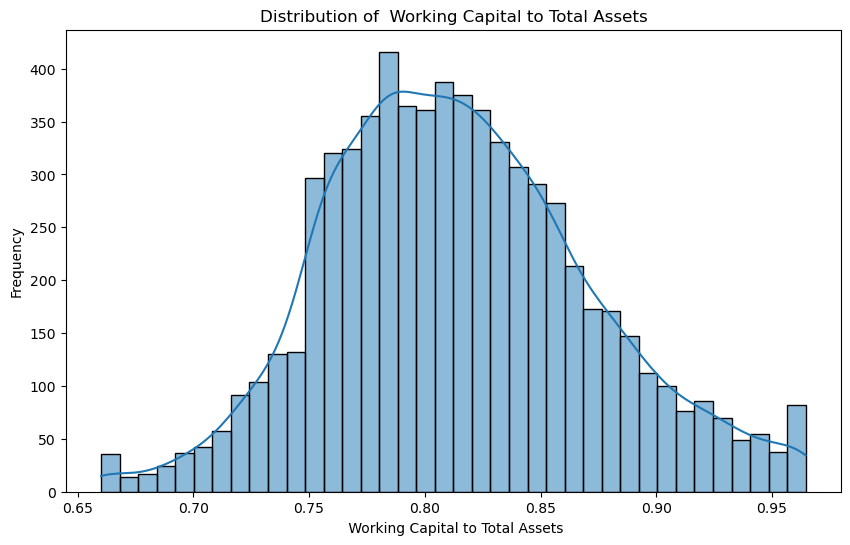

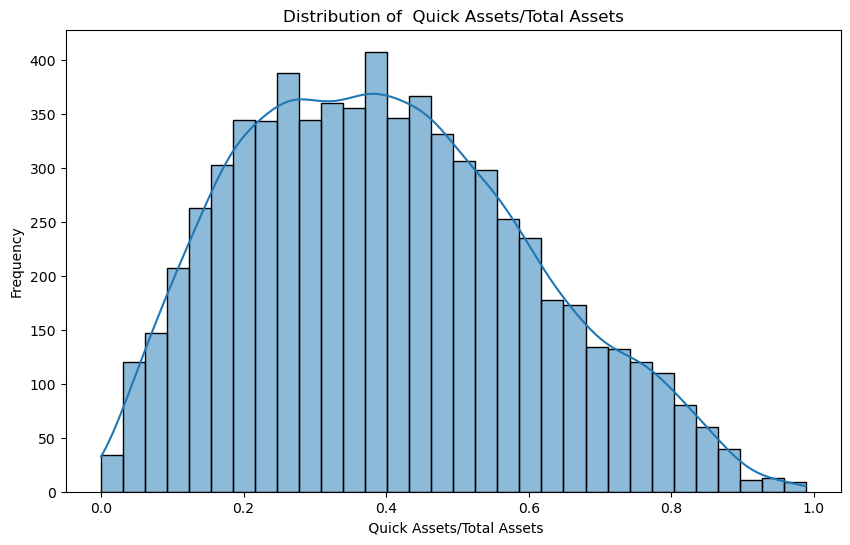

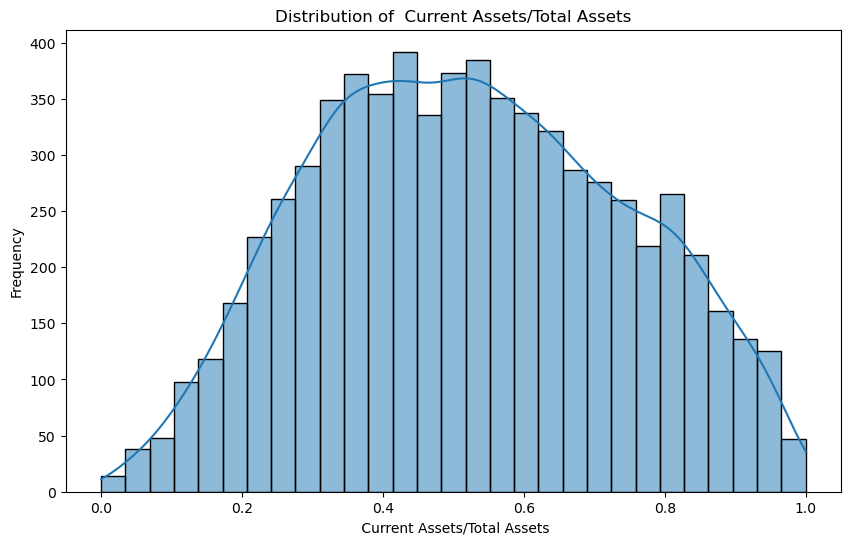

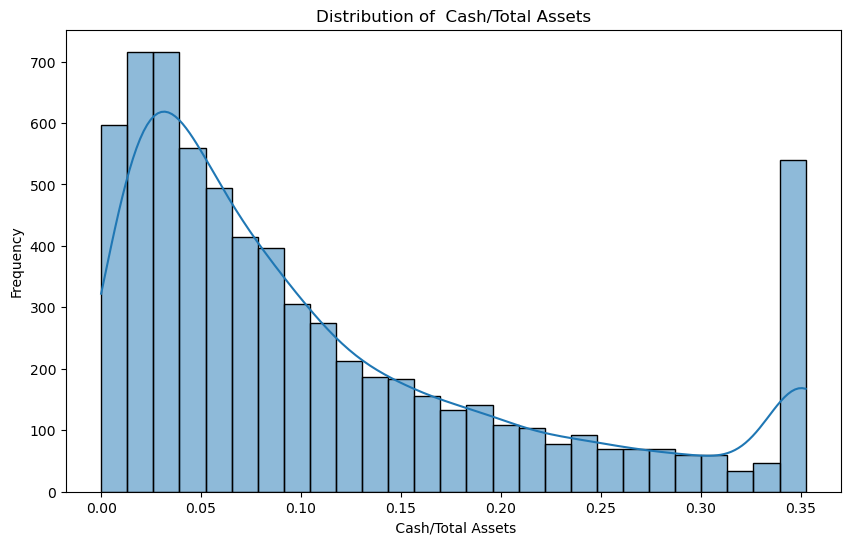

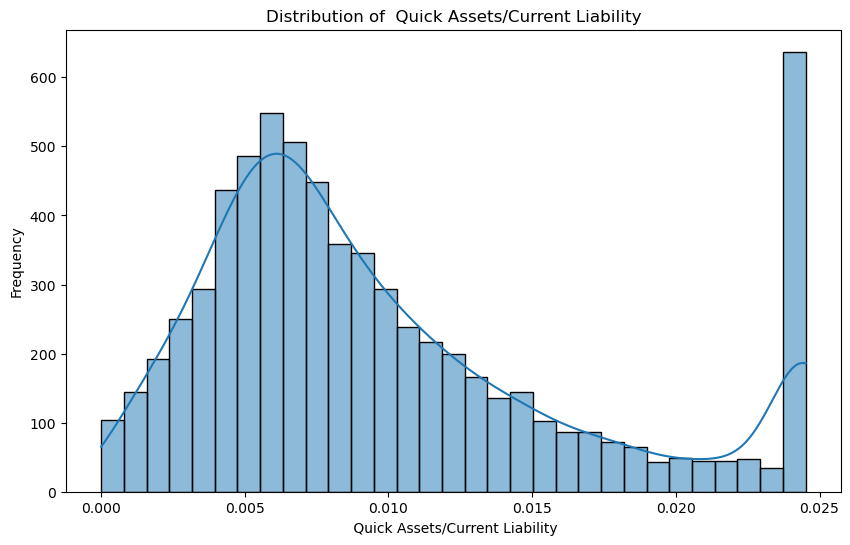

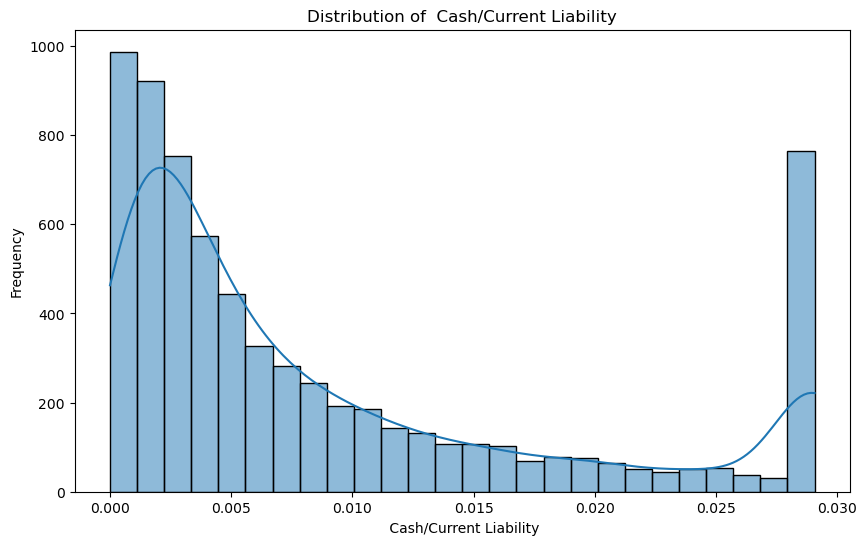

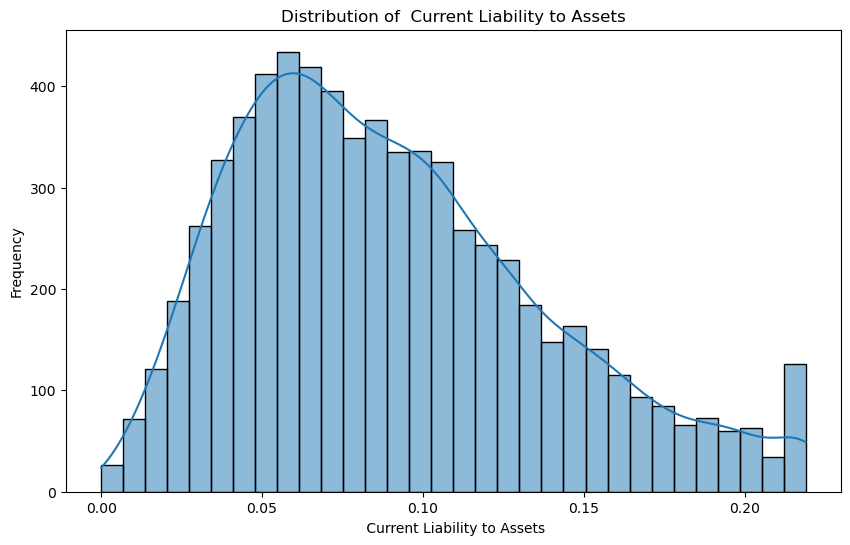

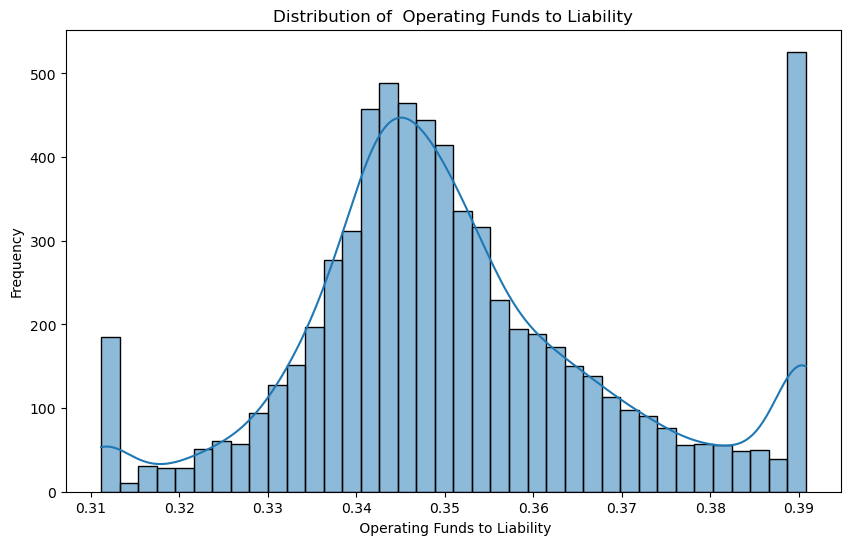

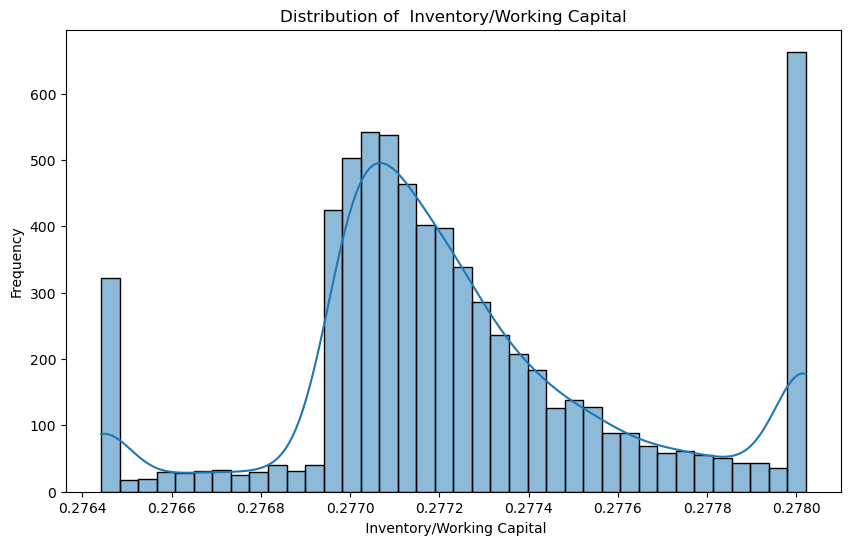

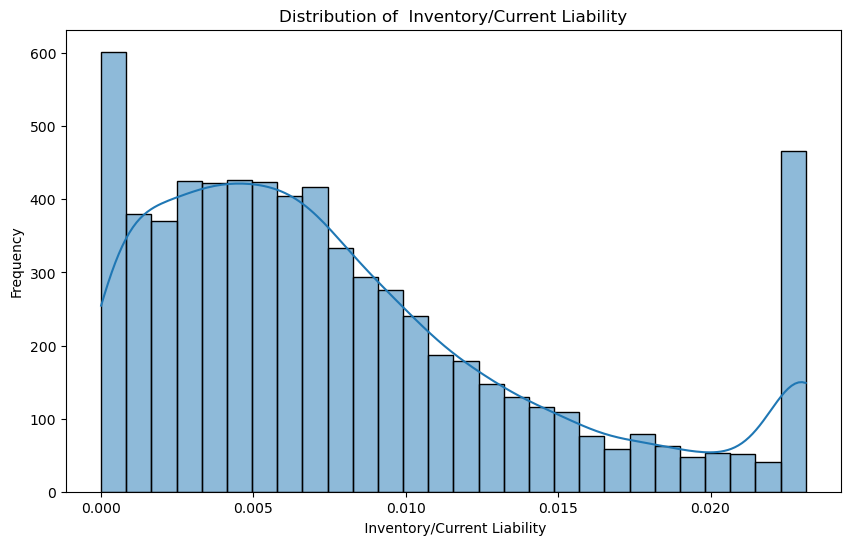

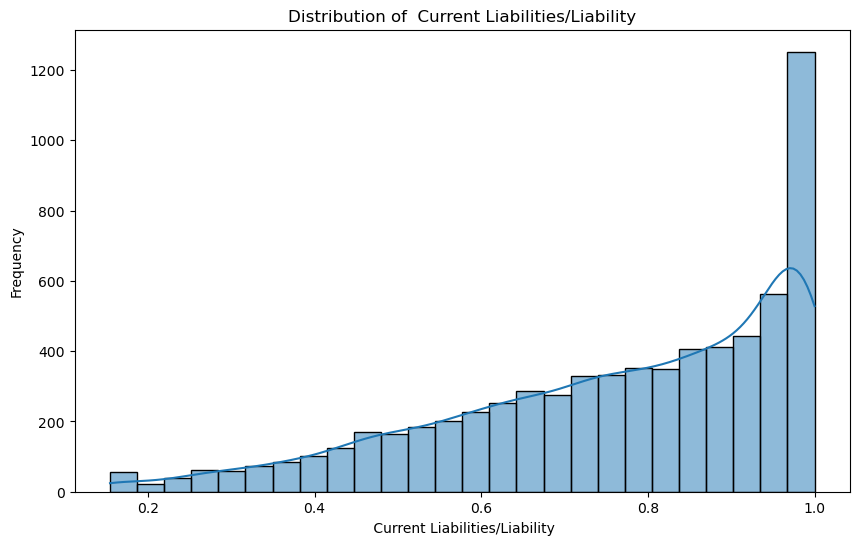

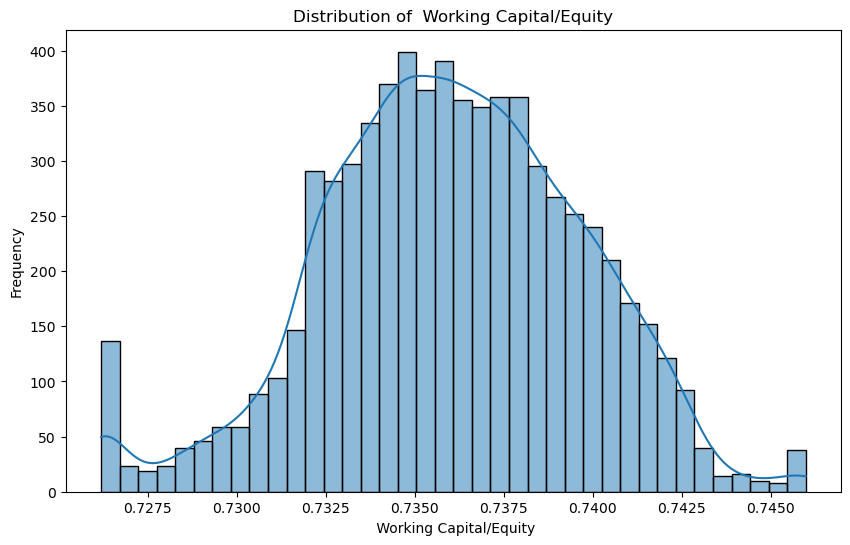

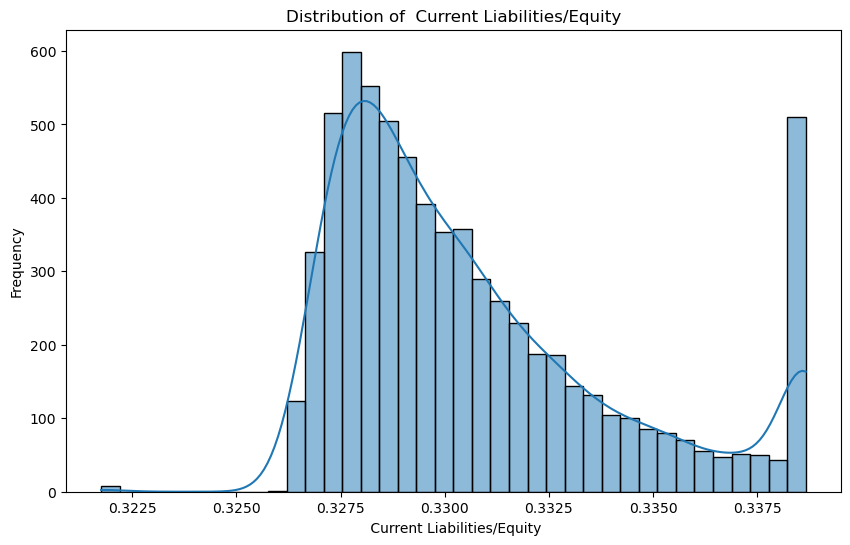

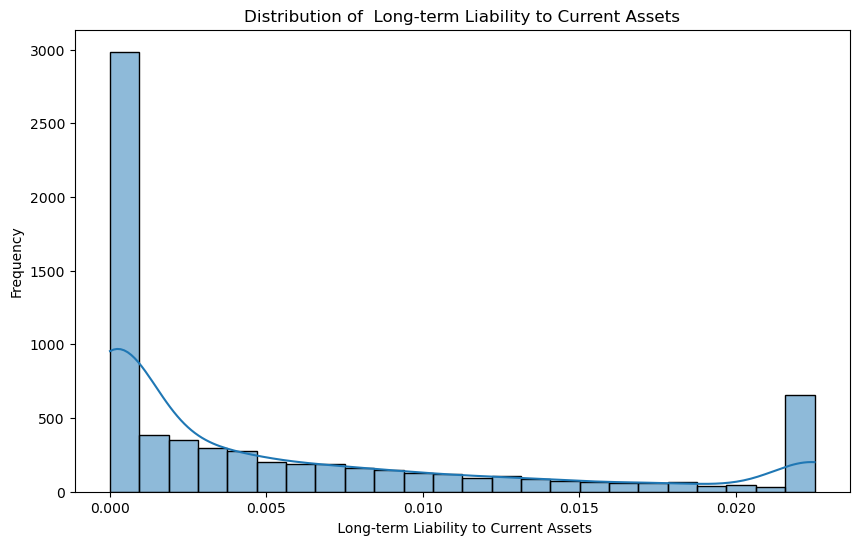

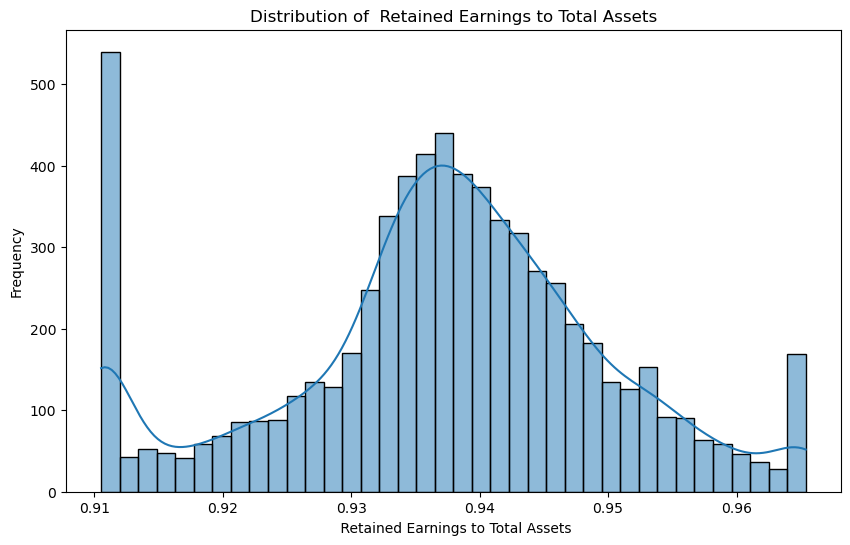

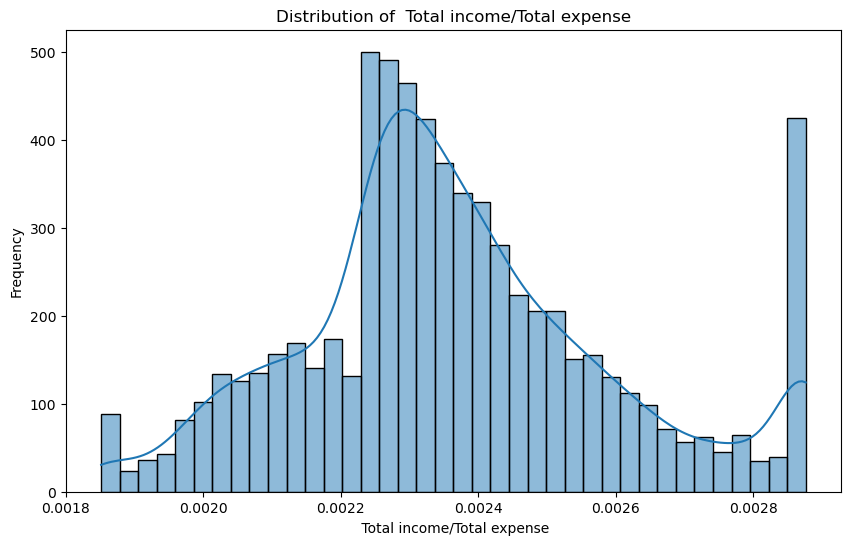

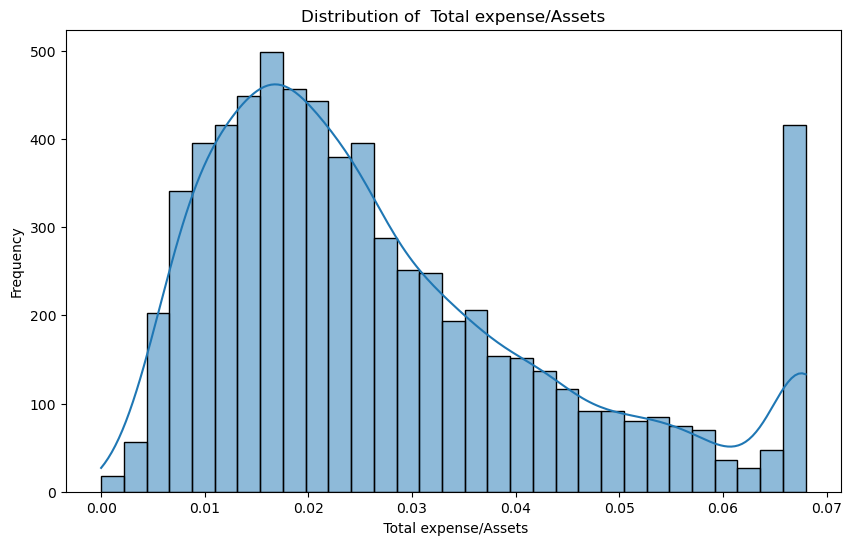

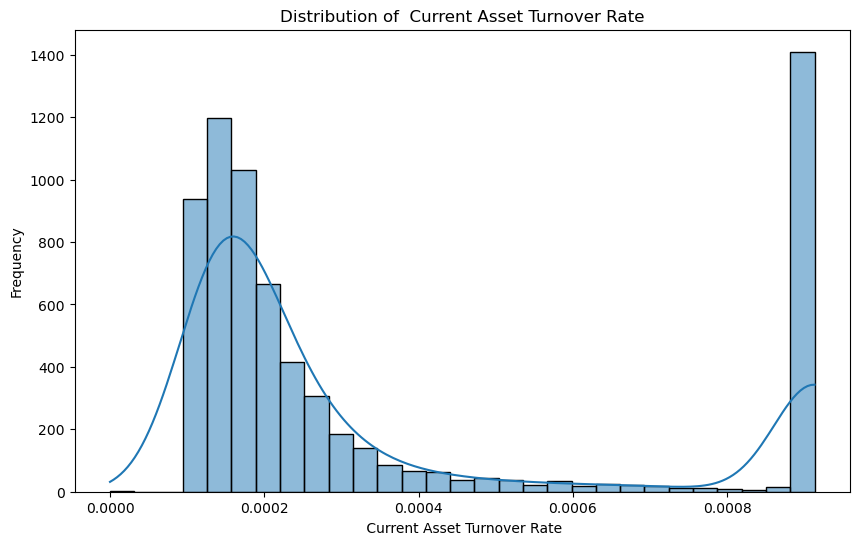

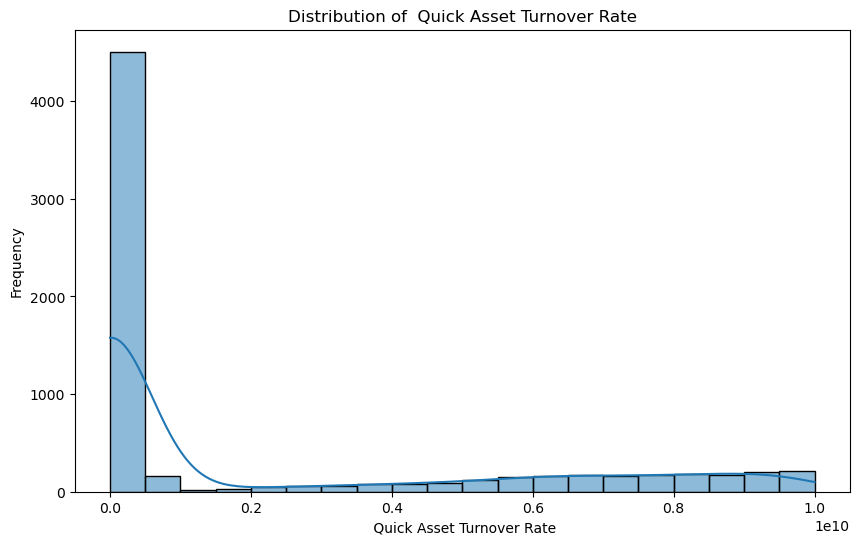

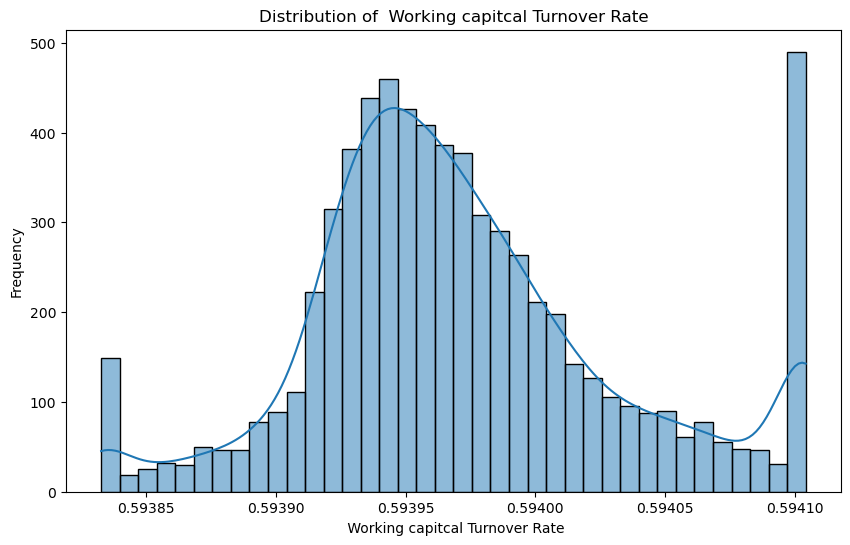

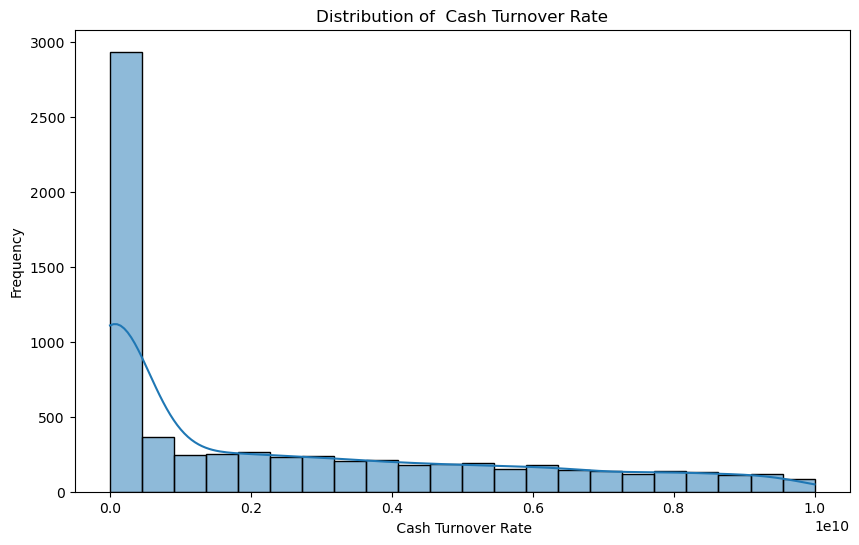

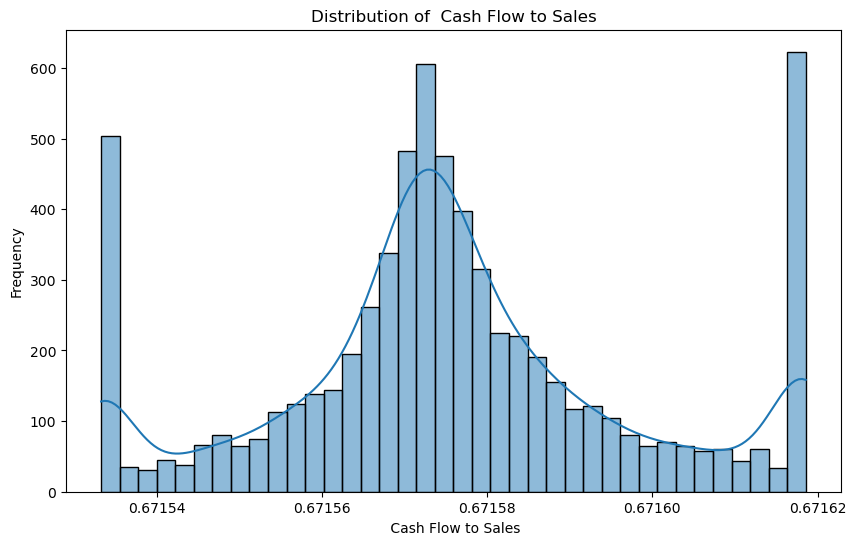

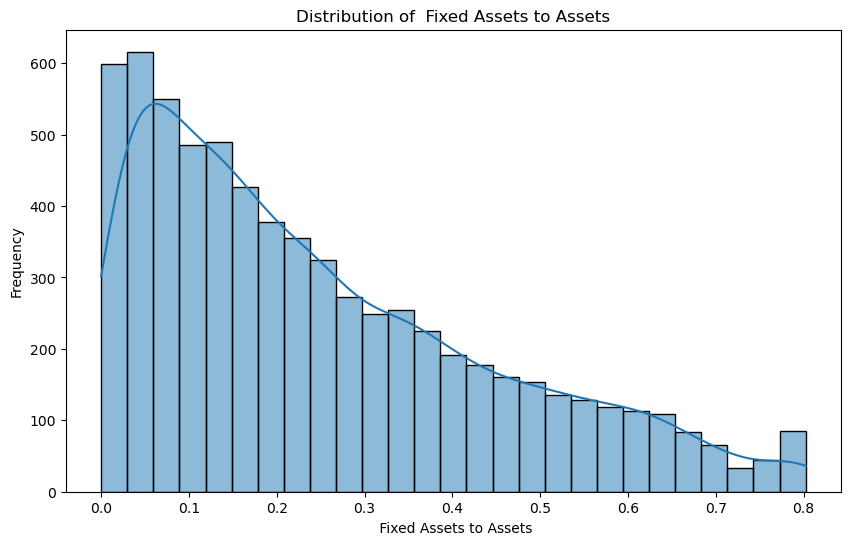

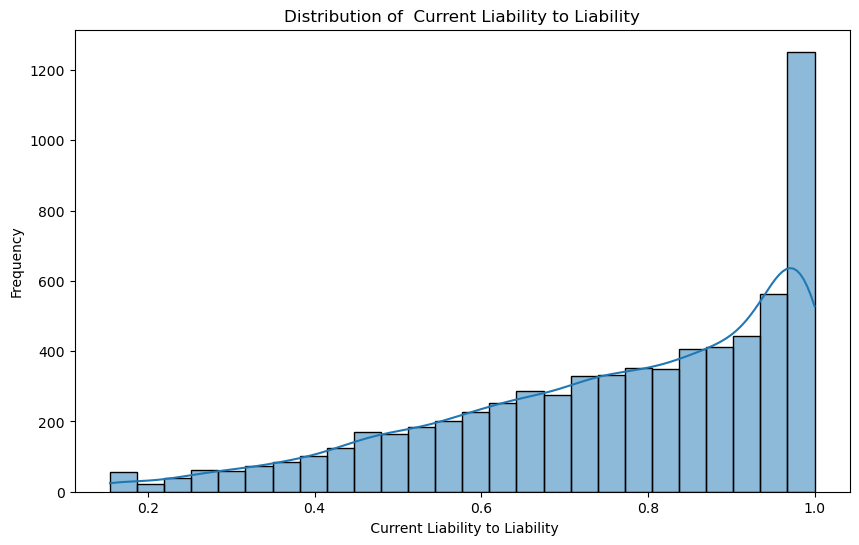

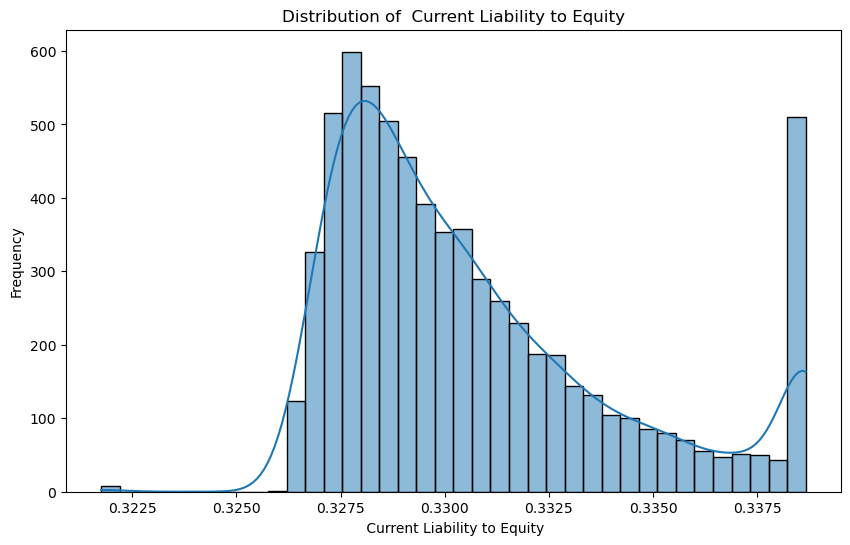

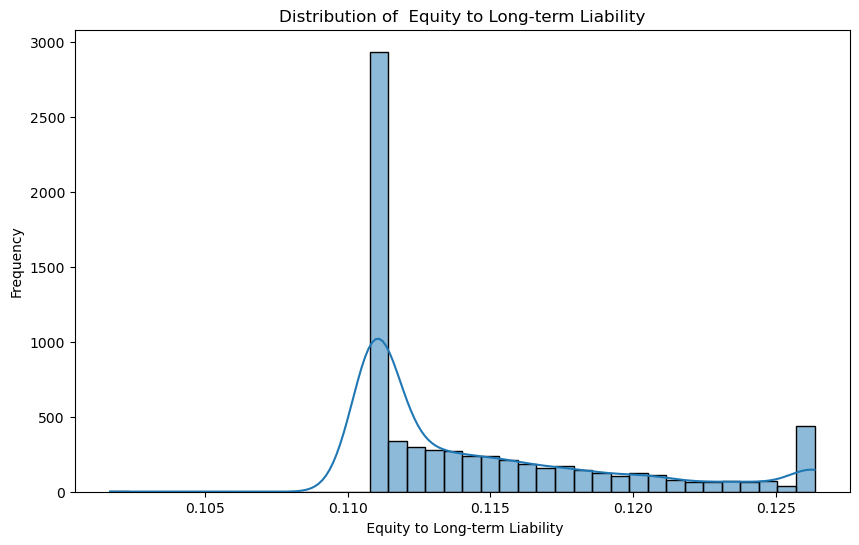

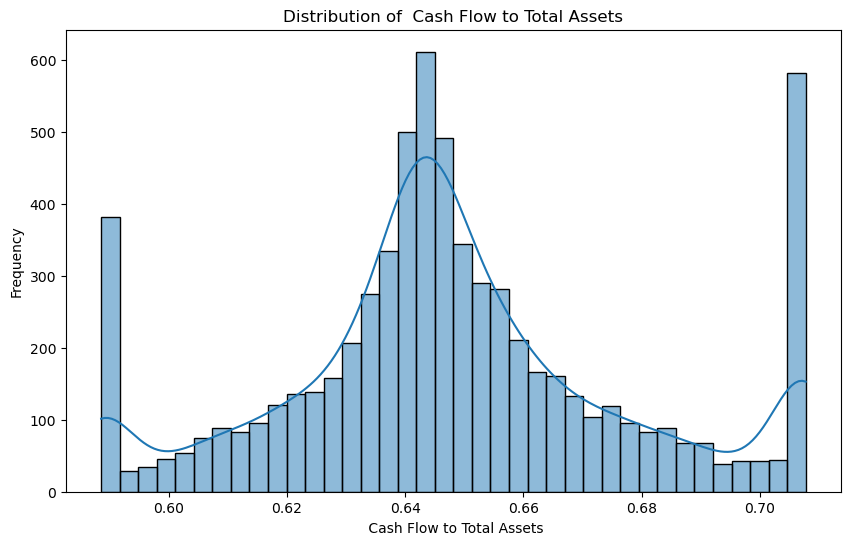

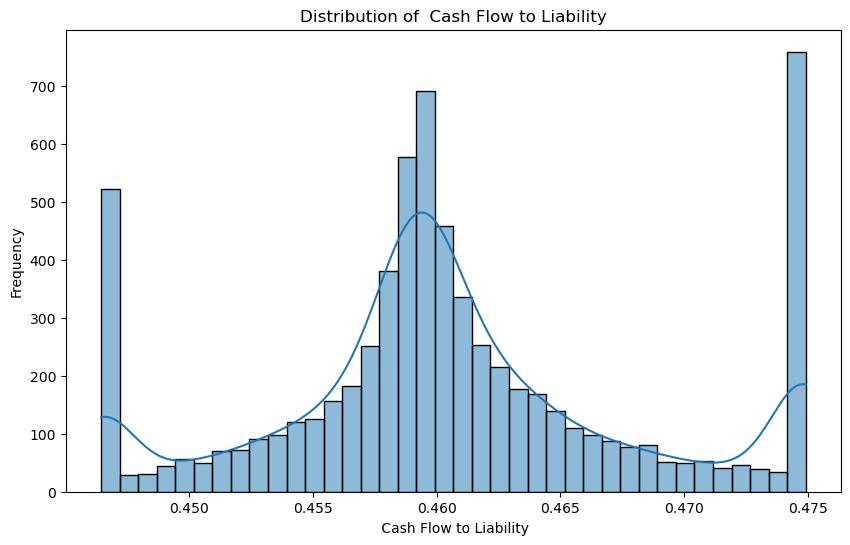

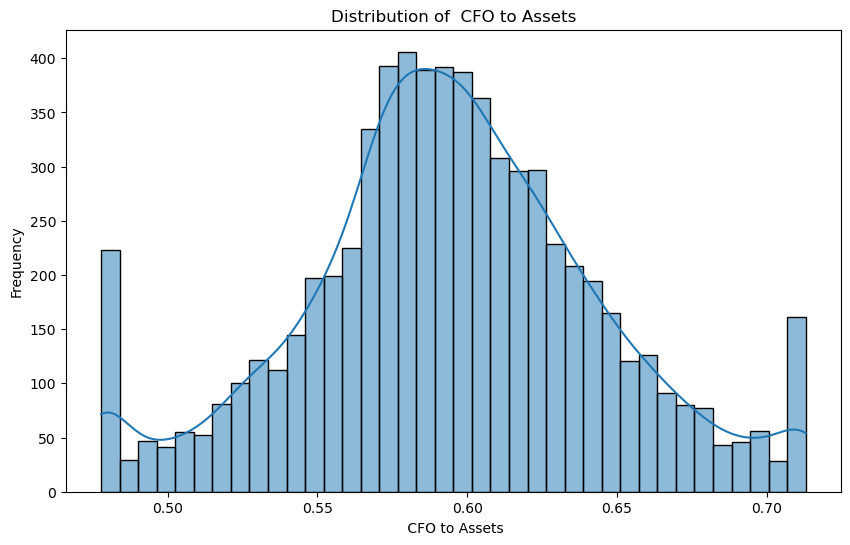

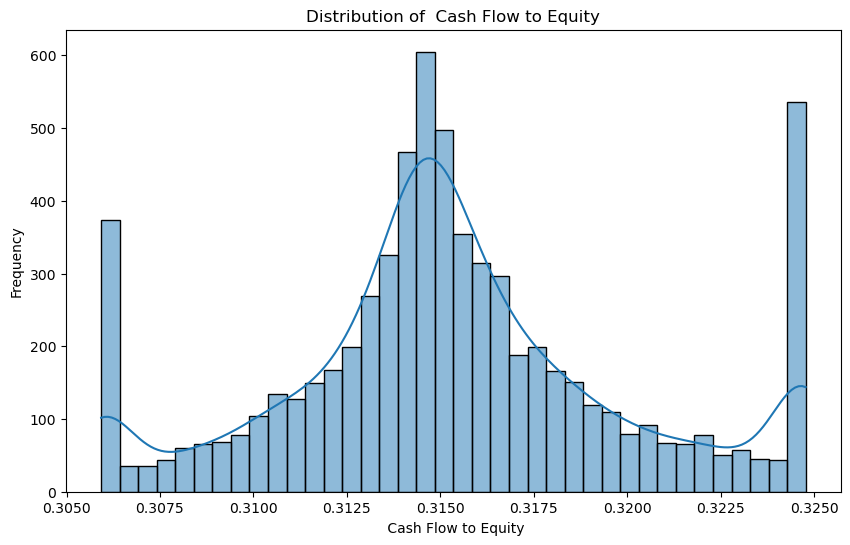

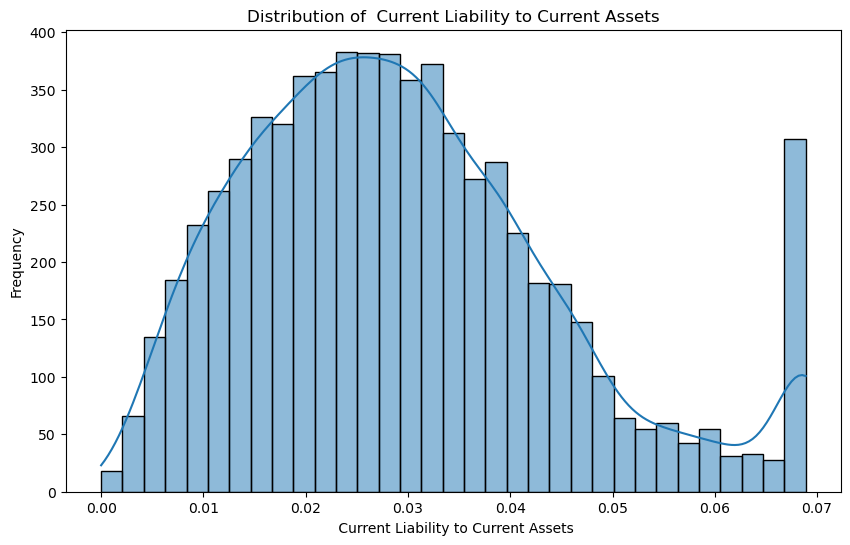

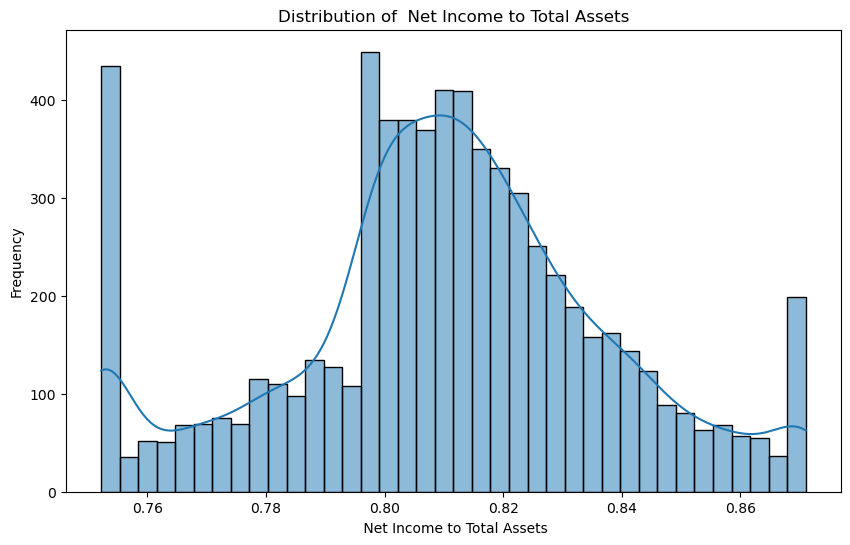

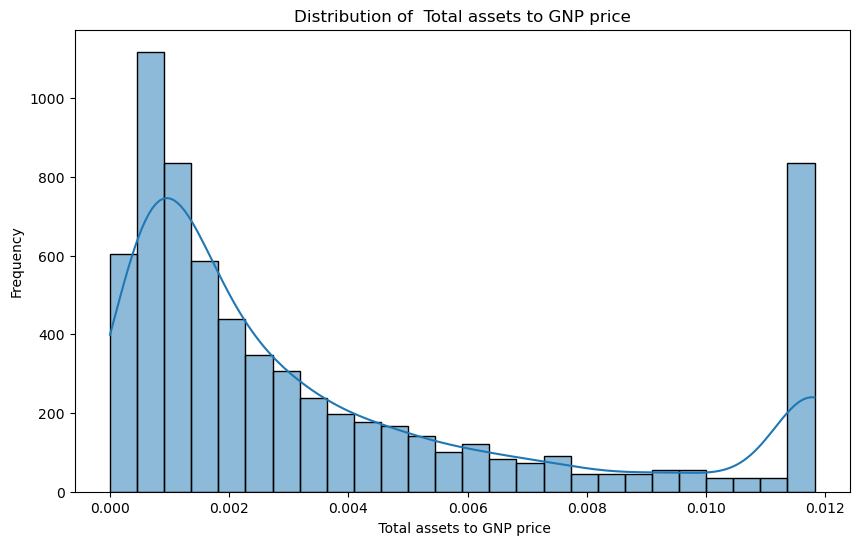

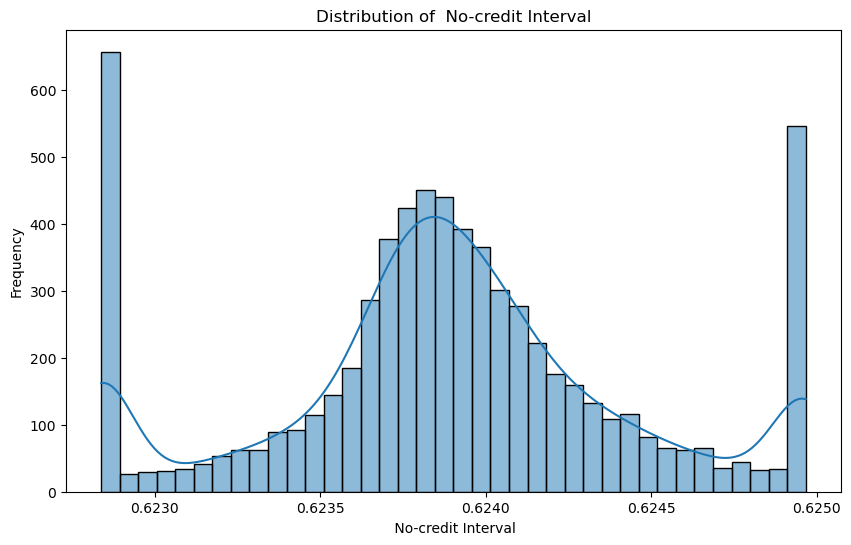

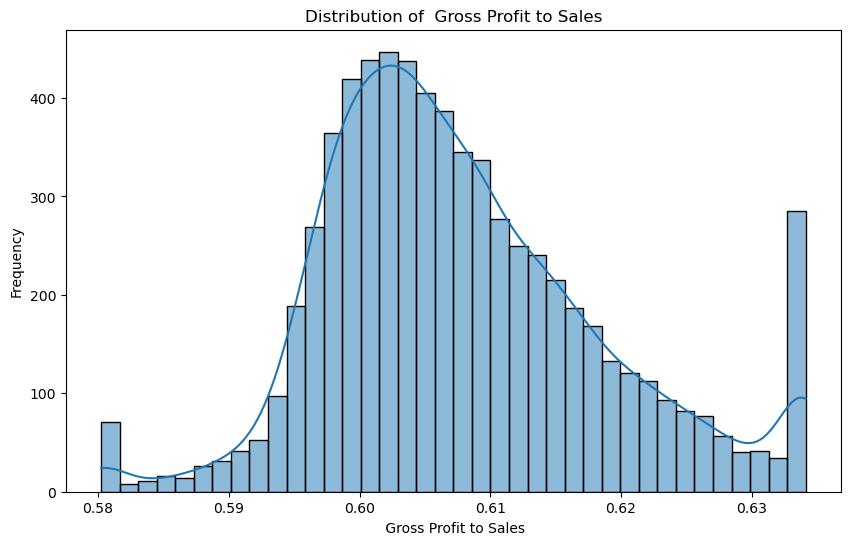

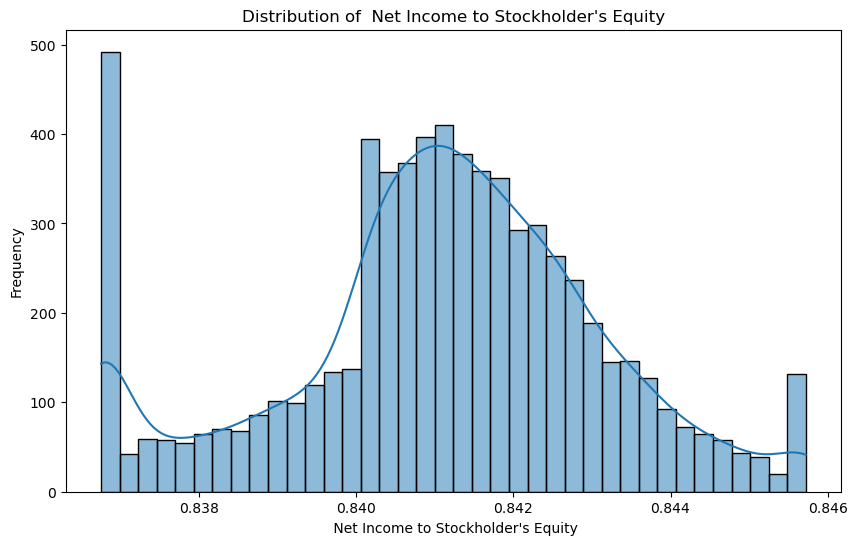

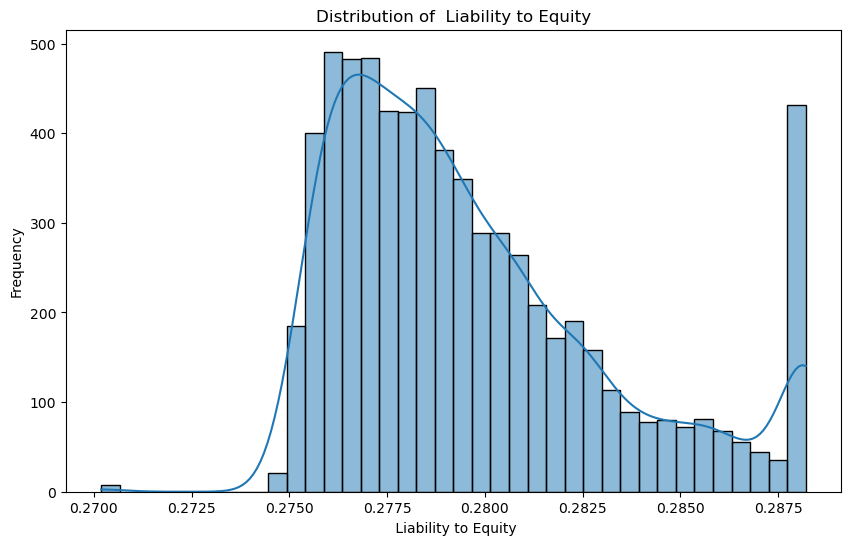

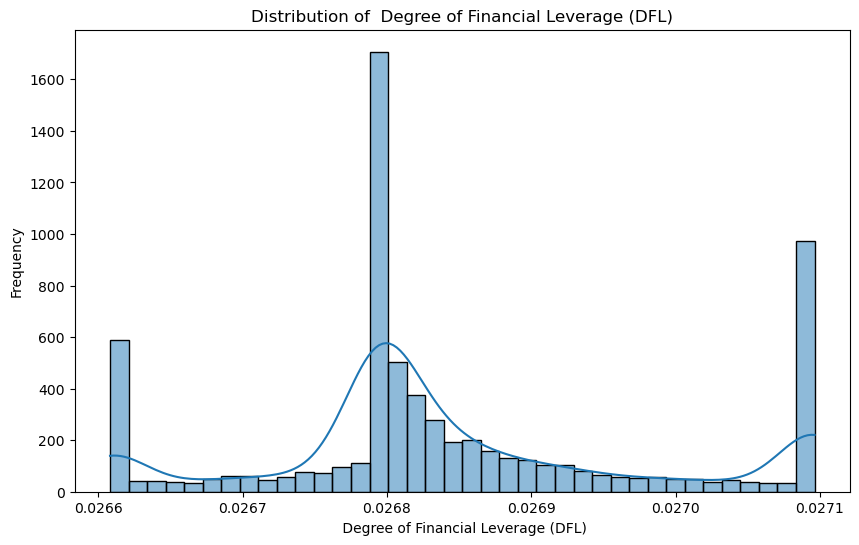

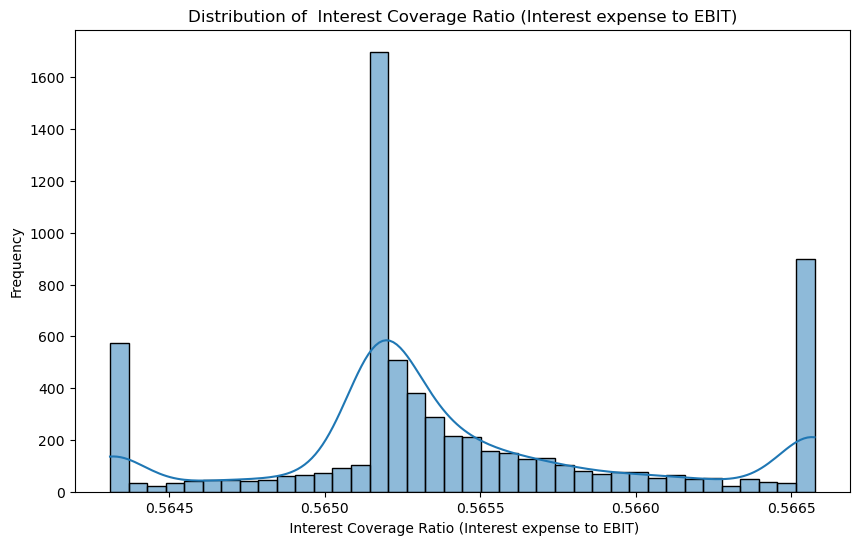

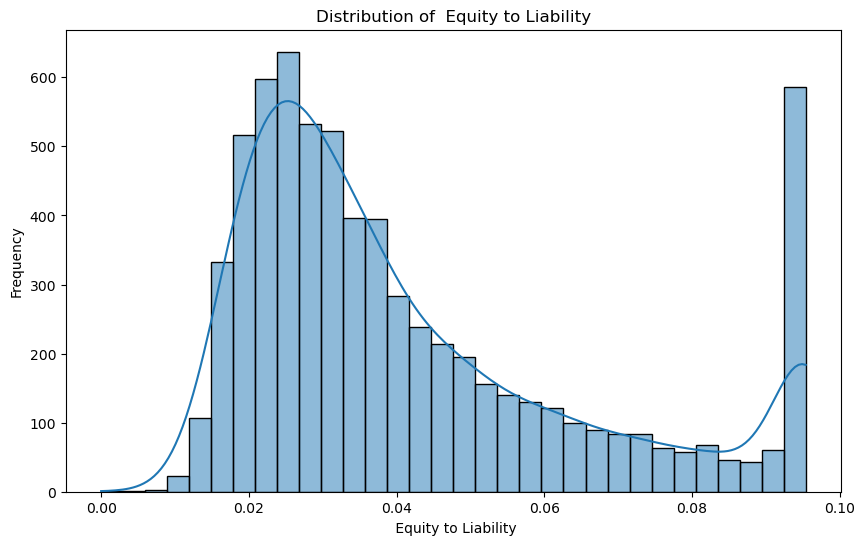

In [22]:
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(new_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
b=df['Bankrupt?']
new_df['Bankrupt']=b

In [24]:
new_df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.781314  ...                     0.752193   
1                               0.781506  ...                     0.795297   
2                               0.781314  ...                     0.774670   
3                               0.781314  ...                     0.752193   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.011819             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.288207   
1                             0.839969              0.283846   
2                             0.836774              0.288207   
3                             0.836752              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564309                0.016469   
1                                           0.566574                0.020794  

In [25]:
#To check the occurnces of each unique value in column
new_df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

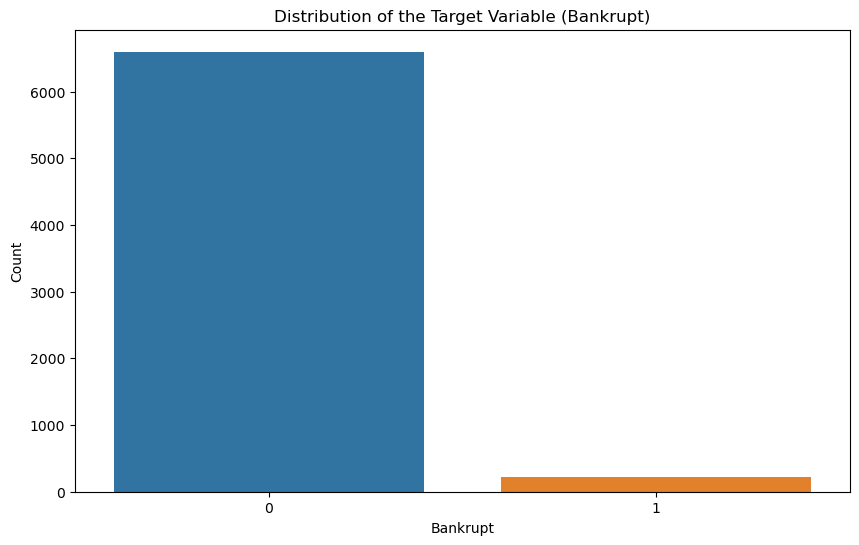

In [26]:
#The x-axis shows the categories (0 and 1), representing non-bankrupt and bankrupt companies.
#The y-axis represents the count of occurrences for each category.
plt.figure(figsize=(10, 6))
sns.countplot(x='Bankrupt', data=new_df)
plt.title('Distribution of the Target Variable (Bankrupt)')
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.show()

In [27]:
#3. Analyze Relationships between Features and the Target Variable
# Compute the correlation matrix
corr_matrix = new_df.corr()

# Correlation with the target variable ('Bankrupt')
corr_with_target = corr_matrix['Bankrupt'].sort_values(ascending=False)

# Print the correlations
print(corr_with_target)

Bankrupt                                    1.000000
 Borrowing dependency                       0.278367
 Total debt/Total net worth                 0.272914
 Debt ratio %                               0.246535
 Liability to Equity                        0.246176
                                              ...   
 Continuous interest rate (after tax)      -0.248585
 Net Income to Stockholder's Equity        -0.251917
 Retained Earnings to Total Assets         -0.255218
 Net Income to Total Assets                -0.255797
 Persistent EPS in the Last Four Seasons   -0.256159
Name: Bankrupt, Length: 94, dtype: float64


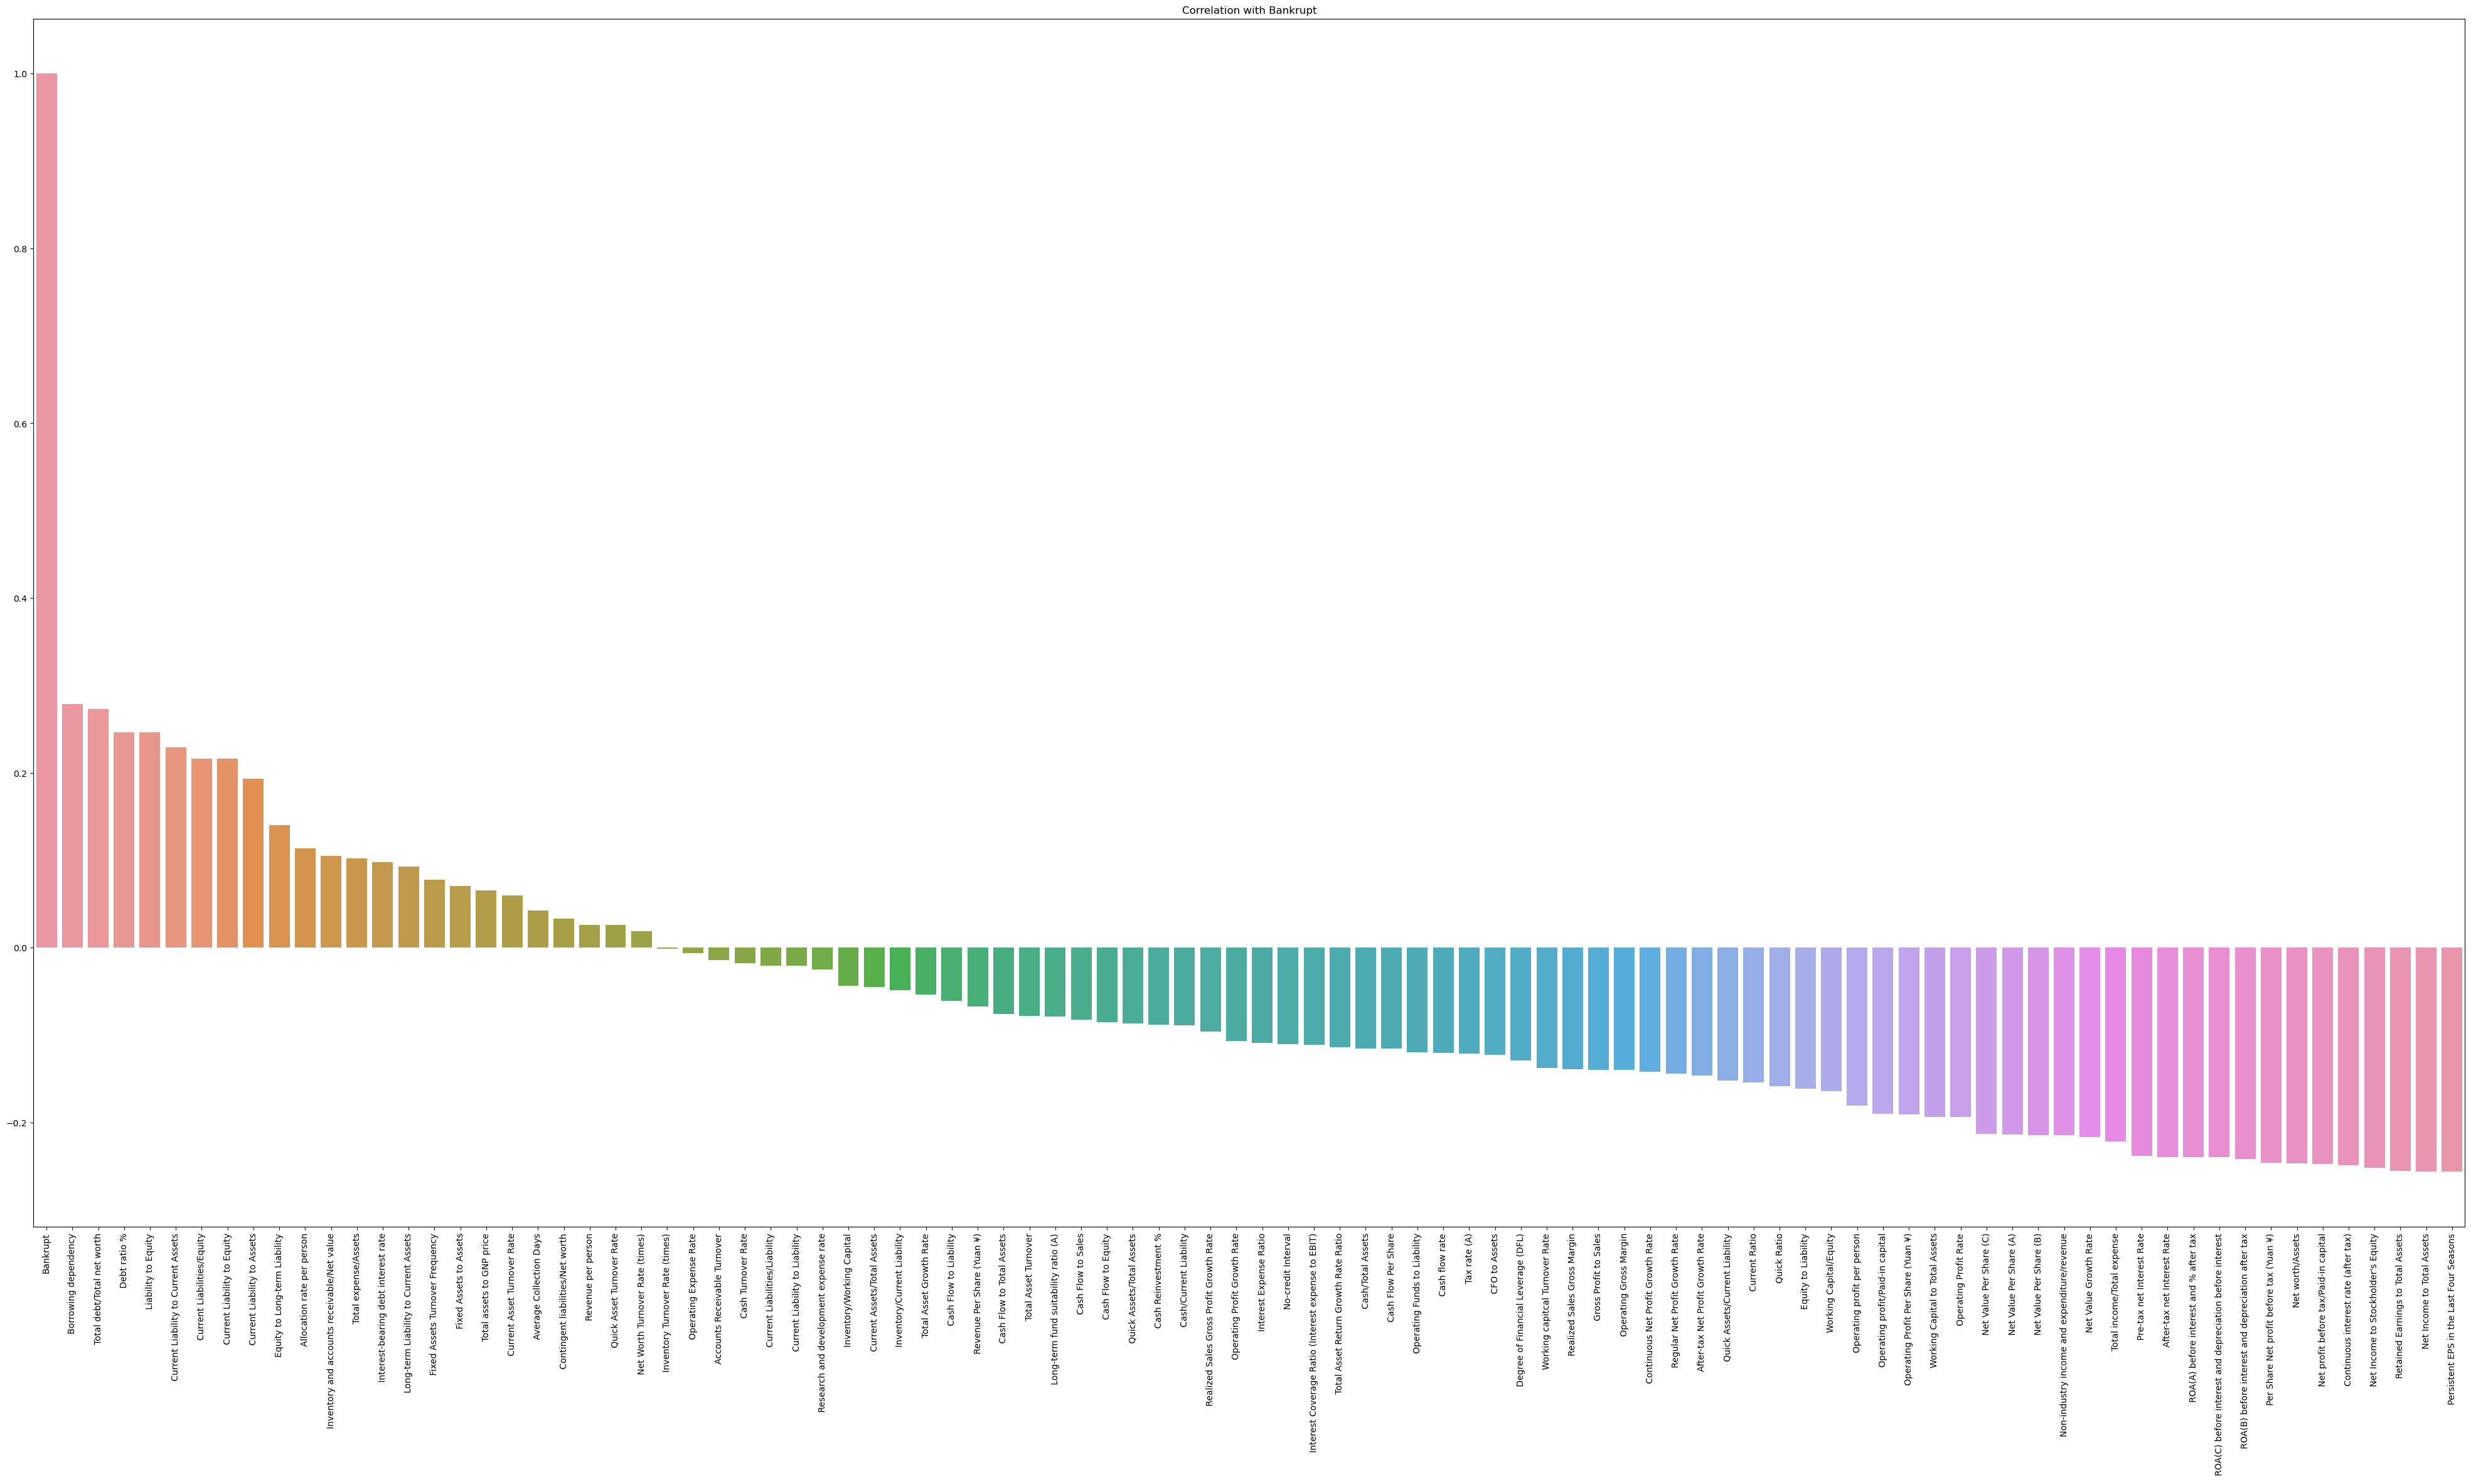

In [28]:
# Plot the correlations
plt.figure(figsize=(50, 25))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation with Bankrupt')
plt.show()

In [30]:
corr_matrix = new_df.corr()
threshold = 0.2
corr_with_target = corr_matrix['Bankrupt'].abs()
relevant_features = corr_with_target[corr_with_target > threshold].index.tolist()
df1 = new_df[relevant_features]
df1

ROA(C) before interest and depreciation before interest  \
0                                              0.387973          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.455122   
1                                    0.538214   
2                                    0.499019   
3                                    0.455122   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.442034    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Pre-tax net Interest Rate   After-tax net Interest Rate  \
0                       0.797096                      0.809075   
1                       0.797380                      0.809301   
2                       0.797096                      0.809075   
3                       0.797096                      0.809075   
4                       0.797366                      0.809304   
...                          ...                           ...   
6814                    0.797409                      0.809331   
6815                    0.797414                      0.809327   
6816                    0.797401                      0.809317   
6817                    0.797500                      0.809399   
6818                    0.797868                      0.809706   

       Non-industry income and expenditure/revenue  \
0                                         0.303288   
1                                         0.303556   
2                                         0.303288   
3                                         0.303350   
4                                         0.303475   
...                                            ...   
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.303764   

       Continuous interest rate (after tax)   Net Value Per Share (B)  \
0                                  0.781314                  0.147950   
1                                  0.781506                  0.182251   
2                                  0.781314                  0.177911   
3                                  0.781314                  0.154187   
4                                  0.781550                  0.167502   
...                     

3. Hypothesis Testing:

In [69]:
#Hypothesis Testing:
#Perform hypothesis testing to identify significant features influencing bankruptcy.
from scipy.stats import ttest_ind

# Hypothesis testing for feature selection 
significant_features = []
for column in new_df.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt':
        bankrupt = new_df[new_df['Bankrupt'] == 1][column]
        non_bankrupt = new_df[new_df['Bankrupt'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:        # if null hypothesis is rejected select that column
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {len(significant_features)}')

significant_features.append('Bankrupt')    # appeded bankrupt? column in list

 ROA(C) before interest and depreciation before interest: t-statistic=-20.371000246550334, p-value=1.3480464196848798e-89
 ROA(A) before interest and % after tax: t-statistic=-20.36708962978169, p-value=1.453424003163958e-89
 ROA(B) before interest and depreciation after tax: t-statistic=-20.59226229040652, p-value=1.867512034084068e-91
 Operating Gross Margin: t-statistic=-11.677652430250529, p-value=3.2823739125123346e-31
 Realized Sales Gross Margin: t-statistic=-11.61220032059553, p-value=6.967922607227421e-31
 Operating Profit Rate: t-statistic=-16.315267033012436, p-value=9.863440509107752e-59
 Pre-tax net Interest Rate: t-statistic=-20.235075270990965, p-value=1.8306696788047566e-88
 After-tax net Interest Rate: t-statistic=-20.365632811201365, p-value=1.4947479061257782e-89
 Non-industry income and expenditure/revenue: t-statistic=-18.132844472521544, p-value=8.370733607811912e-72
 Continuous interest rate (after tax): t-statistic=-21.189549801114605, p-value=1.4678863402201738

In [70]:
#Feature Engineering and
new_df

ROA(C) before interest and depreciation before interest  \
0                                              0.387973          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.455122   
1                                    0.538214   
2                                    0.499019   
3                                    0.455122   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.442034    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.797096   
1                   0.998946                    0.797380   
2                   0.998857                    0.797096   
3                   0.998781                    0.797096   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998781                    0.797868   

       After-tax net Interest Rate  \
0                         0.809075   
1                         0.809301   
2                         0.809075   
3                         0.809075   
4                         0.809304   
...                            ...   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818    

4. Feature Engineering and Selection:

In [71]:
data =new_df[significant_features]

In [72]:
# Feature Engineering
#data['NewFeature'] = data[' Total Asset Growth Rate'] / data[' Net Income to Total Assets']

# Dimensionality reduction
pca = PCA(n_components=10)
principal_components=pca.fit_transform(data.drop(['Bankrupt'],axis=1))
data_pca = pd.DataFrame(data=principal_components)

# Feature selection
X = data.drop(['Bankrupt'], axis=1)
y = data['Bankrupt']
model = LogisticRegression(max_iter=10000)
rfe = RFE(model)
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]

print(f'Selected features: {selected_features}')

Selected features: Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Research and development expense rate', ' Cash flow rate',
       ' Cash Flow Per Share', ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Cash Reinvestment %',
       ' Interest Expense Ratio', ' Net worth/Assets', ' Borrowing dependency',
       ' Inventory and accounts receivable/Net value',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Quick Assets/Total Assets', ' Current Asset

5. Modeling:

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [76]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
# Apply StandardScaler to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model training
model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8636363636363636
Precision: 0.1889400921658986
Recall: 0.803921568627451
F1 Score: 0.30597014925373134
ROC AUC Score: 0.8349386974896584


In [77]:
confm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confm)

Confusion Matrix:
[[1137  176]
 [  10   41]]


6. Model Insights: